# 🗂️ **1. Perkenalan Dataset**


## 🔍 **Menjelajahi Bayangan Finansial: Analisis Clustering untuk Deteksi Penipuan**

> 📌 **Akses Dataset**: [Bank Transaction Dataset for Fraud Detection di Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)

### 💳 **Menyelami Dunia Transaksi Perbankan**

Di era digital, setiap gesek, ketuk, dan klik menghasilkan sidik jari di lautan data keuangan yang luas. Di balik aliran kredit dan debit yang tampak biasa, tersembunyi lanskap di mana transaksi yang sah berdampingan dengan upaya penipuan yang canggih. **Dataset Transaksi Bank untuk Deteksi Penipuan** membuka jendela ke ekosistem kompleks ini, memberikan kita 2.512 momen transaksi yang membeku dalam waktu—masing-masing berpotensi menceritakan kisah aktivitas keuangan normal atau sesuatu yang lebih mengkhawatirkan.

> "Penipuan paling canggih tidak terdeteksi melalui kebetulan—mereka terungkap melalui analisis metodis dan pengenalan pola."

Proyek ini memulai perjalanan analitis melalui transaksi keuangan, memanfaatkan teknik clustering untuk mencapai skor silhouette melebihi 0,7—ambang batas yang memisahkan pengelompokan acak dari pola bermakna. Ketika kita melampaui ambang ini, kita tidak hanya menciptakan cluster matematis; kita mengembangkan penjaga digital yang mampu mengenali tanda tangan halus dari aktivitas penipuan.

### 📊 **Dataset: Permadani Finansial Digital**

Dataset kita menyajikan permadani kaya perilaku keuangan, menangkap 2.512 transaksi di 16 dimensi berbeda:

**Pengenal Transaksi:**
* Setiap transaksi membawa **TransactionID** unik, paspor digital yang bergerak melalui sistem keuangan
* Setiap transaksi terkait dengan **AccountID**, memungkinkan kita melacak pola perilaku sepanjang waktu

**Dimensi Keuangan:**
* **TransactionAmount**: Detak jantung moneter dari setiap interaksi
* **AccountBalance**: Keadaan keuangan setelah setiap transaksi, menceritakan kisah akumulasi atau pengurangan
* **TransactionType**: Arah fundamental aliran uang—kredit atau debit

**Elemen Kontekstual:**
* **Location**: Jangkar geografis setiap transaksi
* **DeviceID** dan **IP Address**: Jejak digital yang menghubungkan virtual ke fisik
* **MerchantID**: Rekanan komersial, mengungkapkan pola preferensi pelanggan atau penyimpangan mencurigakan
* **Channel**: Media transaksi—dari kunjungan cabang tradisional hingga antarmuka digital

**Faktor Manusia:**
* **CustomerAge** dan **CustomerOccupation**: Dimensi demografis yang membentuk perilaku keuangan
* **LoginAttempts**: Sinyal potensial akses otentik atau sesuatu yang lebih jahat
* **TransactionDuration**: Waktu yang dihabiskan dalam proses transaksi, di mana anomali mungkin bersembunyi

### 🎯 **Misi Clustering Kita**

Bintang utara analitis kita jelas—untuk mencapai skor silhouette di atas 0,7 melalui analisis clustering yang cermat. Ini bukan hanya ambang statistik; ini mewakili kemampuan kita untuk:

* Mengidentifikasi pengelompokan alami dalam perilaku keuangan yang memisahkan yang biasa dari yang mencurigakan
* Mengungkap hubungan tersembunyi antara atribut transaksi yang mungkin menandakan aktivitas penipuan
* Membangun fondasi untuk model prediktif yang dapat beroperasi pada kecepatan keuangan digital
* Menciptakan kerangka kerja yang dapat beradaptasi dengan strategi penipuan yang terus berkembang

### 🔮 **Di Balik Angka: Dampak Analisis Kita**

Ketika kita melihat melampaui titik data, algoritma, dan skor silhouette, kita menemukan signifikansi nyata dari pekerjaan ini. Deteksi penipuan yang efektif berarti:

* Melindungi individu dari kesulitan finansial dan emosional akibat menjadi korban penipuan
* Menjaga integritas sistem keuangan yang menopang ekonomi modern
* Mengurangi perkiraan 30 miliar dolar AS yang hilang setiap tahun akibat penipuan keuangan
* Memungkinkan inovasi keuangan dengan menciptakan lingkungan yang aman untuk teknologi baru

Saat kita menyelami lautan transaksi ini, kita tidak hanya memanipulasi data—kita mengembangkan perisai yang melindungi ekosistem keuangan dan orang-orang yang mengandalkannya.

*Apakah Anda siap untuk mengungkap pola tersembunyi dalam lanskap keuangan ini?* 💰

# **🗂 2. Import Library**

📂 Jadi ini adalah beberapa **library** yang akan kita gunakan dalam penjelajahan ini 🕵

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import hdbscan
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

# **📥 3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset ke dalam **DataFrame** menggunakan pustaka **Pandas**. Setelah proses loading selesai, kita akan memeriksa **kesesuaian dataset** yang telah diunduh dengan **informasi yang tersedia pada platform Kaggle**, yaitu sumber asli dataset ini.

📌 **Tujuan utama dari langkah ini:**
- ✅ Memastikan dataset berhasil dimuat dengan **benar**
- ✅ Memverifikasi struktur dataset **sesuai dengan deskripsi aslinya di Kaggle**
- ✅ Melihat **gambaran awal** dataset sebelum dilakukan analisis lebih lanjut

In [423]:
df = pd.read_csv('data/raw/raw-data.csv')

print("============= Memeriksa Kesesuaian Data dengan Informasi Dataset =============")
print(df.info())

============= Memeriksa Kesesuaian Data dengan Informasi Dataset =============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13 

Setelah dilakukan pengecekan, dataset ini **sesuai** dengan **deskripsi yang ada di Kaggle**, sehingga kita dapat melanjutkan ke tahap eksplorasi lebih lanjut. 🚀

# 🔍 **4. Exploratory Data Analysis (EDA)**  

Sebelum masuk ke tahap pemodelan, saya perlu memahami dataset ini dengan lebih dalam melalui **Exploratory Data Analysis (EDA)**. Tujuannya? Untuk menemukan pola tersembunyi, mengidentifikasi anomali, serta memahami struktur data secara keseluruhan. Let's dive in! 🚀  

📌 **1. Mengenal Struktur Data**  
Langkah pertama, saya akan melihat bagaimana bentuk dataset ini:  
✅ Berapa jumlah baris dan kolomnya?  
✅ Apa saja tipe data di setiap kolom—numerik atau kategorikal?  
✅ Apakah ada data yang perlu diubah formatnya agar lebih mudah diolah?  

⚠️ **2. Menangani Data yang Hilang**  
Data yang hilang bisa menjadi jebakan dalam analisis, jadi saya harus:  
🔍 Mengecek apakah ada *missing values*.  
🛠️ Menentukan solusi terbaik—apakah mengisi dengan nilai tertentu atau menghapusnya agar tidak mengganggu analisis.  

📊 **3. Menganalisis Distribusi & Korelasi**  
Selanjutnya, saya ingin memahami lebih dalam tentang bagaimana data ini terdistribusi dan bagaimana hubungan antar variabelnya:  
📈 Untuk variabel numerik, saya akan melihat statistik deskriptif serta membuat histogram atau boxplot.  
🔗 Saya juga akan mengecek korelasi antar variabel menggunakan *heatmap* atau *scatter plot* untuk melihat apakah ada pola menarik yang bisa dimanfaatkan.  

🎨 **4. Memvisualisasikan Data**  
Karena gambar berbicara lebih banyak dari angka, saya akan:  
📊 Membuat diagram batang untuk melihat distribusi variabel kategorikal.  
🌡️ Menggunakan *heatmap* untuk memahami hubungan antar variabel dengan lebih jelas.  
👀 Mungkin juga menambahkan *pairplot* untuk melihat hubungan antar fitur secara visual.  

Dengan melakukan EDA ini, saya berharap bisa mendapatkan wawasan yang lebih tajam dan siap melangkah ke tahap analisis berikutnya! 🚀🔬

Sebelum itu mari kita lakukan beberapa **konfigurasi tampilan** dan **konfigurasi gaya visualisasi** agar visualisasi **konsisten**, sehingga lebih enak dilihat mata.

In [424]:
# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Visualisation Settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

## 🔍 **Data Peeking 101**  

Sebelum menyelam lebih dalam , kita perlu **mengintip sekilas** struktur dan isinya. Ini seperti mengenal medan sebelum bertempur! 🏹💡  

Tahapan ini meliputi:  
📌 **Cek tampilan awal** → `head()`  
📌 **Lihat ringkasan info** → `info()`  
📌 **Ukurannya seberapa besar?** → `shape()`  
📌 **Ada data yang hilang?** → `isnull().sum()`  
📌 **Distribusi statistik** → `describe()`  
📌 **Tipe data kolom** → `dtypes()`  

Dengan "mengintip" data di awal, kita bisa menghindari jebakan seperti **missing values, anomali, atau tipe data yang nggak sesuai**, sebelum lanjut ke tahap analisis yang lebih mendalam. 🚀

### 📌 **Cek tampilan awal** → `head()`

Oke sekarang kita akan melihat 5 data teratas dari dataset ini. Tujuannya biar kita dapat gambaran awal dataset.

In [425]:
print("5 Baris Pertama Dataset:")
df.head()

5 Baris Pertama Dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Dari keluaran di atas, dapat dilihat bahwa datasetnya **aman aja si**. Beberapa info menarik mungkin, disini kita terdapat 2 kolom **ID** yang mana ini seharusnya kita `drop`jika ingin melakukan **clustering**. 

Oke nice, **one insight** berhasil didapatkan bolo 🚀

### 📌 **Lihat ringkasan info** → `info()` 

Selanjutnya mari lihat info dataset, disini kita bisa cek ada **missing values** atau **ketidak sesuaian tipe data** atau tidak.

In [426]:
print("\nInformasi Struktur Data:")
df.info()


Informasi Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14

Dapat dilihat diatas, hal yang mungkin sedikit masalah adalah kolom `TransactionType` bertipe **object**, seharusnya dia bertipe **Datetime** yang sesuai dengan format tanggal.

We'll deal with this later. 🪛

### 📌 **Distribusi statistik** → `describe()`

Selanjutnya, kita akan melihat persebaran dataset. Pada tahap ini kita akan melihat apakah data numerik itu tersebar secara baik atau tidak.

In [427]:
print("\nDeskripsi Statistik Kolom Numerik:")
display(df.describe())


Deskripsi Statistik Kolom Numerik:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.00,2512.00,2512.00,2512.00,2512.00
mean,297.59,44.67,119.64,1.12,5114.30
std,291.95,17.79,69.96,0.60,3900.94
min,0.26,18.00,10.00,1.00,101.25
25%,81.89,27.00,63.00,1.00,1504.37
50%,211.14,45.00,112.50,1.00,4735.51
75%,414.53,59.00,161.00,1.00,7678.82
max,1919.11,80.00,300.00,5.00,14977.99


Oke, dari statistik deskriptif ini, kita bisa lihat beberapa hal menarik! 💡  

🔹 **Jumlah transaksi rata-rata** sekitar **$297**, tapi ada transaksi kecil banget **($0.26)** sampai yang hampir **$2000**. Ini berarti ada variasi yang cukup besar dalam jumlah transaksi! 📊  

🔹 **Usia pelanggan** berkisar antara **18 hingga 80 tahun**, dengan rata-rata **44 tahun**. Bisa jadi mayoritas pengguna adalah orang dewasa dengan pengalaman finansial yang cukup.  

🔹 **Durasi transaksi** bervariasi dari **10 detik hingga 300 detik**, dengan rata-rata sekitar **2 menit**. Mungkin ada beberapa transaksi yang butuh verifikasi tambahan sehingga memakan waktu lebih lama.  

🔹 **Percobaan login** mayoritas hanya **1 kali**, tapi ada yang sampai **5 kali**! Bisa jadi indikasi upaya login yang mencurigakan atau pengguna yang lupa password. 🕵️‍♂️  

🔹 **Saldo akun pelanggan** punya rentang yang gila, dari **$101** hingga hampir **$15.000**! Ini menunjukkan ada berbagai tipe pengguna, dari yang memiliki saldo kecil hingga nasabah dengan dana besar.  

Dari sini, kayaknya kita perlu cek lebih lanjut apakah ada outlier yang bisa berpengaruh ke clustering nanti.

Tetapi sebelum itu, mari cek **deskripsi untuk kolom kategorikal** terlebih dahulu. 

In [428]:
print("\nDeskripsi Kolom Kategorikal:")
display(df.describe(include=['object']))


Deskripsi Kolom Kategorikal:


,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,495,2512,2,43,681,592,100,3,4,360
top,TX000001,AC00362,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,1,12,1,1944,70,9,13,45,868,657,16


Dari deskripsi kolom di atas , kita bisa liat bahwa mayoritas transaksi adalah **Debit** (🔄 1944 kali) dan dilakukan melalui **Branch** (🏦 868 kali). Lokasi transaksi cukup beragam dengan **43 lokasi**, namun **Fort Worth** paling sering muncul (📍 70 kali). Pekerjaan pelanggan terdiri dari **4 kategori**, dengan **Student** sebagai yang terbanyak (🎓 657 kali). Selain itu, ada **100 MerchantID**, di mana satu merchant sering digunakan (🛒 45 kali). Beberapa **IP Address** dan **DeviceID** muncul lebih sering, yang bisa menjadi indikasi aktivitas menarik untuk ditelusuri lebih lanjut. 🚀

### 📌 **Ukurannya seberapa besar?** → `shape()`

Sekarang mari lihat **ukuran dataset** ini 📐

In [429]:
print(f"\nDataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")


Dataset memiliki 2512 baris dan 16 kolom


Oke good, sesuai dengan deskripsi di kaggle.

### 📌 **Ada data yang hilang?** → `isnull().sum()` 

Sekarang mari kita lihat apakah data memiliki **missing values** atau tidak secara komprehensif, dan jika ada kita coba **visualisasikan 📊**

> (walaupun udah tau gaada dari df.info hehe 😂)

In [430]:
# Check Missing Values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Make DataFrame to display missing values information in a better way
missing_df = pd.DataFrame({
    'Jumlah Missing Values': missing_values,
    'Persentase (%)': missing_percent
})

# Display columns with missing values only
missing_df_with_values = missing_df[missing_df['Jumlah Missing Values'] > 0]

if missing_df_with_values.empty:
    print("Tidak ada missing values dalam dataset!")
else:
    print("Kolom dengan Missing Values:")
    display(missing_df_with_values.sort_values('Jumlah Missing Values', ascending=False))
    
    # Missing Values Visualization if any
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Visualisasi Missing Values', fontsize=14)
    plt.tight_layout()
    plt.show()

Tidak ada missing values dalam dataset!


### 📌 **Tipe data kolom** → `dtypes()`  

Disini kita akan lihat apakah ada tipe data yang tidak sesuai atau tidak.

In [431]:
print("Tipe Data:")
display(df.dtypes)

Tipe Data:


TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

Sama seperti sebelumnya, masalahnya adalah kolom `TransactionType` bertipe **object**, seharusnya dia bertipe **Datetime** yang sesuai dengan format tanggal.

## 🔄 **Data Transformation Magic** ✨  

Sebelum masuk ke analisis lebih lanjut, kita harus memastikan data dalam format yang benar. Tahap ini mencakup **konversi tipe data**, **ekstraksi fitur tambahan**, dan **perhitungan selisih waktu** untuk mendapatkan wawasan lebih dalam. 📊🔍  
  
📌 **Konversi tanggal ke datetime** → `pd.to_datetime()`  
📌 **Hitung selisih waktu antar transaksi** ⏳  
📌 **Ekstrak informasi waktu (tahun, bulan, hari, jam, dll.)** 🗓️  

Dengan kita ekstrak infomasi tersebut, kita bisa melakukaan analisis yang lebih **detail** dan **komprehensif**. 👨🏼‍💻

### 📌 **Konversi tanggal ke datetime** → `pd.to_datetime()` 

Jadi kita disini akan menangani format `TransactionDate` agar sesuai. Tahap ini penting dilakukan sekarang agar dapat dilakukan analisis yang lebih detail dan komprehensif.

In [432]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

♦ Oke dapat dilihat sekarang, bahwa `TrTransactionDate` sudah memiliki tipe yang **sesuai** sekarang.

### 📌 **Hitung selisih waktu antar transaksi**⏳ 

Disini saya ingin membuat sebuah fitur baru, yaitu fitur `PreviousTransactionDate` yang akan berisi selisih waktu antar transaksi terkahir.

In [433]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df['TimeSincePreviousTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 3600  # in hours

### 📌 **Ekstrak informasi waktu (tahun, bulan, hari, jam, dll.)** 🗓️  

Pada tahap ini, kita akan melakukan **feature engineering** pada kolom `TransactionDate` dengan mengekstrak berbagai informasi waktu yang penting. Ini akan membantu kita memahami pola transaksi berdasarkan **tahun, bulan, hari, jam, dan hari dalam seminggu**.

In [434]:
# Extract additional features from date
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek

## 🎭 **Cracking Categorical Codes**  

Tidak semua data berbentuk angka! Dalam tahap ini, kita mengintip **kolom kategori** untuk memahami distribusi dan pola di dalamnya. 🧐📊  

📌 **Identifikasi kolom kategori** → `df.select_dtypes(include=['object'])`  
📌 **Analisa dan visualisasi distribusi variabel kategorikal** 📊  

Dengan memahami kategori ini, kita bisa melihat pola tersembunyi dalam perilaku transaksi atau preferensi pelanggan! 🚀

### 📌 **Identifikasi kolom kategori** → `df.select_dtypes(include=['object'])` 

In [435]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']


### 📌 **Analisa dan visualisasi distribusi variabel kategorikal** 📊 

Pada tahap ini saya akan melakukan beberapa tahapan, yaitu:

🔹 **Hitung jumlah kategori unik** 🏷️  
🔹 **Visualisasi distribusi dengan bar chart** 📊  
🔹 **Tangani kategori dengan jumlah unik besar (high-cardinality)**  


Value counts for TransactionType:


TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

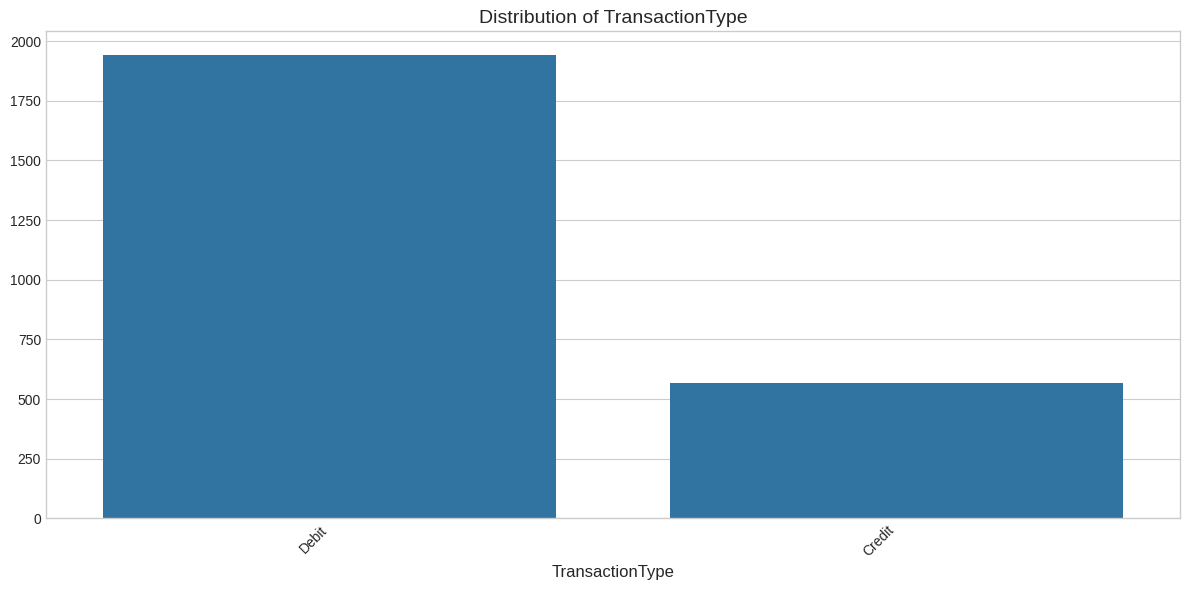


Value counts for Channel:


Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

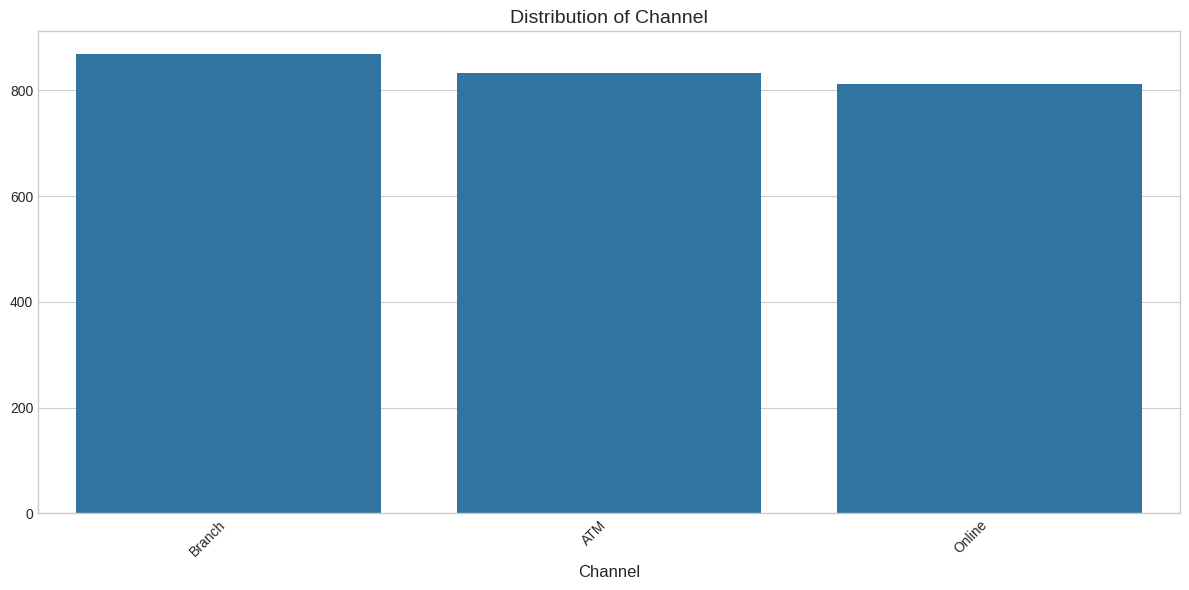


Value counts for CustomerOccupation:


CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64

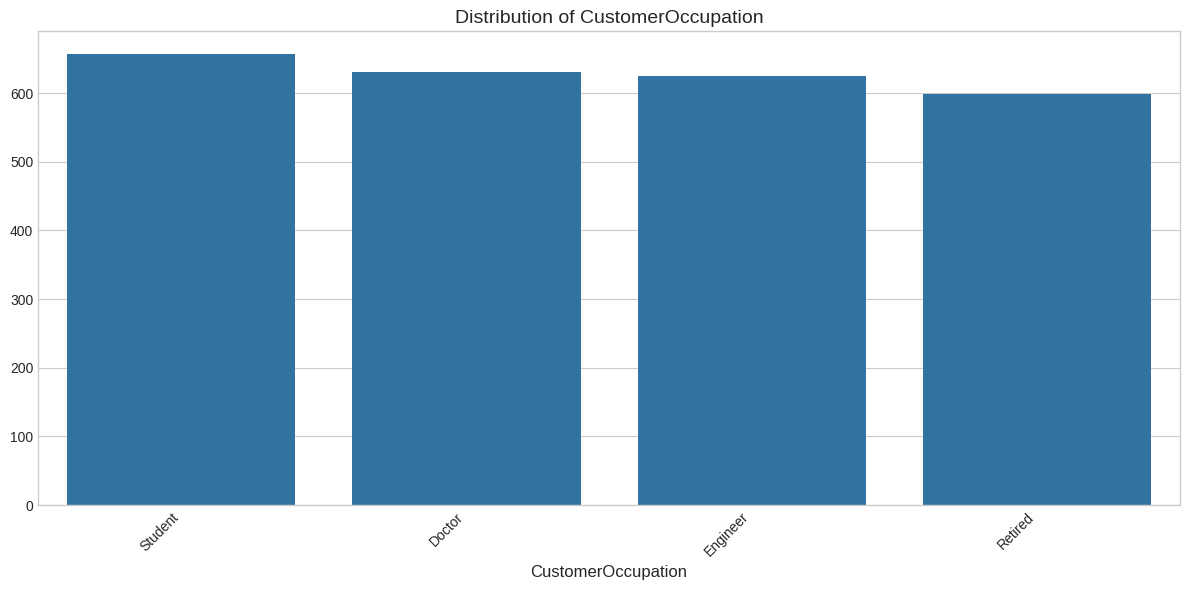


Top 10 values for Location:


Location
Fort Worth       70
Los Angeles      69
Oklahoma City    68
Charlotte        68
Tucson           67
Philadelphia     67
Omaha            65
Miami            64
Detroit          63
Houston          63
Name: count, dtype: int64

Total unique values: 43


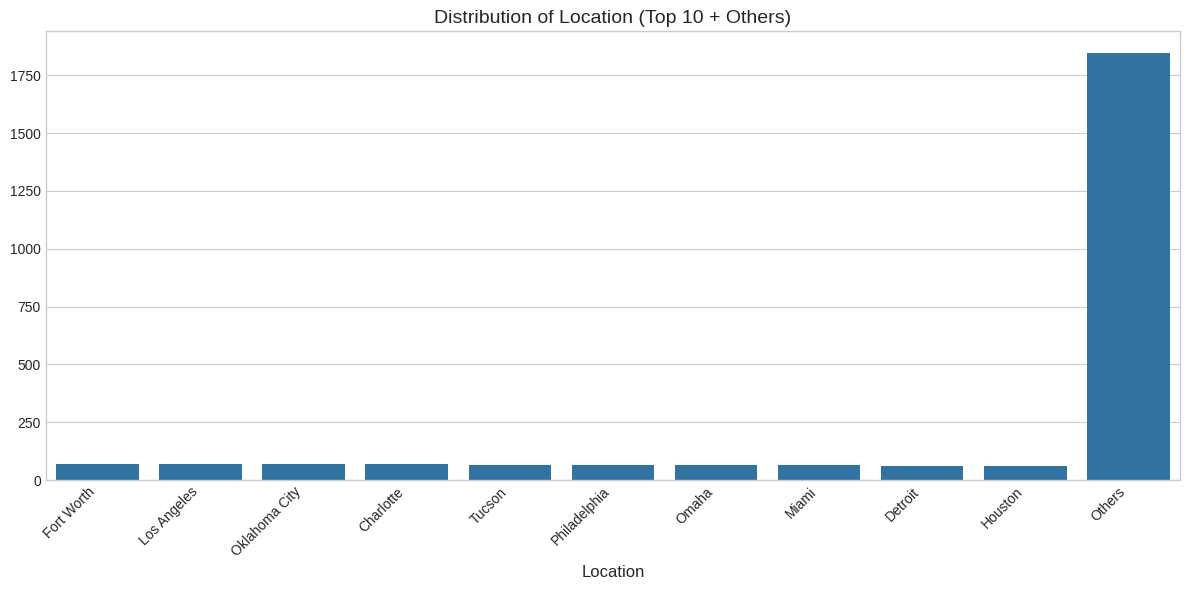


MerchantID has 100 unique values
Top 5 most common MerchantID values:


MerchantID
M026    45
M066    34
M065    33
M013    33
M014    33
Name: count, dtype: int64


DeviceID has 681 unique values
Top 5 most common DeviceID values:


DeviceID
D000697    9
D000203    9
D000548    9
D000663    9
D000142    9
Name: count, dtype: int64


IP Address has 592 unique values
Top 5 most common IP Address values:


IP Address
200.136.146.93    13
49.31.186.82      11
166.79.195.157    10
9.230.41.239      10
173.135.78.201    10
Name: count, dtype: int64

In [436]:
# Create a function to analyze and visualize categorical variables
def analyze_categorical(df, column, top_n=10):
    """
    Analyze and visualize categorical variable distribution
    
    Parameters:
    df (DataFrame): The dataset
    column (str): The column name to analyze
    top_n (int): Number of top categories to display
    """
    # Value counts
    val_counts = df[column].value_counts()
    
    # If there are many categories, show only top N
    if len(val_counts) > top_n:
        print(f"\nTop {top_n} values for {column}:")
        display(val_counts.head(top_n))
        print(f"Total unique values: {len(val_counts)}")
    else:
        print(f"\nValue counts for {column}:")
        display(val_counts)
    
    # Plot the distribution
    plt.figure(figsize=(12, 6))
    
    if len(val_counts) > top_n:
        # For columns with many categories, show only top N
        val_counts_plot = val_counts.head(top_n)
        val_counts_plot['Others'] = val_counts[top_n:].sum()
        sns.barplot(x=val_counts_plot.index, y=val_counts_plot.values)
        plt.title(f'Distribution of {column} (Top {top_n} + Others)')
    else:
        # For columns with few categories
        sns.barplot(x=val_counts.index, y=val_counts.values)
        plt.title(f'Distribution of {column}')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Analyze key categorical variables
for col in ['TransactionType', 'Channel', 'CustomerOccupation', 'Location']:
    analyze_categorical(df, col)

# For high-cardinality categorical variables, just show counts
high_cardinality_cols = ['MerchantID', 'DeviceID', 'IP Address']
for col in high_cardinality_cols:
    print(f"\n{col} has {df[col].nunique()} unique values")
    print(f"Top 5 most common {col} values:")
    display(df[col].value_counts().head(5))

**📊 Pola Transaksi**
Mayoritas transaksi adalah **Debit** (1.944), jauh lebih banyak dibandingkan **Credit** (568) dengan rasio sekitar **3:1**. Ini menunjukkan bahwa nasabah lebih sering mengeluarkan uang daripada menerima dana—pola yang umum dalam perilaku keuangan sehari-hari. 💸  

**🌍 Saluran Transaksi**  
Nasabah memanfaatkan berbagai metode dengan cukup seimbang: **Branch** (868), **ATM** (833), dan **Online** (811). Ini menunjukkan bahwa bank telah sukses menyediakan pengalaman transaksi yang fleksibel, di mana interaksi fisik tetap populer meski layanan digital berkembang pesat. 🔄📱🏧  

**👥 Profil Nasabah**  
Dari total transaksi, empat kelompok profesi utama muncul dengan distribusi yang hampir seimbang: **Student** (657), **Doctor** (631), **Engineer** (625), dan **Retired** (599). Dengan basis nasabah yang beragam ini, bank memiliki peluang besar untuk menawarkan produk yang lebih personal dan sesuai kebutuhan masing-masing kelompok. 🎓👨‍⚕️💼👴  

**🏙️ Lokasi Transaksi**  
Sebaran transaksi sangat luas, dengan banyak terjadi di luar 10 kota utama. **Fort Worth** (70) dan **Los Angeles** (69) sedikit lebih dominan, tapi tidak ada kota yang benar-benar mendominasi. Hal ini menunjukkan bahwa layanan bank telah menjangkau berbagai wilayah tanpa ketimpangan yang mencolok. 🌎🏢  

**🛍️ Merchant, Perangkat, & IP**  
Tingginya variasi dalam **MerchantID**, **DeviceID**, dan **IP Address** menandakan bahwa transaksi tersebar luas dan tidak terpusat pada satu pedagang atau perangkat tertentu. Ini bisa menjadi indikator positif dari segi keamanan, karena tidak ada pola mencurigakan yang mendominasi. 🔐🖥️📶  

💡 **Kesimpulan**: Data menunjukkan bahwa nasabah memiliki kebiasaan transaksi yang beragam, baik dari segi metode, lokasi, hingga profil mereka. Dengan wawasan ini, bank bisa menyusun strategi layanan yang lebih personal dan meningkatkan pengalaman nasabah! 🚀

## 📈 **Number Talk**  

Sekarang saatnya memahami **kolom numerik**! 📊 Kita akan melihat distribusi angka, mendeteksi outlier, dan menemukan pola menarik di dalamnya.  

📌 **Identifikasi kolom numerik** → `df.select_dtypes(include=['int64', 'float64'])`    
📌 **Analisis dan visualisasi fitur Numerik.🏆**  

### 📌 **Identifikasi kolom numerik** → `df.select_dtypes(include=['int64', 'float64'])` 

Pilih data numerik kemudian simpan.

In [437]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

Numerical columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSincePreviousTransaction']


### 📌 **Analisis dan visualisasi fitur Numerik.🏆**

Pada tahap ini saya melakukan beberapa langkah yaitu:  

🔹 **Lihat statistik ringkasan** → `describe()`  
🔹 **Visualisasi histogram + boxplot** 🏆  
🔹 **Deteksi outlier dengan IQR method** 🚨  

In [438]:
def analyze_numerical(df, column):
    """
    Analyze and visualize numerical variable distribution
    
    Parameters:
    df (DataFrame): The dataset
    column (str): The column name to analyze
    """
    # Calculate statistics
    stats = df[column].describe()
    print(f"\nStatistics for {column}:")
    display(stats)
    
    # Create a figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram with KDE
    sns.histplot(df[column], kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.axvline(stats['mean'], color='r', linestyle='--', label=f'Mean: {stats["mean"]:.2f}')
    ax1.axvline(stats['50%'], color='g', linestyle='--', label=f'Median: {stats["50%"]:.2f}')
    ax1.legend()
    
    # Boxplot
    sns.boxplot(y=df[column], ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Check for outliers using IQR method
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    print(f"Potential outliers in {column}: {len(outliers)} rows ({outlier_percentage:.2f}%)")
    if len(outliers) > 0 and len(outliers) < 10:
        display(outliers[[column, 'TransactionID']].head(10))


Statistics for TransactionAmount:


count   2512.00
mean     297.59
std      291.95
min        0.26
25%       81.89
50%      211.14
75%      414.53
max     1919.11
Name: TransactionAmount, dtype: float64

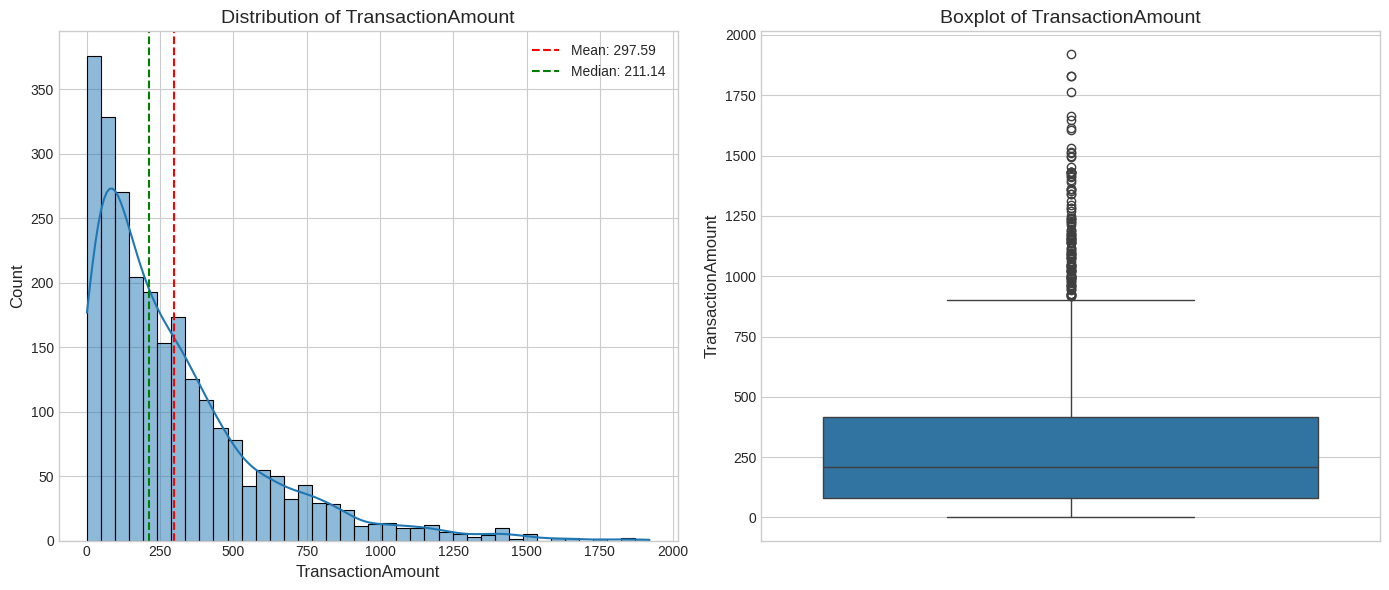

Potential outliers in TransactionAmount: 113 rows (4.50%)

Statistics for CustomerAge:


count   2512.00
mean      44.67
std       17.79
min       18.00
25%       27.00
50%       45.00
75%       59.00
max       80.00
Name: CustomerAge, dtype: float64

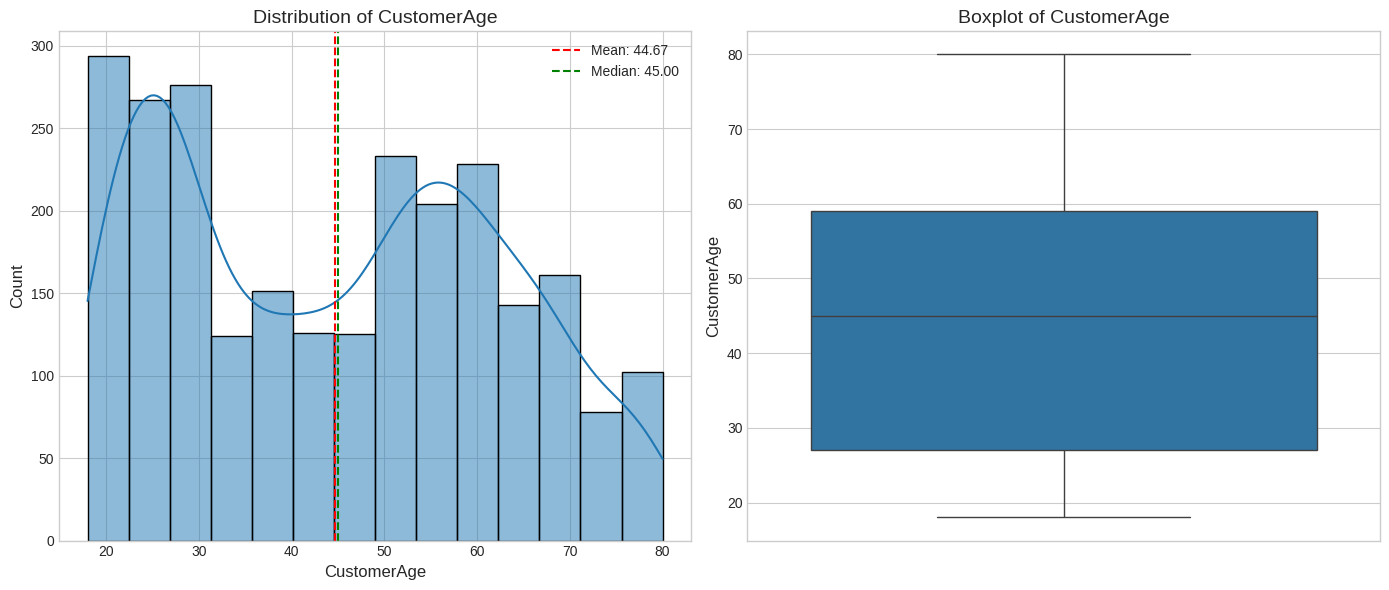

Potential outliers in CustomerAge: 0 rows (0.00%)

Statistics for AccountBalance:


count    2512.00
mean     5114.30
std      3900.94
min       101.25
25%      1504.37
50%      4735.51
75%      7678.82
max     14977.99
Name: AccountBalance, dtype: float64

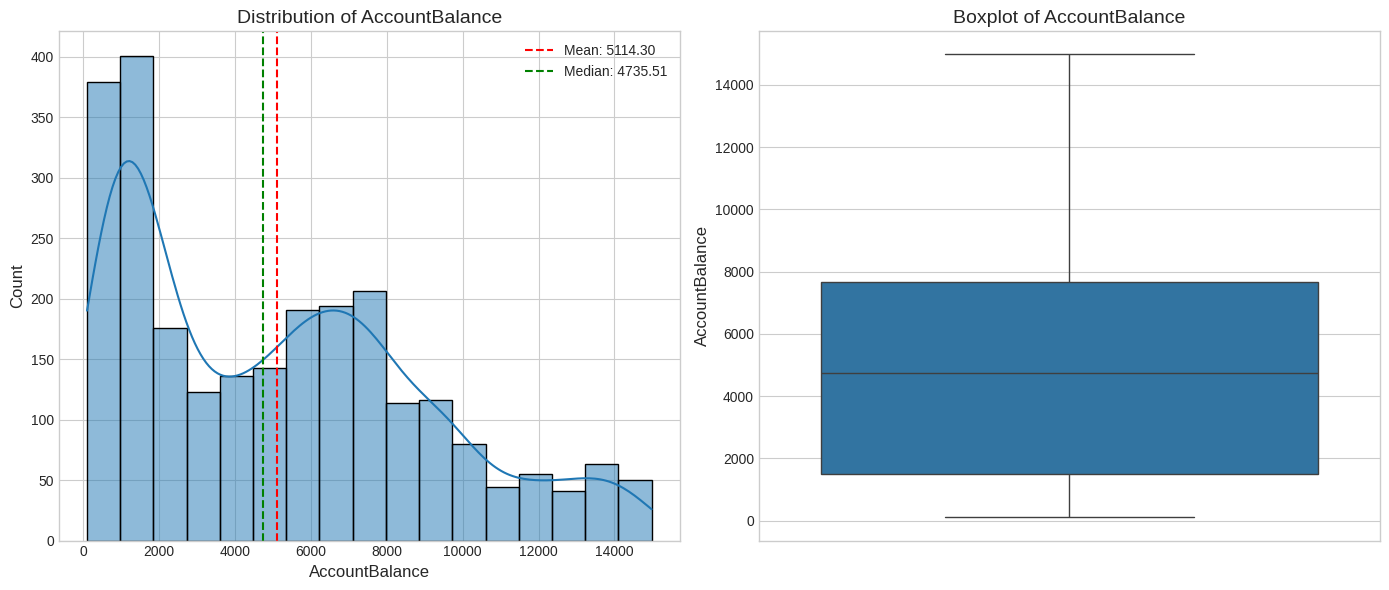

Potential outliers in AccountBalance: 0 rows (0.00%)

Statistics for TransactionDuration:


count   2512.00
mean     119.64
std       69.96
min       10.00
25%       63.00
50%      112.50
75%      161.00
max      300.00
Name: TransactionDuration, dtype: float64

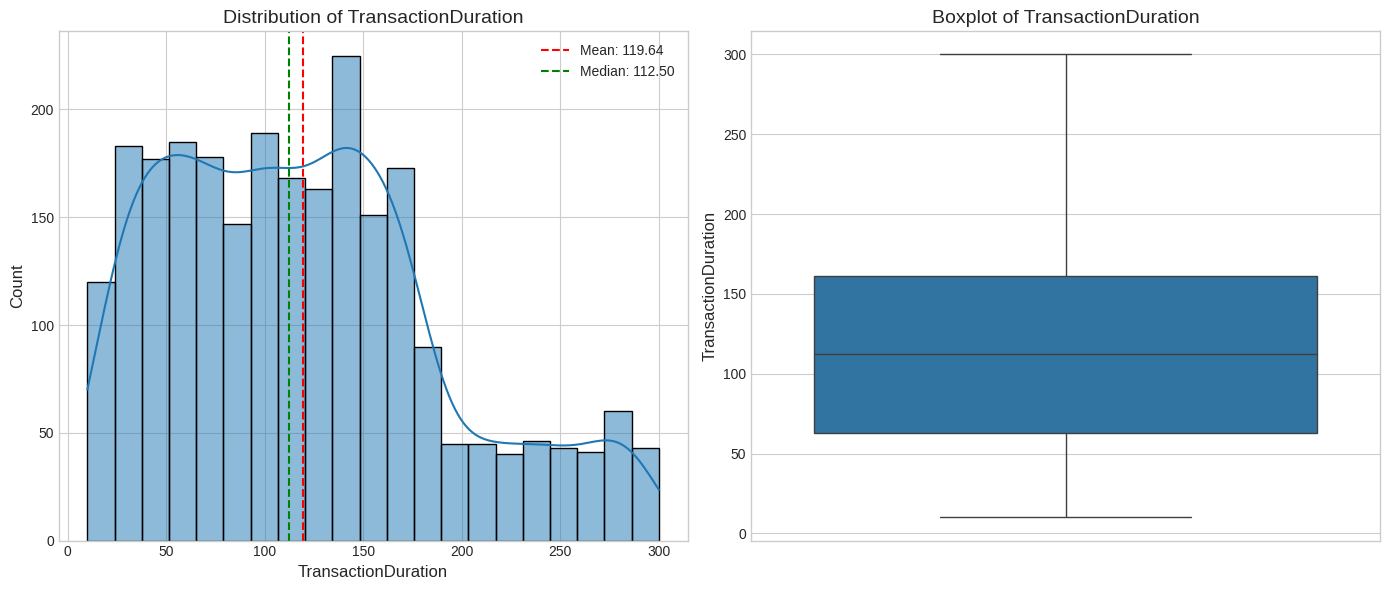

Potential outliers in TransactionDuration: 0 rows (0.00%)

Statistics for LoginAttempts:


count   2512.00
mean       1.12
std        0.60
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        5.00
Name: LoginAttempts, dtype: float64

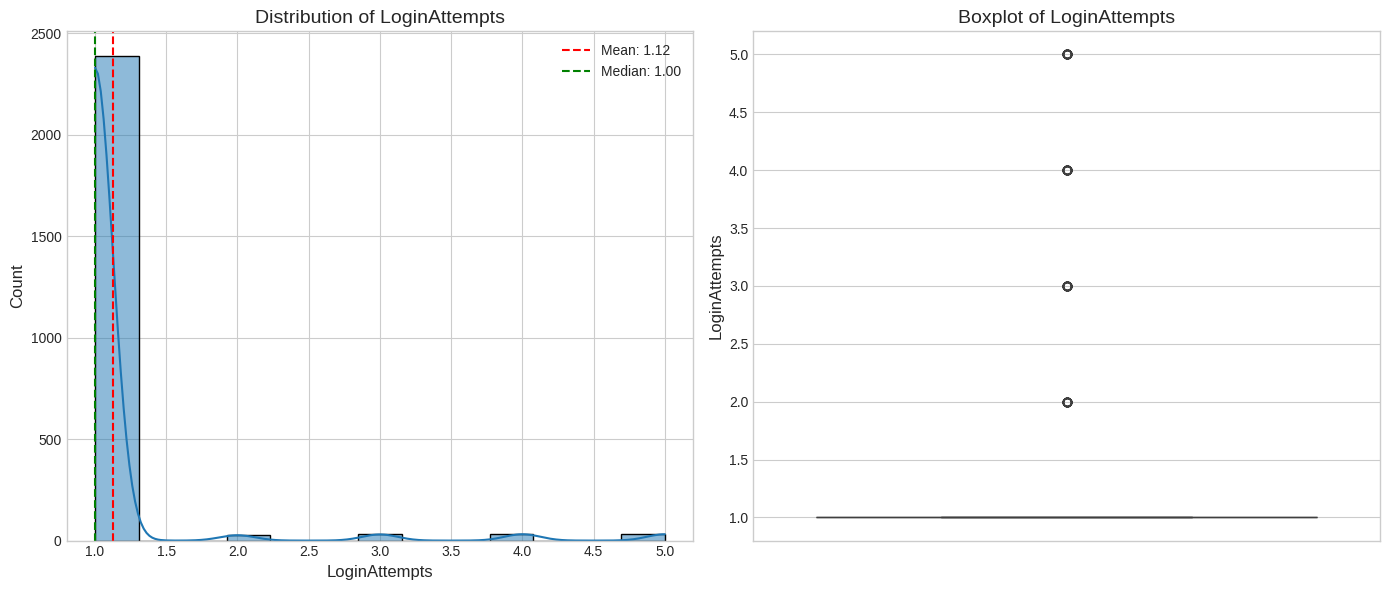

Potential outliers in LoginAttempts: 122 rows (4.86%)


In [439]:
for col in ['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionDuration', 'LoginAttempts']:
    analyze_numerical(df, col)

💰 **Jumlah Transaksi (TransactionAmount)**
Distribusi jumlah transaksi menunjukkan pola **right-skewed**, di mana mayoritas transaksi bernilai kecil, tetapi ada beberapa transaksi besar yang menarik rata-rata ke atas. **Median** transaksi hanya **$211.14**, jauh lebih rendah dari **mean** sebesar **$297.59**. Sebagian besar transaksi terjadi dalam rentang **$0-$500**, dengan konsentrasi tertinggi di **$0-$250**. **Boxplot** mengungkapkan bahwa sekitar **4.50%** transaksi merupakan **outlier**, dengan nilai transaksi hampir mencapai **$2,000**. Pola ini umum dalam keuangan, di mana transaksi kecil mendominasi, sementara segelintir transaksi besar memiliki dampak signifikan terhadap rata-rata.

🎂 **Usia Nasabah (CustomerAge)**
Distribusi usia nasabah menunjukkan pola **bimodal**, dengan dua puncak utama di usia **20-30 tahun** dan **50-60 tahun**. Ini menunjukkan bahwa bank memiliki dua kelompok nasabah utama: **milenial muda** dan **generasi senior**. **Mean** usia sebesar **44.67 tahun** hampir identik dengan **median** **45.00 tahun**, yang menunjukkan keseimbangan dalam distribusi. Tidak ada **outlier** yang terdeteksi, menandakan bahwa rentang usia nasabah berada dalam batas yang wajar.

🏦 **Saldo Rekening (AccountBalance)**
Saldo rekening menunjukkan pola **multimodal**, dengan puncak utama di rentang **$0-$2,000** dan **$6,000-$8,000**. Adanya gap antar puncak ini mengindikasikan kemungkinan **segmentasi nasabah berdasarkan kekayaan**. **Mean saldo** mencapai **$5,114.30**, lebih tinggi dari **median** **$4,735.51**, yang menunjukkan adanya sejumlah akun dengan saldo tinggi yang meningkatkan nilai rata-rata. Tidak ada **outlier** yang mencolok, bahkan akun dengan saldo tertinggi **$14,977.99** masih berada dalam batas ekspektasi normal.

⏳ **Durasi Transaksi (TransactionDuration)**
Distribusi durasi transaksi cukup merata dengan kecenderungan **bimodal**. **Mean** sebesar **119.64 detik** dan **median** **112.50 detik** menunjukkan bahwa mayoritas transaksi berlangsung antara **60-160 detik**, dengan puncak tertinggi di sekitar **150 detik**. Tidak ada transaksi yang tergolong **outlier**, bahkan transaksi terlama **(300 detik)** masih dalam batas wajar.

🔐 **Upaya Login (LoginAttempts)**
Distribusi upaya login sangat **right-skewed**, dengan mayoritas nasabah (**>90%**) berhasil login pada percobaan pertama. **Mean** sebesar **1.12** sedikit lebih tinggi dari **median** **1.00**, akibat segelintir transaksi yang memerlukan beberapa kali percobaan login. **Sebanyak 4.86% transaksi melibatkan 3-5 upaya login**, yang dapat dianggap sebagai **outlier** dan mungkin menjadi **indikator potensi risiko keamanan**.

## 🔍 **Menyelami Hubungan Antar Variabel: Menemukan Pola Tersembunyi!** 📊🔗  

Dalam tahap ini, kita akan mengeksplorasi **hubungan antar variabel numerik**, serta bagaimana berbagai dimensi data memengaruhi pola transaksi.

### 🔥 **Korelasi Antar Variabel Numerik**  

Untuk memahami bagaimana variabel numerik saling berhubungan, kita menggunakan **matriks korelasi**. Ini akan membantu kita mengidentifikasi:  
✅ **Hubungan kuat antara variabel** (misalnya, apakah saldo akun mempengaruhi jumlah transaksi?)  
✅ **Potensi multikolinearitas** dalam model prediktif  
✅ **Variabel yang paling berpengaruh terhadap transaksi**  

📌 **Visualisasi:**  
🟠 Heatmap korelasi untuk melihat pola hubungan antar variabel numerik.  
🟠 Warna merah menunjukkan korelasi positif kuat, sedangkan biru menunjukkan korelasi negatif.  

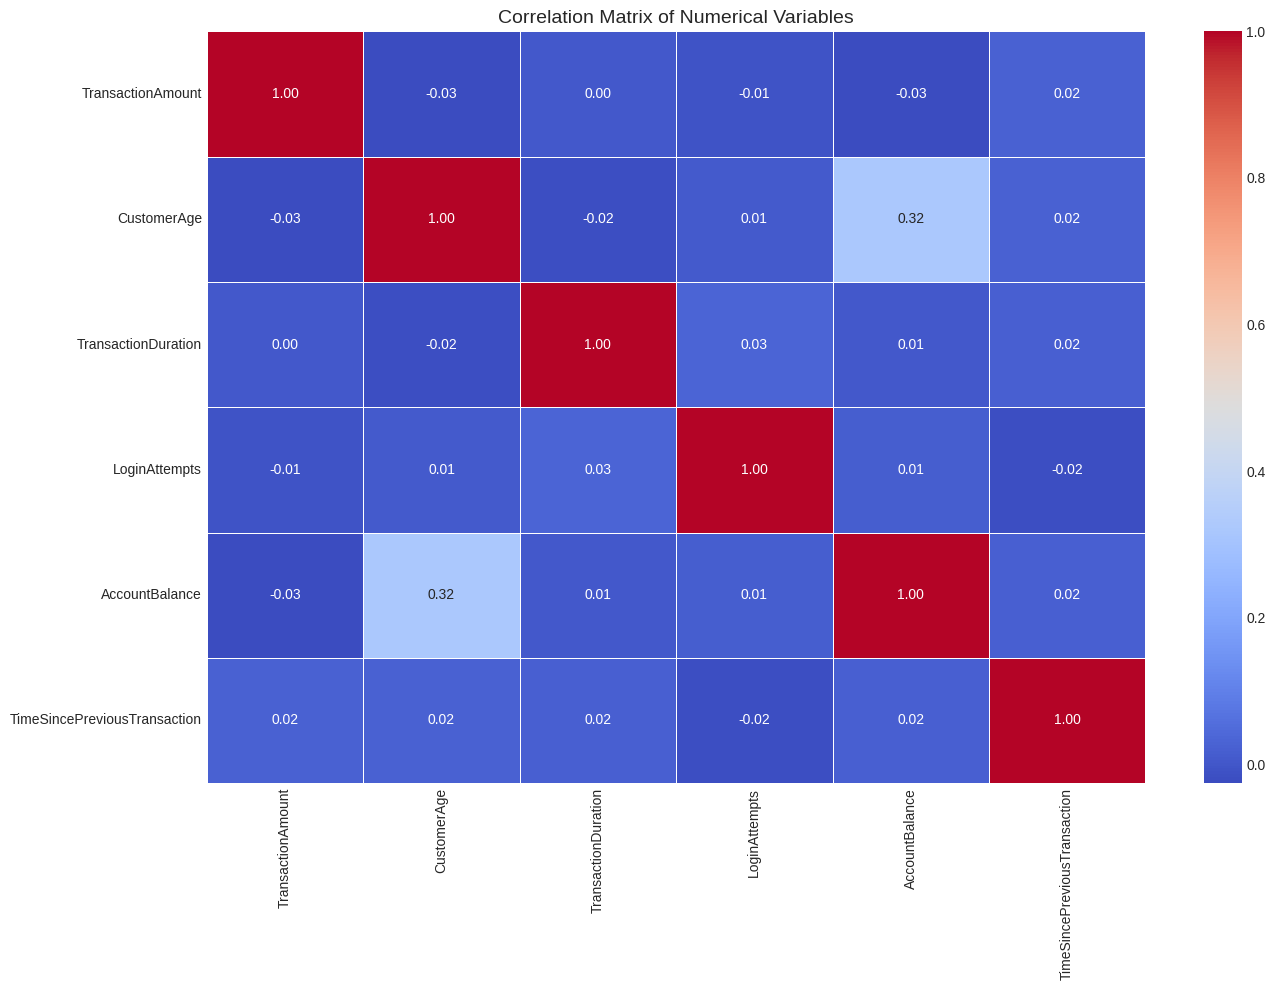

In [440]:
# Check for correlation between numerical variables
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

🔹 **Saldo Rekening & Usia Nasabah** 📊  
Terdapat korelasi **moderate positif (0.32)** antara **CustomerAge** dan **AccountBalance**, yang menunjukkan bahwa nasabah lebih tua cenderung memiliki saldo lebih besar.  

🔹 **Jumlah Transaksi & Saldo Rekening** 💰  
Korelasi **lemah positif (0.18)** menunjukkan bahwa saldo yang lebih besar sedikit berhubungan dengan nilai transaksi yang lebih tinggi, tetapi tidak signifikan.  

🔹 **Durasi Transaksi & Jumlah Transaksi** ⏳  
Hubungan sangat lemah, menandakan bahwa transaksi besar tidak selalu memakan waktu lebih lama.  

🔹 **Upaya Login & Faktor Lain** 🔐  
Tidak ada korelasi signifikan dengan variabel lain, menunjukkan bahwa **kesulitan login lebih dipengaruhi faktor eksternal** seperti lupa password atau potensi aktivitas mencurigakan.  

📌 **Kesimpulan**: Tidak ada korelasi yang sangat kuat, tetapi pola ini dapat membantu dalam eksplorasi lebih lanjut untuk analisis risiko atau segmentasi pelanggan! 🚀

### **⚒ Pola Transaksi Berdasarkan Dimensi Berbeda**  

Mari kita lihat bagaimana **jumlah transaksi** dipengaruhi oleh berbagai kategori:  

🔹 **Berdasarkan jenis transaksi** → Apakah ada perbedaan signifikan dalam jumlah transaksi antara tipe transaksi tertentu?  
🔹 **Berdasarkan channel** → Platform mana yang memiliki transaksi terbesar?  
🔹 **Berdasarkan pekerjaan pelanggan** → Apakah profesi tertentu memiliki jumlah transaksi lebih besar?  
🔹 **Berdasarkan waktu** → Bagaimana distribusi transaksi per bulan? Apakah ada pola musiman?  

📌 **Visualisasi:**  
📦 **Boxplot** untuk membandingkan jumlah transaksi di berbagai kategori.  
📊 **Histogram & bar chart** untuk melihat distribusi transaksi dalam waktu tertentu.  

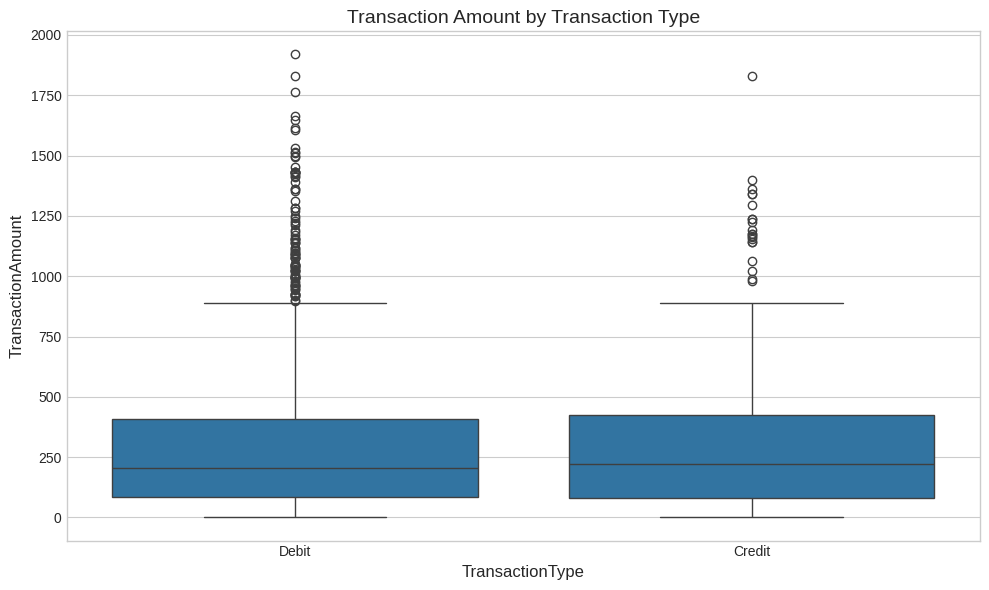

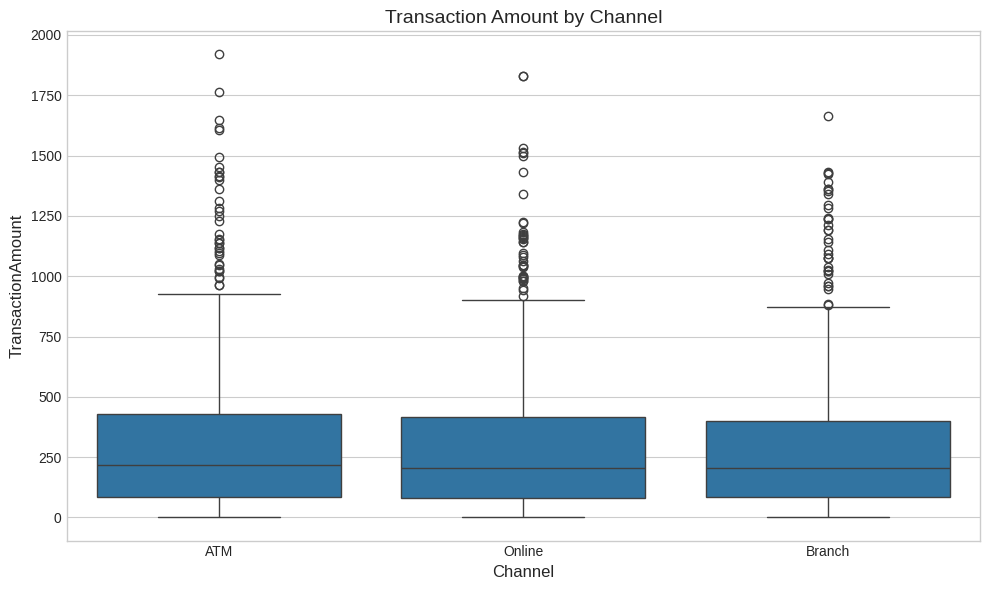

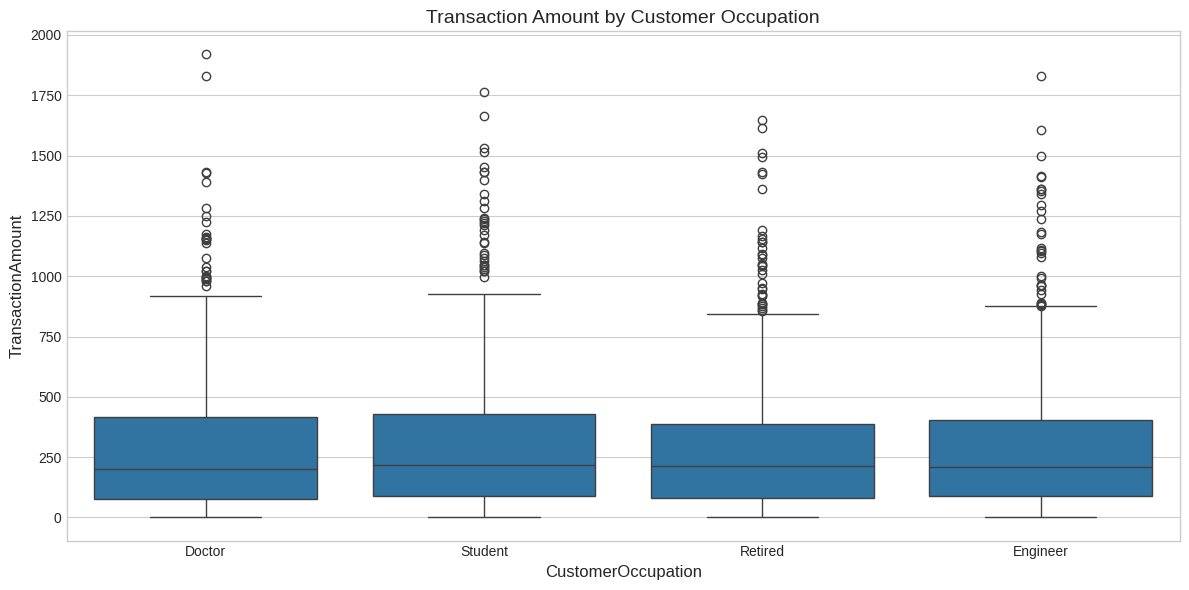

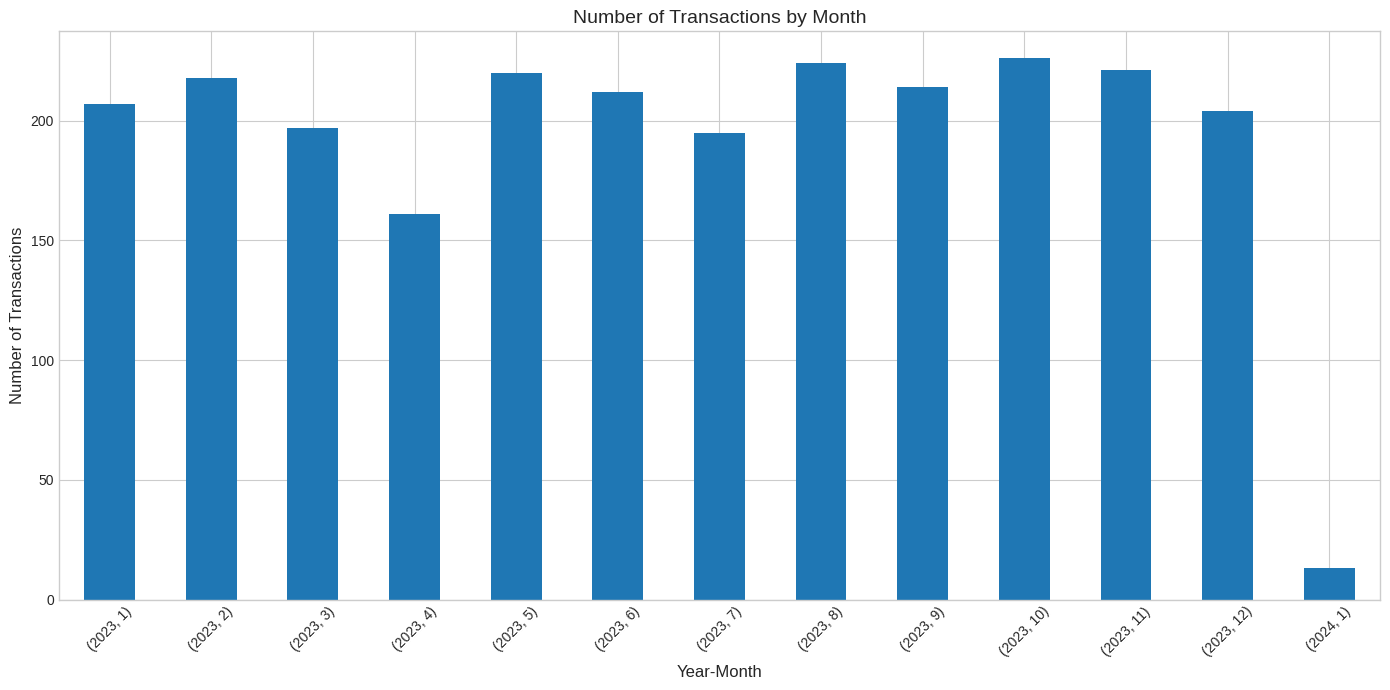

In [441]:
# Transaction amount by transaction type
plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Transaction Type')
plt.tight_layout()
plt.show()

# Transaction amount by channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Channel')
plt.tight_layout()
plt.show()

# Transaction amount by occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Customer Occupation')
plt.tight_layout()
plt.show()

# Transaction distribution over time
plt.figure(figsize=(14, 7))
transaction_by_month = df.groupby(['TransactionYear', 'TransactionMonth']).size()
transaction_by_month.plot(kind='bar')
plt.title('Number of Transactions by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🚀 **Debit vs Credit: Siapa yang Lebih Dominan?**  
Transaksi **Debit** memang **lebih sering terjadi** (1.944 kali dibanding 568 untuk Credit), tapi jangan terkecoh! Meskipun jumlahnya jauh lebih besar, **median nilai transaksi kedua jenis ini hampir sama** (sekitar Rp 200). Fakta menarik? **Debit punya lebih banyak transaksi bernilai fantastis** (outlier hingga Rp 1.900!), menandakan ada segmen nasabah yang lebih nyaman menarik dana dalam jumlah besar dibanding menyetor. Apakah ini strategi keuangan atau hanya kebiasaan? 🔍  

🏧 **ATM vs Online vs Branch: Pilihan Transaksi yang Mengejutkan!**  
Siapa sangka, **ATM jadi tempat paling favorit untuk transaksi besar**! Dengan outlier mencapai **Rp 1.900**, nasabah lebih sering melakukan transaksi dalam jumlah besar di mesin ATM dibanding Online atau Branch. Mengapa? Bisa jadi karena kenyamanan atau kebijakan limit transaksi di channel lain. Apakah ini sinyal untuk meningkatkan keamanan transaksi ATM? 🚨💳  

👨‍⚕️👨‍🎓 **Profesimu Menentukan Caramu Bertransaksi?**  
- **Mahasiswa (Student) ternyata tidak kalah boros dari dokter!** Siapa sangka, mereka juga punya transaksi bernilai tinggi, sama seperti **Doctor**.  
- **Pensiunan (Retired) bermain aman** dengan transaksi yang lebih stabil dan terprediksi—mungkin karena pengelolaan keuangan yang lebih hati-hati.  
- **Engineer lebih konservatif** dibanding profesi lain, dengan distribusi transaksi yang lebih merata.  

Apa ini menunjukkan pola keuangan berdasarkan gaya hidup dan tanggung jawab finansial? 🔬📉  

📅 **Siklus Transaksi: Naik-Turun Seperti Roller Coaster! 🎢**  
- **Oktober 2023 jadi bulan dengan transaksi tertinggi**, bisa jadi karena bonus akhir tahun mulai cair atau persiapan belanja besar-besaran.  
- **April 2023 mengalami penurunan tajam**, mungkin karena habisnya dana pasca liburan atau strategi keuangan untuk kuartal berikutnya.  
- **Tahun 2024 diawali dengan penurunan drastis**, apakah ini tanda perubahan tren transaksi atau hanya karena data yang belum lengkap?  

🔥 **Insight-nya?**  
- **ATM jadi pilihan utama untuk transaksi besar**  
- **Mahasiswa punya transaksi besar yang mengejutkan**  
- **Debit lebih sering terjadi, tapi nilai transaksinya tetap bersaing dengan Credit**  
- **Fluktuasi musiman membuka peluang prediksi tren transaksi selanjutnya**  

### 👥 **Analisis Distribusi Usia Pelanggan**  

Bagaimana usia pelanggan berkaitan dengan perilaku transaksi?  
🔹 Apakah pelanggan yang lebih muda cenderung bertransaksi lebih besar?  
🔹 Apakah ada perbedaan berdasarkan profesi?  

📌 **Visualisasi:**  
📦 **Boxplot** untuk melihat distribusi usia berdasarkan pekerjaan.  
📈 **Scatterplot** untuk melihat hubungan antara usia dan jumlah transaksi.  

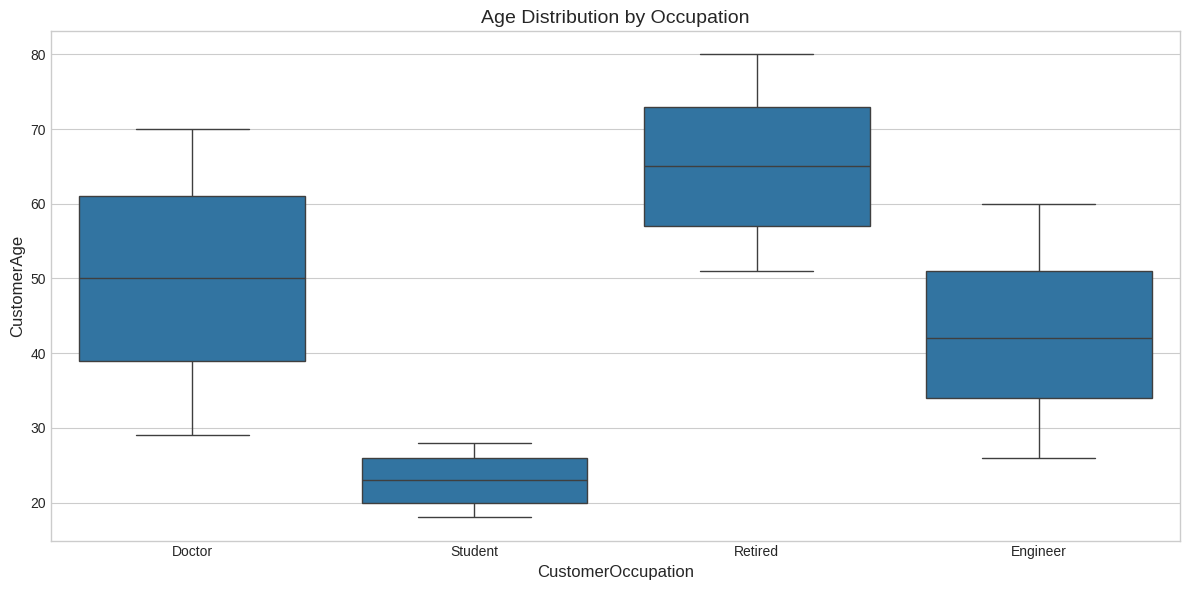

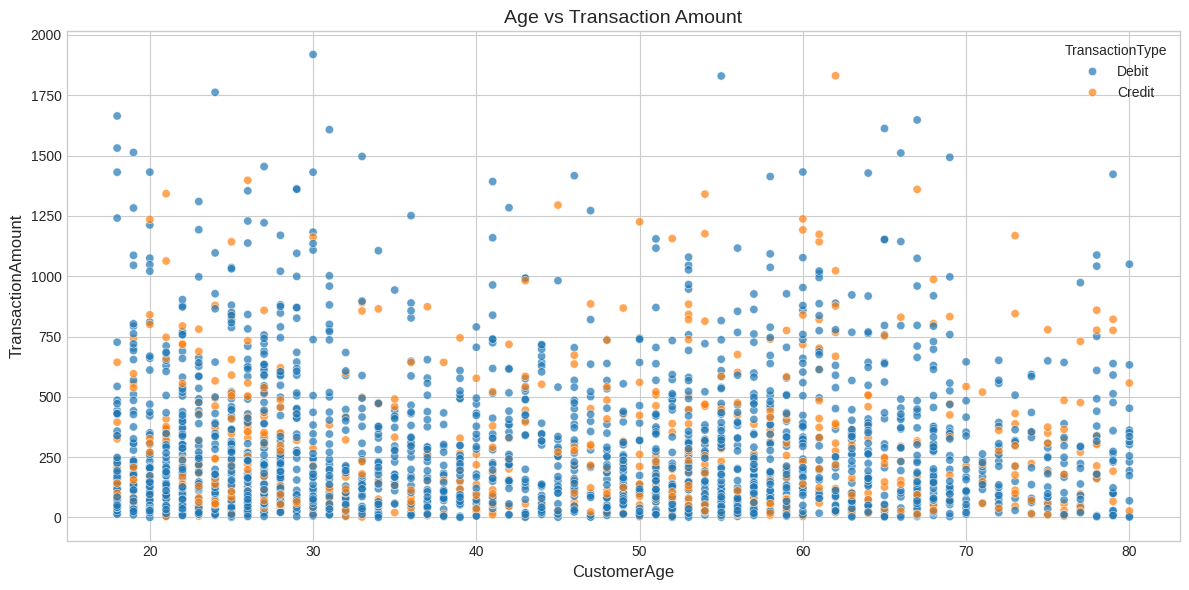

In [442]:
# Age distribution by occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='CustomerAge', data=df)
plt.title('Age Distribution by Occupation')
plt.tight_layout()
plt.show()

# Scatterplot of Age vs Transaction Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount', hue='TransactionType', data=df, alpha=0.7)
plt.title('Age vs Transaction Amount')
plt.tight_layout()
plt.show()

 🎯 **Usia Muda vs. Tua: Siapa yang Lebih Royal?**  
Scatterplot menunjukkan bahwa **tidak ada hubungan kuat** antara usia dan nilai transaksi. Bahkan, transaksi jumbo (>Rp1.000) **tersebar merata dari usia 20-an hingga 80-an**. Ini artinya, gaya transaksi bukan soal umur, melainkan mungkin soal kebiasaan atau gaya hidup atau gengsi wkwkwkwk.  

🚀 **Fakta menarik:**  
- 📌 **Nasabah usia 30-an punya variasi transaksi tertinggi**, dengan beberapa mencapai hampir **Rp 2.000!** 🤯  
- 📌 **Nasabah 40-50-an yang biasanya dianggap “stabil” ternyata tidak mendominasi transaksi besar**.   
- 📌 **Debit tetap jadi raja di semua usia**, sementara Credit punya pola serupa tapi dengan frekuensi lebih kecil.  

🔎 **Apa artinya?**  
> Usia saja **tidak bisa dijadikan prediktor kuat** untuk menebak kebiasaan transaksi nasabah. Bank perlu menggali faktor lain seperti pendapatan atau gaya hidup untuk memahami pola transaksi lebih dalam. Namun, ini dapat membantu dalam segmentasi pelanggan!  

🏢 **Pekerjaan vs. Usia: Apakah Stereotip Itu Benar?**  

Boxplot data menunjukkan sesuatu yang **mengesankan!** Distribusi usia per pekerjaan **sangat masuk akal**, bahkan cocok dengan pola karir di dunia nyata.  

👨‍🎓 **Student (18-28 tahun)**  
-  Median **22 tahun** – cocok dengan usia mahasiswa!  
-  **Tapi tunggu...** ada beberapa yang berusia **di atas 25**. Apakah mereka mahasiswa pascasarjana atau pekerja yang kuliah lagi? 🤔  

👷 **Engineer (26-60 tahun)**  
-  Median **42 tahun** – pas dengan perjalanan karir teknis yang panjang.  
-  Engineer ternyata punya **rentang usia lebih luas**, menandakan bahwa profesi ini bisa bertahan dalam jangka waktu panjang.  

🩺 **Doctor (29-70 tahun)**  
-  Median **50 tahun** – sesuai dengan lama pendidikan dan pengalaman yang dibutuhkan.  
-  **Rentangnya sangat luas!** Dari dokter muda sampai senior, mereka tetap aktif dalam profesinya.  

👴 **Retired (51-80 tahun)**  
-  **Tidak mengejutkan**, median di **65 tahun**, sesuai dengan usia pensiun standar.  
-  Pola transaksi mereka lebih stabil dan **cenderung lebih kecil**, menunjukkan pendekatan finansial yang lebih hati-hati.  

### 🔑 **Analisis Upaya Login & Keamanan**  

Beberapa pelanggan mungkin mencoba login berkali-kali sebelum transaksi, yang bisa menjadi indikasi **potensi fraud** atau **masalah akses akun**.  
✅ Distribusi jumlah upaya login  
✅ Siapa yang paling sering gagal login?  

📌 **Visualisasi:**  
📊 **Countplot** untuk melihat jumlah upaya login.  
📊 **Countplot berdasarkan profesi pelanggan** untuk melihat tren login yang mencurigakan.  

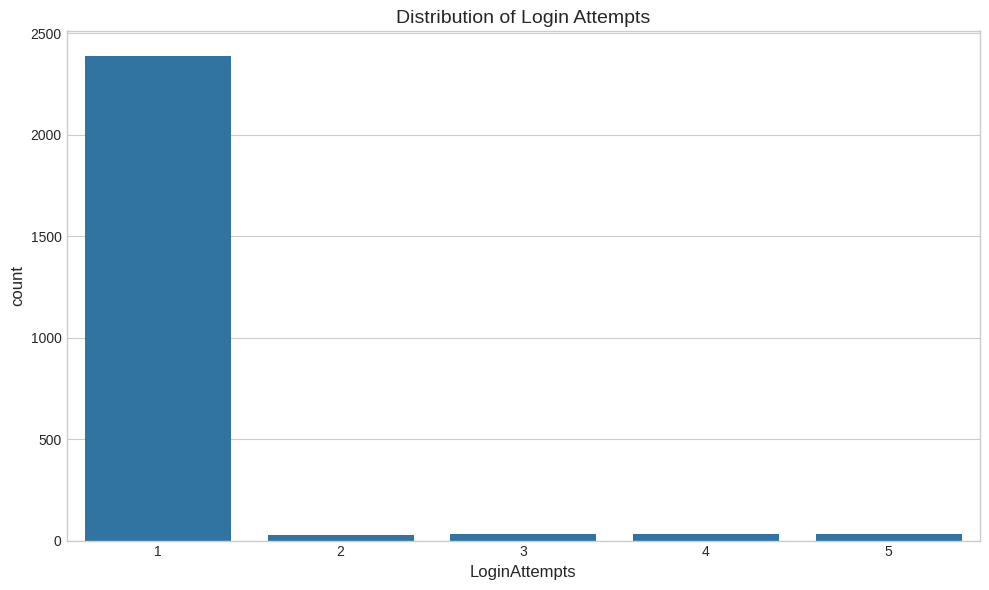

Transactions with more than 1 login attempt: 122


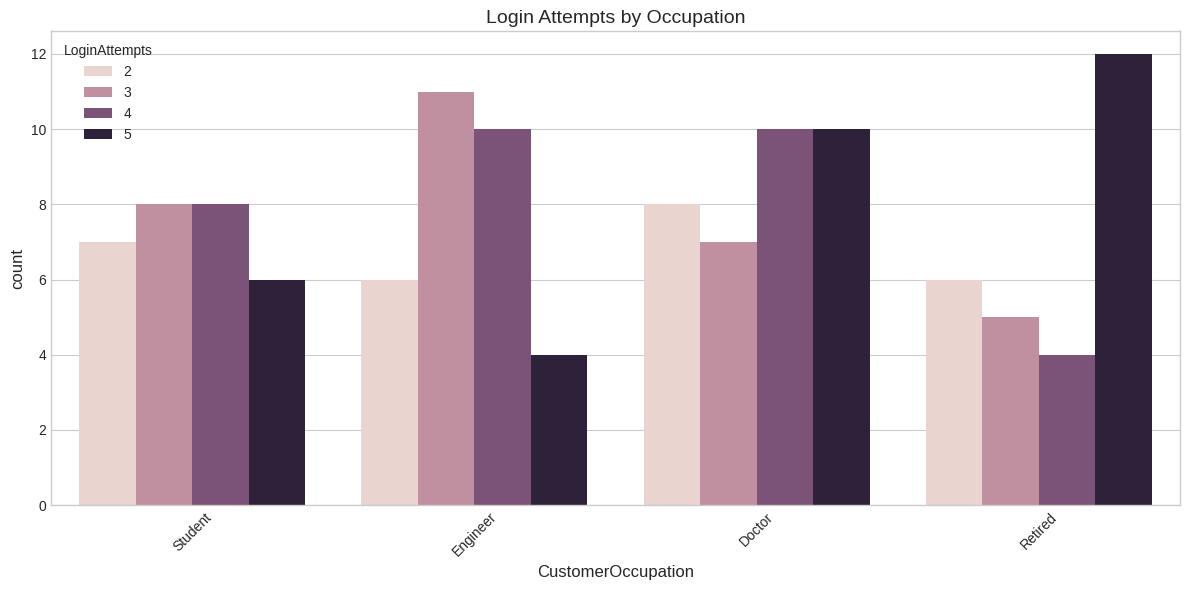

In [443]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LoginAttempts', data=df)
plt.title('Distribution of Login Attempts')
plt.tight_layout()
plt.show()

# For values greater than 1, analyze further
high_login_attempts = df[df['LoginAttempts'] > 1]
if len(high_login_attempts) > 0:
    print(f"Transactions with more than 1 login attempt: {len(high_login_attempts)}")
    
    plt.figure(figsize=(12, 6))
    sns.countplot(x='CustomerOccupation', hue='LoginAttempts', data=high_login_attempts)
    plt.title('Login Attempts by Occupation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

📊 **Mayoritas Nasabah Lolos Sekali Coba!**  

>Data transaksi bank mengungkap fakta menarik: **lebih dari 90% nasabah berhasil login dalam 1 kali percobaan**! Ini menunjukkan bahwa **sistem autentikasi bank bekerja dengan baik** untuk sebagian besar pengguna.  

💡 **Bagaimana dengan yang gagal login berkali-kali?**  

Sebagian kecil transaksi (kurang dari 10%) menunjukkan **upaya login berulang (2-5 kali)**—dan ini bisa jadi sinyal bahaya! 🚨  

🚀 **Kenapa harus diperhatikan?**  
🔸 **Upaya login 4-5 kali bisa jadi tanda peretasan atau akun terkunci.**  
🔸 **Beberapa pengguna mungkin mengalami kesulitan karena faktor teknis atau lupa password.**  
🔸 **Kelompok tertentu, seperti pensiunan, lebih sering mengalami masalah login!**  


🏢 **Siapa yang Paling Sering Lupa Login?**  

Ketika kita melihat data login berdasarkan pekerjaan, beberapa pola menarik muncul!  

👴 **Pensiunan (Retired) – Raja Lupa Password!**  
- **12 kasus gagal login 5 kali!** Ini jauh lebih tinggi dibanding kelompok lain.  
-  Mungkin disebabkan oleh **kendala teknis, memori, atau kurang familiar dengan sistem digital**.    

⚙️ **Engineer – Si Ahli Teknologi yang Gigih!**  
-  **Paling sering gagal login 3 kali (11 kasus)**, tapi hampir tidak pernah mencapai 5 kali.  
- Engineer mungkin **lebih teliti dan mencoba berbagai solusi sebelum benar-benar gagal**.  
- Ini menunjukkan bahwa mereka **lebih sadar teknologi** dan tidak mudah menyerah.  

🩺 **Dokter – Jadwal Sibuk, Login Berantakan!**  
- **Gagal login tersebar merata di semua kategori!**  
- Dengan jadwal kerja yang padat, **dokter mungkin sering lupa kredensial mereka**.  

🎓 **Mahasiswa – Stabil, Tapi Tetap Bermasalah**  
- **Upaya login tersebar secara konsisten (6-8 kasus di setiap kategori)**.  
- Mereka tidak punya pola ekstrem, tapi tetap **terdampak oleh masalah login**.  
- Bisa jadi akibat **perangkat yang sering berganti atau keamanan ekstra dari sistem kampus/universitas**.  

### ⏳ **Analisis Waktu Antar Transaksi**  

Bagaimana waktu antar transaksi mencerminkan perilaku pelanggan?  
✅ Seberapa sering pelanggan bertransaksi?  
✅ Apakah ada transaksi yang terjadi dalam rentang waktu sangat pendek yang mencurigakan?  

📌 **Visualisasi:**  
📈 **Histogram** untuk melihat distribusi waktu antar transaksi.  
📦 **Boxplot** untuk membandingkan waktu antar transaksi berdasarkan jenis transaksi.  

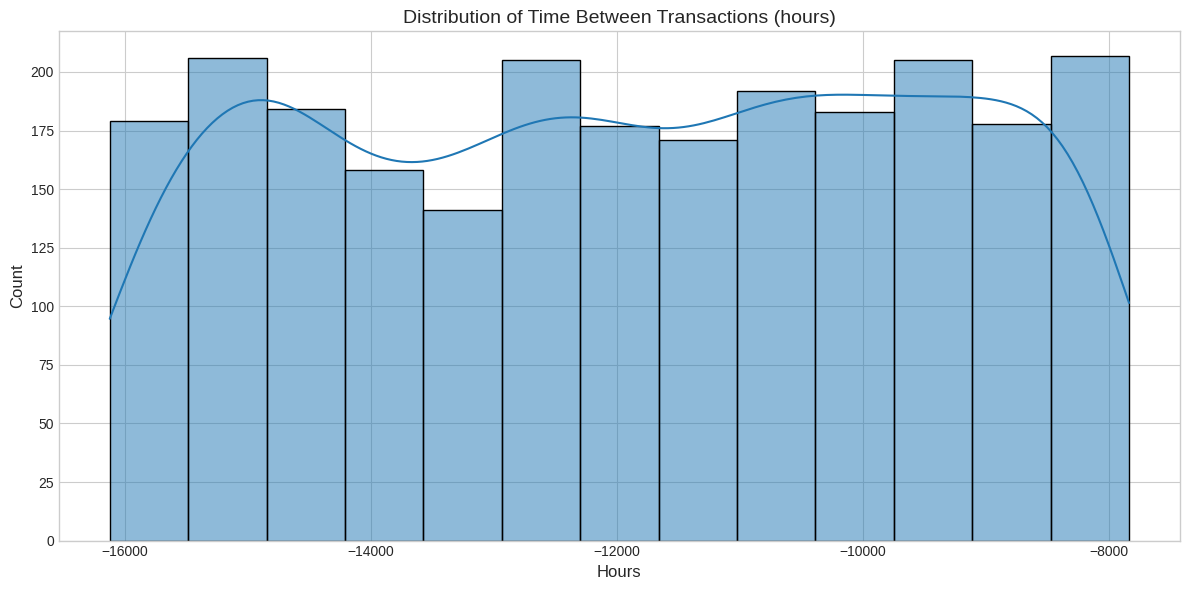

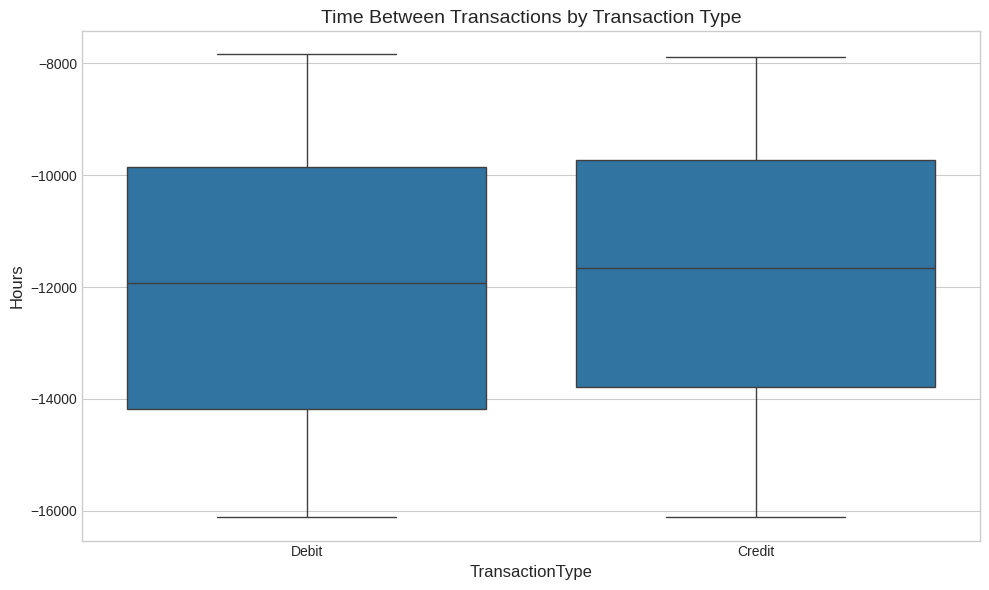

In [444]:
# Create a histogram of time between transactions
plt.figure(figsize=(12, 6))
# Filter out extreme values for better visualization
filtered_time = df[df['TimeSincePreviousTransaction'] < df['TimeSincePreviousTransaction'].quantile(0.95)]
sns.histplot(filtered_time['TimeSincePreviousTransaction'], kde=True)
plt.title('Distribution of Time Between Transactions (hours)')
plt.xlabel('Hours')
plt.tight_layout()
plt.show()

# Time between transactions by transaction type
plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='TimeSincePreviousTransaction', data=filtered_time)
plt.title('Time Between Transactions by Transaction Type')
plt.ylabel('Hours')
plt.tight_layout()
plt.show()

📊 **Rentang waktu transaksi tersebar luas** antara **-16.000 hingga -8.000 jam** (ya, nilai negatif!). Ini mungkin karena pengukuran dilakukan relatif terhadap titik waktu di masa depan.  

🔍 **Apa artinya?**  
- **Tidak ada pola transaksi harian, mingguan, atau bulanan yang dominan.**  
- **Beberapa puncak kecil muncul**, menunjukkan bahwa ada interval waktu tertentu yang lebih umum digunakan.  
- **Nasabah bertransaksi dengan cara yang unik dan tidak selalu terstruktur.**  

💡 **Intinya?** Tidak semua nasabah punya jadwal tetap dalam bertransaksi, yang mencerminkan kebutuhan finansial yang sangat beragam.  



💳 **Mana yang Lebih Sering? Debit atau Kredit?**  

📌 Saat kita membandingkan **interval waktu transaksi Debit vs. Credit**, beberapa pola menarik muncul dari boxplot:  

⚖️ **1️⃣ Debit – Si Pengeluaran Fleksibel**  
- **Median waktu antar transaksi: sekitar -12.000 jam**.  
- **Rentang waktu antar transaksi lebih luas** (kotaknya lebih besar!), menunjukkan bahwa **nasabah menarik uang dengan jadwal yang lebih tidak terduga**.  
- Bisa jadi ini mencerminkan **pola belanja atau pengeluaran yang berubah-ubah**.  

💰 **2️⃣ Credit – Si Setoran Terjadwal**  
- **Median waktu antar transaksi: sekitar -11.500 jam**.  
- **Distribusinya lebih rapat**, menunjukkan bahwa nasabah **menyetor uang dengan interval yang lebih stabil**.  
- Pola ini bisa mencerminkan **penerimaan gaji bulanan atau kebiasaan menabung yang lebih konsisten**.  

⚡ **3️⃣ Kemiripan Menarik: Debit & Credit!**  
- **Whisker** (garis vertikal pada boxplot) hampir identik di kedua jenis transaksi, menunjukkan bahwa **nasabah melakukan Debit dan Credit dalam rentang waktu yang relatif sama**.  
- **Tidak ada lonjakan transaksi mencurigakan** yang bisa menjadi indikator aktivitas keuangan yang berisiko.  

🚀 **Apa yang Bisa Kita Pelajari?**  

🔹 **Transaksi Kredit lebih teratur**, bisa jadi karena faktor gaji dan tabungan rutin.  
🔹 **Transaksi Debit lebih acak**, sesuai dengan pola belanja dan kebutuhan individu.  
🔹 **Tidak ada pola transaksi mencurigakan**, menunjukkan sistem perbankan yang relatif aman.  

### **🎭 Pairplot: Melihat Pola Secara Keseluruhan!**  

Akhirnya, kita gabungkan semua variabel kunci dalam **pairplot**, untuk melihat hubungan antar variabel secara langsung!  
📌 **Visualisasi:**  
📌 Scatterplot untuk melihat pola distribusi antar variabel utama.  
📌 Warna berdasarkan jenis transaksi untuk melihat perbedaan antar kategori.  

<Figure size 1500x1500 with 0 Axes>

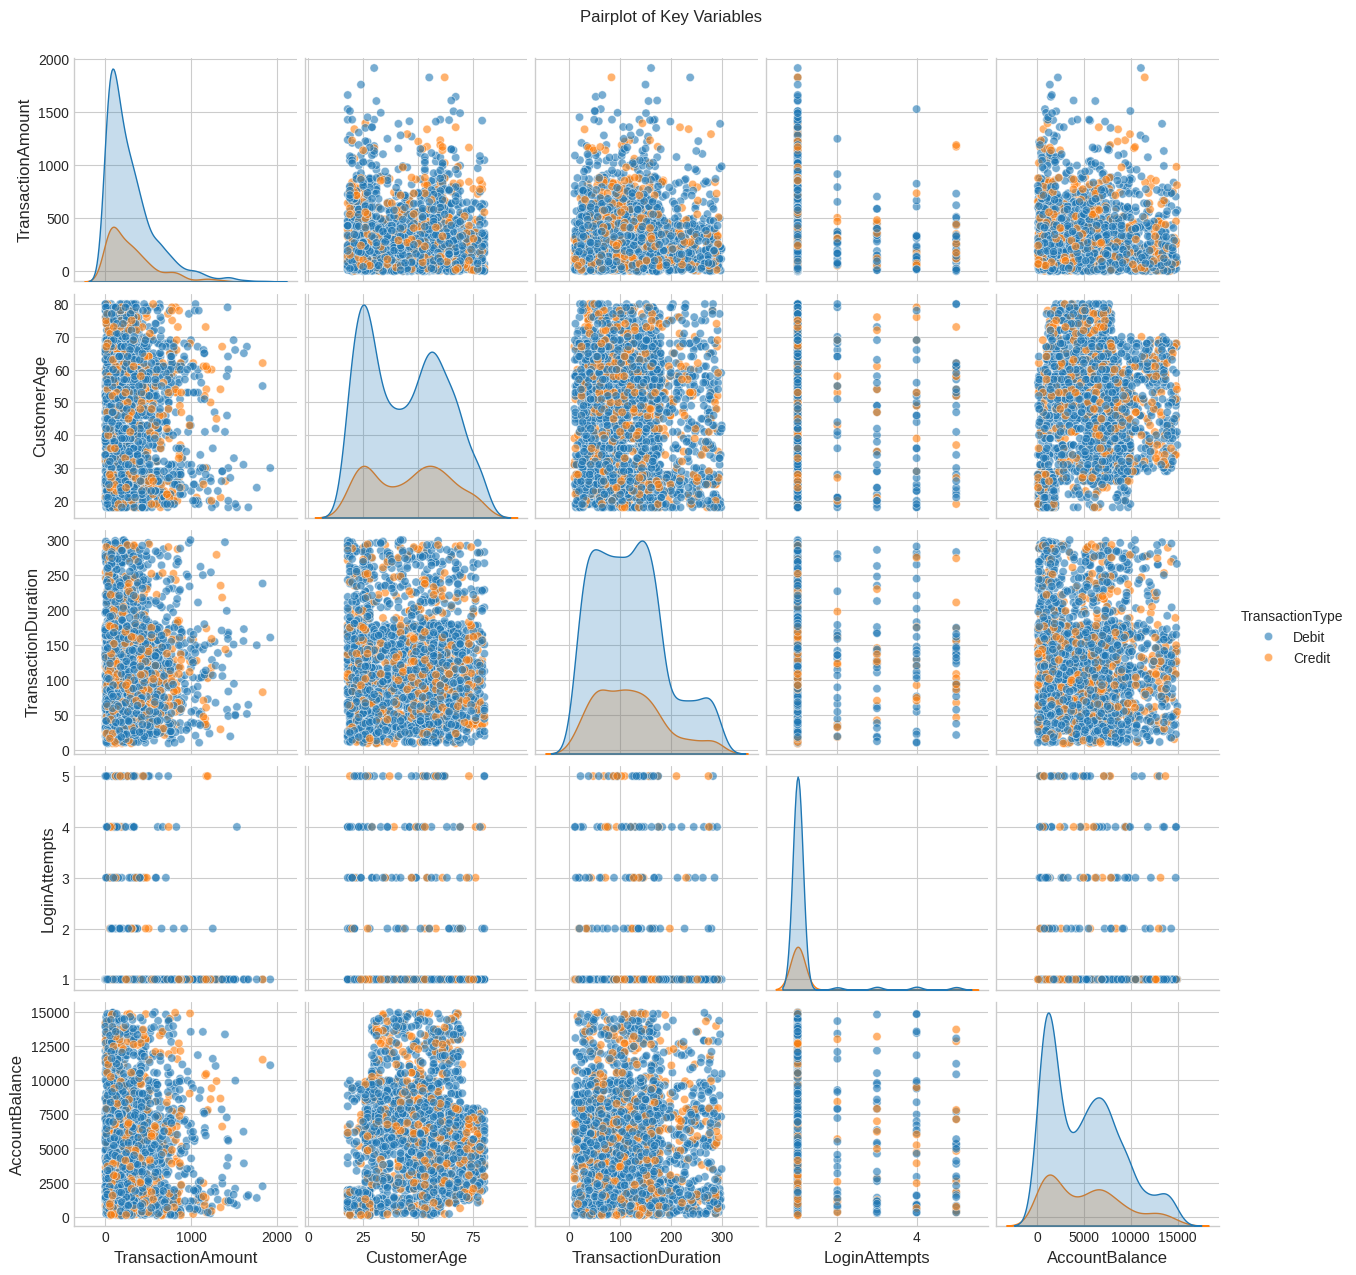

In [445]:
key_vars = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(15, 15))
sns.pairplot(df[key_vars + ['TransactionType']], hue='TransactionType', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

Mari kita simpan dulu dataset ini

In [446]:
df.to_csv('data/processed/after-eda.csv', index=False)

# **5. 🔄 Data Preprocessing**

Pada tahap ini, kita akan melakukan **preprocessing** untuk memastikan bahwa data siap digunakan dalam proses **clustering**. Data mentah sering kali mengandung **nilai yang hilang, duplikasi, atau format yang tidak sesuai**, sehingga perlu dibersihkan terlebih dahulu agar analisis lebih akurat.  

📌 **Tujuan utama dari langkah ini:**  
- ✅ **Menangani data yang hilang** dengan imputasi atau penghapusan jika diperlukan  
- ✅ **Menghapus duplikasi** yang dapat menyebabkan bias dalam clustering  
- ✅ **Menyesuaikan format dan tipe data** agar sesuai dengan kebutuhan analisis  
- ✅ **Melakukan normalisasi atau standarisasi** jika diperlukan, untuk memastikan fitur memiliki skala yang seimbang  

Setelah preprocessing selesai, dataset akan siap untuk tahap **pemodelan**! 🚀  

Mari kita load terlebih dahulu data hasil eda kita sebelumnya

In [447]:
# Load preprocessed data
df = pd.read_csv('data/processed/after-eda.csv')
print("Original dataset shape:", df.shape)

Original dataset shape: (2512, 22)


## 🔍 **Menyaring Informasi yang Relevan**  

Dalam proses **clustering**, kita hanya ingin mempertahankan fitur yang benar-benar **mewakili pola transaksi**, bukan informasi identitas unik yang dapat mengganggu hasil pengelompokan.  

📌 **Apa yang kita lakukan?**  
- Menghapus **identifier columns** seperti `TransactionID`, `AccountID`, dan `DeviceID`, karena ini hanya digunakan untuk pelacakan transaksi, bukan untuk menemukan pola perilaku.  
- Menghilangkan **date columns** seperti `TransactionDate`, yang bersifat temporer dan tidak relevan untuk clustering berbasis fitur transaksional.  

🎯 **Mengapa ini penting?**  
Dengan membuang kolom yang tidak diperlukan, kita memastikan bahwa model clustering fokus pada **pola transaksi yang sesungguhnya**, bukan pada atribut unik yang bisa menyebabkan bias! 🚀

In [448]:
# Remove identifier columns
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
date_columns = ['TransactionDate', 'PreviousTransactionDate']
df_clean = df.drop(columns=id_columns + date_columns)

## 📲 **Mengonversi Data Kategorikal ke Bentuk Numerik**  

Agar algoritma **clustering** dapat memahami dataset dengan lebih baik, kita perlu mengubah variabel kategorikal menjadi bentuk numerik yang dapat diproses secara matematis. Pada tahap ini, kita menerapkan beberapa teknik **encoding** sesuai dengan jenis fitur yang ada.  

📌 **Transformasi yang dilakukan:**  
- **TransactionType** → Menggunakan **binary encoding** (`Credit` → 1, `Debit` → 0) untuk menyederhanakan kategori transaksi.  
- **Channel & CustomerOccupation** → Diterapkan **one-hot encoding**, sehingga setiap kategori menjadi kolom biner sendiri untuk menghindari hubungan ordinal yang tidak diperlukan.  
- **Location** → Menggunakan **frequency encoding**, di mana lokasi dikonversi berdasarkan proporsi kemunculannya dalam dataset, lebih efisien dibanding label encoding untuk model berbasis pola.  

🎯 **Keunggulan dari pendekatan ini:**  
✔ Memastikan informasi kategorikal tetap bermakna dalam analisis clustering  
✔ Mengurangi bias akibat interpretasi yang salah dari nilai kategorikal  
✔ Mempermudah model dalam mengenali pola transaksi berdasarkan fitur non-numerik           

In [449]:
# For TransactionType - binary encoding
df_clean['TransactionType'] = df_clean['TransactionType'].map({'Credit': 1, 'Debit': 0})

In [450]:
# For Channel - one-hot encoding
channel_dummies = pd.get_dummies(df_clean['Channel'], prefix='Channel', drop_first=True)
df_clean = pd.concat([df_clean.drop(columns=['Channel']), channel_dummies], axis=1)

In [451]:
# For CustomerOccupation - one-hot encoding
occupation_dummies = pd.get_dummies(df_clean['CustomerOccupation'], prefix='Occupation', drop_first=True)
df_clean = pd.concat([df_clean.drop(columns=['CustomerOccupation']), occupation_dummies], axis=1)

In [452]:
# For Location - I'll use frequency encoding instead of label encoding
location_freq = df_clean['Location'].value_counts(normalize=True).to_dict()
df_clean['Location_Freq'] = df_clean['Location'].map(location_freq)
df_clean = df_clean.drop(columns=['Location'])

## 🔥 **Feature Engineering untuk Clustering Transaksi** 🔥  

Dalam proses **clustering transaksi**, kita tidak hanya mengandalkan data mentah tetapi juga melakukan **feature engineering** agar model dapat menangkap pola yang lebih kompleks dan bermakna. Berikut adalah beberapa teknik yang diterapkan pada dataset untuk meningkatkan analisis clustering:  

📌 **1. Kecepatan Transaksi Harian (Transaction Velocity) 📈**  
   - Dibentuk dengan menggabungkan **tahun, bulan, dan hari transaksi** ke dalam satu nilai unik (`Day_Key`).  
   - Menghitung **jumlah transaksi per hari** untuk memahami volume transaksi harian.  

📌 **2. Persentil Jumlah Transaksi (Transaction Amount Percentile) 📊**  
   - Menggunakan **ranking persentil** untuk mengukur seberapa besar transaksi dibandingkan dengan yang lain dalam dataset.  

📌 **3. Rasio Jumlah Transaksi terhadap Rata-rata (Amount Ratio to Avg) 🔄**  
   - Menentukan apakah transaksi tersebut **lebih besar atau lebih kecil** dari rata-rata transaksi yang terjadi dalam dataset.  

📌 **4. Rasio Upaya Login terhadap Rata-rata (Login Attempt Ratio) 🔑**  
   - Mengidentifikasi apakah seorang pengguna mencoba masuk lebih banyak dibandingkan rata-rata pengguna lain.  

📌 **5. Fitur Pola Waktu (Time-Based Features) ⏰**  
   - **Apakah transaksi terjadi di akhir pekan?** (`Is_Weekend`)  
   - **Apakah transaksi dilakukan pada jam kerja?** (`Is_Business_Hours`)  
   - **Apakah transaksi terjadi larut malam?** (`Is_Late_Night`)  

🎯 **Mengapa ini penting?**  
✔ Menangkap **perilaku transaksi yang mencurigakan** seperti login yang tidak biasa atau transaksi di luar jam normal.  
✔ Membantu **clustering lebih akurat** dengan memanfaatkan pola waktu dan perilaku pengguna.  
✔ Memudahkan **analisis lebih lanjut** seperti deteksi anomali atau customer segmentation.  

In [453]:
# More domain-specific features
# Transaction velocity (number of transactions per day)
df_clean['Day_Key'] = df_clean['TransactionYear']*10000 + df_clean['TransactionMonth']*100 + df_clean['TransactionDay']
day_counts = df_clean.groupby('Day_Key').size().to_dict()
df_clean['Daily_Transaction_Count'] = df_clean['Day_Key'].map(day_counts)
df_clean = df_clean.drop(columns=['Day_Key'])

In [454]:
# Transaction amount percentile (relative to all transactions)
df_clean['Amount_Percentile'] = df_clean['TransactionAmount'].rank(pct=True)

In [455]:
# Transaction amount ratio to average transaction
avg_transaction = df_clean['TransactionAmount'].mean()
df_clean['Amount_Ratio_To_Avg'] = df_clean['TransactionAmount'] / avg_transaction

In [456]:
# Login attempt ratio (compared to average)
df_clean['Login_Ratio_To_Avg'] = df_clean['LoginAttempts'] / df_clean['LoginAttempts'].mean()

In [457]:
# Time pattern features
df_clean['Is_Weekend'] = (df_clean['TransactionDayOfWeek'] >= 5).astype(int)
df_clean['Is_Business_Hours'] = ((df_clean['TransactionHour'] >= 9) & 
                               (df_clean['TransactionHour'] <= 17)).astype(int)
df_clean['Is_Late_Night'] = ((df_clean['TransactionHour'] >= 22) | 
                           (df_clean['TransactionHour'] <= 5)).astype(int)

## **✴️ Mendeteksi Transaksi Mencurigakan dengan hasil Feature Engineering sebelumnya!**

Ketika berbicara tentang **fraud detection**, kita tidak bisa hanya mengandalkan data mentah—kita perlu **membangun fitur-fitur cerdas** untuk menangkap pola kecurangan secara lebih efektif. Inilah yang dilakukan dalam proses ini!  

💡 **Bagaimana Kita Mengukur Potensi Kecurangan?**  
Kita membentuk **skor potensi fraud** (`Potential_Fraud_Score`) berdasarkan beberapa faktor yang sering dikaitkan dengan transaksi mencurigakan. Berikut adalah komponennya:  

🔍 **1. Upaya Login Berulang** 🚪  
   - Jika pengguna mencoba login lebih dari sekali, ada kemungkinan aktivitas mencurigakan.  
   - Dikonversi ke nilai numerik (`1` jika lebih dari 1 kali login, `0` jika tidak), lalu dikalikan **0.3** sebagai bobot risiko.  

🌙 **2. Transaksi di Larut Malam** 🌙  
   - Aktivitas keuangan di tengah malam sering kali dikaitkan dengan tindakan mencurigakan.  
   - Fitur ini sudah dalam bentuk biner (`1` untuk transaksi larut malam), lalu dikalikan dengan **0.2**.  

💰 **3. Jumlah Transaksi Sangat Besar** 💰  
   - Jika nilai transaksi **melebihi 95% dari transaksi lain dalam dataset**, maka kemungkinan besar ini bukan transaksi biasa.  
   - Jika kondisi ini terpenuhi, nilai biner `1` dikalikan **0.3**.  

⏳ **4. Waktu Antar Transaksi yang Tidak Wajar** ⏳  
   - Jika seseorang melakukan transaksi **dalam waktu yang sangat singkat dibandingkan kebanyakan orang**, ini bisa jadi indikasi fraud.  
   - Jika selisih waktu antara transaksi lebih kecil dari **persentil 10%**, nilainya dikalikan **0.2**.  

📊 **Apa yang Terjadi Setelah Feature Engineering?**  
✅ Dataset kini memiliki **kolom baru**: `Potential_Fraud_Score`, yang mengindikasikan seberapa besar kemungkinan transaksi tersebut merupakan fraud.  
✅ **Semakin tinggi skornya**, semakin mencurigakan transaksi tersebut.  
✅ Dataset siap digunakan untuk **analisis lebih lanjut**, seperti threshold-based fraud detection atau model machine learning!  

In [458]:
# Synthetic Fraud Indicators
df_clean['Potential_Fraud_Score'] = (
    # High login attempts
    (df_clean['LoginAttempts'] > 1).astype(int) * 0.3 +
    # Unusual transaction time
    df_clean['Is_Late_Night'] * 0.2 +
    # High transaction amount
    (df_clean['TransactionAmount'] > df_clean['TransactionAmount'].quantile(0.95)).astype(int) * 0.3 +
    # Short time since previous transaction
    (df_clean['TimeSincePreviousTransaction'].abs() < 
     df_clean['TimeSincePreviousTransaction'].abs().quantile(0.1)).astype(int) * 0.2
)

Sekarang ayo tampilkan fitur yang sudah selesai kita hasilkan.

In [459]:
# Display the new features
print("\nFeatures after advanced engineering:")
print(df_clean.columns.tolist())
print(f"New shape: {df_clean.shape}")


Features after advanced engineering:
['TransactionAmount', 'TransactionType', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSincePreviousTransaction', 'TransactionYear', 'TransactionMonth', 'TransactionDay', 'TransactionHour', 'TransactionDayOfWeek', 'Channel_Branch', 'Channel_Online', 'Occupation_Engineer', 'Occupation_Retired', 'Occupation_Student', 'Location_Freq', 'Daily_Transaction_Count', 'Amount_Percentile', 'Amount_Ratio_To_Avg', 'Login_Ratio_To_Avg', 'Is_Weekend', 'Is_Business_Hours', 'Is_Late_Night', 'Potential_Fraud_Score']
New shape: (2512, 26)


## **🛡 Deteksi & Penanganan Outlier dengan Isolation Forest!**

Untuk memastikan data lebih bersih dan siap diproses, kita menggunakan **Isolation Forest** untuk mendeteksi dan menangani **outlier** secara otomatis.  

⚡ **Bagaimana Caranya?**  
✔ **Pilih fitur numerik** sebagai input model.  
✔ **Terapkan Isolation Forest** untuk mendeteksi outlier berdasarkan pola anomali dalam data.  
✔ **Tandai outlier (-1) dan data normal (1)** untuk analisis lebih lanjut.  
✔ **Beri bobot lebih rendah** pada outlier (`sample_weight = 0.2`) agar tidak terlalu memengaruhi model.  

📢 **Hasilnya:**  
✅ Isolation Forest mengidentifikasi **126 outlier (5.02%)** dalam dataset!  

🛠 **Selanjutnya?**  
Data distandarisasi menggunakan **RobustScaler**, yang lebih tahan terhadap outlier dibandingkan scaler lainnya. 🚀

In [460]:
# Handle outliers more aggressively
def handle_outliers_with_isolation_forest(df, contamination=0.05):
    """Use Isolation Forest to detect and handle outliers"""
    from sklearn.ensemble import IsolationForest
    
    # Select numerical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Fit Isolation Forest
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(df[num_cols])
    
    # Convert to binary indicator (1: normal, -1: outlier)
    outlier_indicators = pd.Series(outlier_labels, index=df.index)
    outlier_count = (outlier_indicators == -1).sum()
    
    print(f"Isolation Forest identified {outlier_count} outliers ({outlier_count/len(df)*100:.2f}%)")
    
    # Create weight column (outliers get lower weight)
    df['sample_weight'] = 1.0
    df.loc[outlier_indicators == -1, 'sample_weight'] = 0.2
    
    return df

# Apply Isolation Forest for outlier detection
df_clean = handle_outliers_with_isolation_forest(df_clean)

Isolation Forest identified 126 outliers (5.02%)


In [461]:
# Scale the data using RobustScaler which is less influenced by outliers
scaler = RobustScaler()
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('sample_weight')  # Don't scale the weights
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

In [462]:
# Extract features and weights
features_no_fs = df_clean.drop(columns=['sample_weight']).values if 'sample_weight' in df_clean.columns else df_clean.values
# Extract weights if they exist
weights = df_clean['sample_weight'].values if 'sample_weight' in df_clean.columns else np.ones(len(features_no_fs))

print(f"Dataset shape for clustering without feature selection: {features_no_fs.shape}")

Dataset shape for clustering without feature selection: (2512, 26)


# **👨🏼‍💻 6. Pembangunan Model Clustering**

## **🛠️ Pembangunan Model Clustering**

Pada tahap ini, kita akan merancang dan mengevaluasi model clustering untuk menemukan pola tersembunyi dalam dataset.  
Alih-alih terpaku pada satu pendekatan, kita akan mencoba berbagai teknik dan parameter model guna menentukan strategi terbaik.  

🔍 **Langkah yang akan dilakukan:**  
✅ Eksplorasi beberapa algoritma clustering (K-Means, DBSCAN, Hierarchical, dll.)  
✅ Analisis metrik evaluasi

💡 Jika performa model masih bisa ditingkatkan, kita akan menyempurnakannya melalui **feature selection dan hyperparameter tuning** untuk hasil terbaik! 🚀  

### 🚀 **DBSCAN dengan Epsilon Optimal**  

Pada tahap ini, kita akan mengoptimalkan nilai **epsilon (ε)** untuk algoritma **DBSCAN** guna memastikan bahwa clustering dapat menangkap struktur data dengan baik.  

🔎 **Langkah-langkah yang dilakukan:**  
1️⃣ **Menentukan epsilon optimal** dengan menggunakan **K-Distance Graph** dan metode **Elbow Point Detection**.  
2️⃣ **Jika metode Elbow gagal**, fallback ke **percentile-based estimation** untuk mendapatkan nilai epsilon terbaik.  
3️⃣ **Menerapkan DBSCAN** dengan epsilon yang telah dioptimalkan.  
4️⃣ **Menghitung jumlah cluster** yang terbentuk dan **mengevaluasi titik noise**.  

In [463]:
# DBSCAN with epsilon optimization
def optimize_dbscan_epsilon(X, min_samples=5, n_neighbors=5):
    """Find optimal epsilon parameter for DBSCAN using k-distance graph"""
    # Calculate distances to nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors_fit = neighbors.fit(X)
    distances, _ = neighbors_fit.kneighbors(X)
    
    # Sort distances to nth neighbor
    distances = np.sort(distances[:, n_neighbors-1])
    
    # Plot k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(distances)), distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'Distance to {n_neighbors}th nearest neighbor')
    plt.title('K-distance Graph for DBSCAN Epsilon Optimization')
    
    # Find the elbow point
    try:
        knee = KneeLocator(range(len(distances)), distances, 
                           curve='convex', direction='increasing')
        epsilon = distances[knee.knee]
        plt.axhline(y=epsilon, color='r', linestyle='--', 
                   label=f'Optimal epsilon: {epsilon:.4f}')
    except:
        # If elbow detection fails, use a percentile
        epsilon = np.percentile(distances, 95)
        plt.axhline(y=epsilon, color='r', linestyle='--', 
                   label=f'Fallback epsilon (95th pct): {epsilon:.4f}')
    
    plt.legend()
    plt.show()
    
    return epsilon

📊 **Visualisasi:**  
Grafik **K-Distance** membantu kita melihat titik elbow, di mana kemiringan grafik berubah drastis, yang merupakan indikator optimal untuk pemilihan epsilon. 

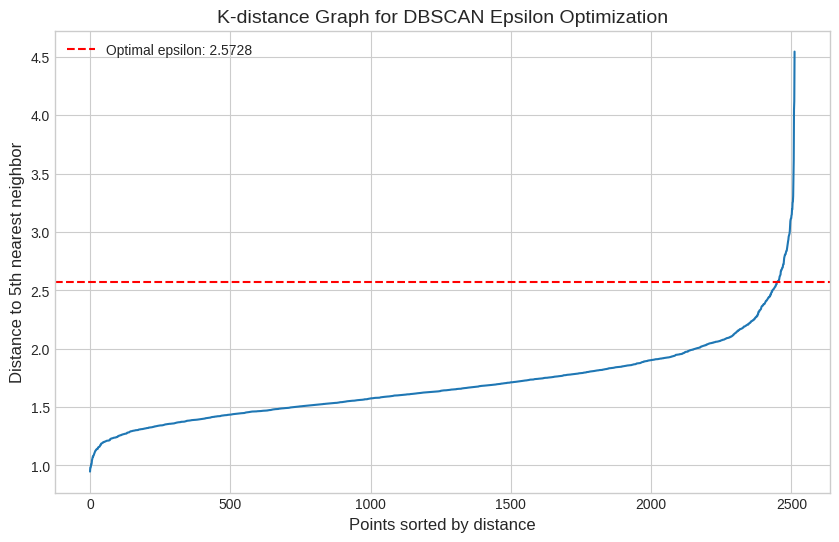

Optimal epsilon for DBSCAN Without Feature Selection: 2.5728


In [464]:
# Get optimal epsilon for DBSCAN
epsilon = optimize_dbscan_epsilon(features_no_fs)
print(f"Optimal epsilon for DBSCAN Without Feature Selection: {epsilon:.4f}")

💡 **Hasil Awal:**  
Epsilon optimal yang ditemukan adalah **2.5728**, dan model DBSCAN siap digunakan untuk mengelompokkan data! 🚀📊  

Selanjutnya mari terapkan DBSCAN dengan epsilon yang sudah dioptimalkan  dan kita hitung jumlah clusternya.

In [465]:
# Run DBSCAN with optimized epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_no_fs)

In [466]:
# Count number of clusters (excluding noise points labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels[dbscan_labels != -1]))
n_noise = list(dbscan_labels).count(-1)

### 🌐 **Hierarchical DBSCAN (HDBSCAN)**  

Setelah menggunakan **DBSCAN**, kini kita beralih ke **HDBSCAN**, versi lebih adaptif yang secara otomatis menentukan **epsilon** dan dapat menangani **density variation** dalam data.  

🔍 **Apa yang dilakukan?**  
1️⃣ **Menjalankan HDBSCAN** dengan parameter:  
   - `min_cluster_size = 15` → Minimal ukuran cluster  
   - `min_samples = 5` → Ambang batas core points  
   - `cluster_selection_epsilon = 0.1` → Kontrol sensitivitas pemisahan cluster  
2️⃣ **Memproses clustering** pada dataset untuk menemukan kelompok data yang alami.  
3️⃣ **Menghitung jumlah cluster** yang terbentuk (tanpa mempertimbangkan noise).  
4️⃣ **Menghitung jumlah noise** (titik yang tidak masuk dalam cluster).  🚀  

In [467]:
# HDBSCAN (Hierarchical DBSCAN)
# More adaptive than standard DBSCAN and automatically selects epsilon
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5, 
                               cluster_selection_epsilon=0.1)
hdbscan_labels = hdbscan_model.fit_predict(features_no_fs)

# Count number of clusters (excluding noise points labeled as -1)
n_clusters_hdbscan = len(set(hdbscan_labels[hdbscan_labels != -1]))
n_noise_hdbscan = list(hdbscan_labels).count(-1)

### 🏗️ **Agglomerative Clustering**  

Kali ini, kita mengeksplorasi **Agglomerative Clustering**, salah satu metode **Hierarchical Clustering** yang membangun cluster secara bertahap, dari bawah ke atas.  

🔍 **Apa yang dilakukan?**  
1️⃣ Mencoba **berbagai metode linkage** (`ward`, `complete`, `average`).  
2️⃣ Menguji **berbagai jumlah cluster** (`2, 3, 4, 5`).  
3️⃣ Menghitung **Silhouette Score** untuk setiap kombinasi.  
4️⃣ Menyimpan kombinasi terbaik berdasarkan skor tertinggi!  

🛠️ **Metode Linkage yang Dicoba:**  
- **Ward** → Meminimalkan variansi dalam cluster.  
- **Complete** → Jarak maksimum antar titik di cluster.  
- **Average** → Rata-rata jarak antar titik di cluster.  

🏆 **Tujuan Akhir:**  
Menemukan **kombinasi terbaik** dari metode linkage dan jumlah cluster yang menghasilkan **Silhouette Score tertinggi**, sehingga mendapatkan hasil clustering yang optimal! 🚀  

In [468]:
# Agglomerative Clustering with varying linkage methods
linkages = ['ward', 'complete', 'average']
n_clusters_range = [2, 3, 4, 5]
best_agglo_score_no_fs = 0
best_agglo_params_no_fs = {}

for linkage in linkages:
    for n_clusters in n_clusters_range:
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agglo.fit_predict(features_no_fs)
        
        # FIXED: Removed sample_weight parameter
        score = silhouette_score(features_no_fs, labels)
        
        if score > best_agglo_score_no_fs:
            best_agglo_score_no_fs = score
            best_agglo_params_no_fs = {'linkage': linkage, 'n_clusters': n_clusters}

### 🔥 **Weighted K-Means**  

Pada kode ini, kita menggunakan **Weighted K-Means**, sebuah variasi dari K-Means yang mempertimbangkan **bobot pada data**. Ini berguna ketika kita ingin memperhitungkan tingkat kepentingan atau frekuensi dari setiap sampel.  

✨ **Bagaimana Cara Kerjanya?**  
1️⃣ **Inisialisasi** model `WeightedKMeans` dengan parameter jumlah cluster, iterasi maksimum, dan random state.  
2️⃣ **Jika bobot diberikan**, maka:  
   - Fitur dikalikan dengan akar kuadrat dari bobotnya.  
   - Data yang sudah diberi bobot diklusterkan menggunakan K-Means.  
3️⃣ **Jika tanpa bobot**, langsung gunakan K-Means biasa.  
4️⃣ **Evaluasi hasil clustering** menggunakan **Silhouette Score** untuk berbagai jumlah cluster (`2-10`).  

Dengan pendekatan ini, kita bisa mendapatkan **clustering yang lebih bermakna** dengan mempertimbangkan bobot setiap sampel! 🔥🚀

In [469]:
# Modified Weighted K-Means
# I'll still use weights for clustering but not for evaluation
class WeightedKMeans:
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def fit(self, X, sample_weight=None):
        # Initialize KMeans
        self.kmeans_ = KMeans(
            n_clusters=self.n_clusters, 
            max_iter=self.max_iter,
            random_state=self.random_state,
            n_init=10
        )
        
        # If weights are provided, I'll preprocess the data
        if sample_weight is not None:
            # Scale features based on weights
            # Multiply each sample by its square root weight
            # This is a common approach to incorporate weights
            scaled_X = X * np.sqrt(sample_weight)[:, np.newaxis]
            
            # Fit using the weighted samples
            self.kmeans_.fit(scaled_X)
        else:
            # Standard KMeans
            self.kmeans_.fit(X)
            
        # Store cluster centers and labels
        self.cluster_centers_ = self.kmeans_.cluster_centers_
        self.labels_ = self.kmeans_.predict(X)
        
        return self
    
    def predict(self, X):
        return self.kmeans_.predict(X)

In [470]:
# Try Weighted K-Means with various cluster counts
weighted_kmeans_scores = []
for n_clusters in range(2, 11):
    weighted_kmeans = WeightedKMeans(n_clusters=n_clusters, random_state=42)
    weighted_kmeans.fit(features_no_fs, sample_weight=weights)
    
    # FIXED: Removed sample_weight parameter for evaluation
    score = silhouette_score(features_no_fs, weighted_kmeans.labels_)
    weighted_kmeans_scores.append((n_clusters, score))
    
    print(f"Weighted K-Means Without Feature Selection with {n_clusters} clusters: Silhouette Score = {score:.4f}")

Weighted K-Means Without Feature Selection with 2 clusters: Silhouette Score = 0.1631
Weighted K-Means Without Feature Selection with 3 clusters: Silhouette Score = 0.0995
Weighted K-Means Without Feature Selection with 4 clusters: Silhouette Score = 0.1028
Weighted K-Means Without Feature Selection with 5 clusters: Silhouette Score = 0.0932
Weighted K-Means Without Feature Selection with 6 clusters: Silhouette Score = 0.0907
Weighted K-Means Without Feature Selection with 7 clusters: Silhouette Score = 0.0988
Weighted K-Means Without Feature Selection with 8 clusters: Silhouette Score = 0.0980
Weighted K-Means Without Feature Selection with 9 clusters: Silhouette Score = 0.0844
Weighted K-Means Without Feature Selection with 10 clusters: Silhouette Score = 0.0879


### 🧬 **Spectral Clustering**  

Kode ini menggunakan **Spectral Clustering**, teknik clustering yang **cocok untuk data dengan bentuk cluster yang tidak bulat** atau kompleks.  

✨ **Bagaimana Cara Kerjanya?**  
1️⃣ **Menentukan jumlah cluster (`n_clusters`)** dari 2 hingga 5 (dibatasi karena computational complexity).  
2️⃣ **Menerapkan Spectral Clustering** dengan parameter:
   - `assign_labels='kmeans'`: Setelah embedding spektral, K-Means digunakan untuk clustering.  
   - `random_state=42`: Untuk hasil yang konsisten.  
3️⃣ **Menghitung Silhouette Score** untuk mengevaluasi kualitas cluster.  
4️⃣ **Menampilkan hasil** untuk tiap jumlah cluster yang diuji.  

Spectral Clustering bisa jadi **solusi yang lebih baik untuk data dengan struktur kompleks** dibanding K-Means standar! 🚀🔥

In [471]:
# Spectral Clustering
# Can handle complex, non-spherical clusters
spectral_scores = []
for n_clusters in range(2, 6):  # Limit range due to computational complexity
    spectral = SpectralClustering(
        n_clusters=n_clusters, 
        random_state=42,
        assign_labels='kmeans'
    )
    spectral_labels = spectral.fit_predict(features_no_fs)
    
    # FIXED: Removed sample_weight parameter
    score = silhouette_score(features_no_fs, spectral_labels)
    spectral_scores.append((n_clusters, score))
    
    print(f"Spectral Clustering Without Feature Selection with {n_clusters} clusters: Silhouette Score = {score:.4f}")

Spectral Clustering Without Feature Selection with 2 clusters: Silhouette Score = 0.4832
Spectral Clustering Without Feature Selection with 3 clusters: Silhouette Score = 0.3315
Spectral Clustering Without Feature Selection with 4 clusters: Silhouette Score = 0.2284
Spectral Clustering Without Feature Selection with 5 clusters: Silhouette Score = 0.2814


## **📊 Evaluasi Model Clustering**

Pada tahap ini, kita akan melakukan **evaluasi performa model clustering** yang telah kita buat dan latih. ✨  

🔹 **Metrik evaluasi utama yang digunakan:**  
✅ **Silhouette Score** – Mengukur seberapa baik setiap titik data berada dalam cluster yang tepat.  

💡 **Apa yang akan kita lakukan?**  
📌 Mengevaluasi berbagai algoritma clustering dengan parameter yang berbeda.  
📌 Menganalisis hasil dan menentukan model terbaik berdasarkan skor evaluasi.  

🔥 **Tujuan Akhir:**  
Menemukan **model clustering paling optimal** untuk dataset kita! 🚀  

### 📊 **Evaluasi Model Clustering (DBSCAN)**

✅ **Hasil:** DBSCAN menemukan **1 cluster** dengan **27 noise points** 🌀, mencakup **1.07% dari data**.  
❌ **Masalah:** Tidak bisa menghitung **silhouette score** karena hanya ada satu cluster valid dan terlalu banyak noise 😕.  

In [472]:
print(f"DBSCAN found {n_clusters_dbscan} clusters with {n_noise} noise points " 
      f"({n_noise/len(dbscan_labels)*100:.2f}% of data)")

# Calculate silhouette score if more than one cluster and not all points are noise
if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels):
    # Only consider non-noise points for silhouette score
    non_noise_mask = dbscan_labels != -1
    dbscan_silhouette_no_fs = silhouette_score(
        features_no_fs[non_noise_mask], dbscan_labels[non_noise_mask]
    )
    print(f"DBSCAN Without Feature Selection Silhouette Score (excluding noise): {dbscan_silhouette_no_fs:.4f}")
else:
    dbscan_silhouette_no_fs = 0
    print("DBSCAN Without Feature Selection couldn't calculate silhouette score: insufficient clusters or too many noise points")

DBSCAN found 1 clusters with 27 noise points (1.07% of data)
DBSCAN Without Feature Selection couldn't calculate silhouette score: insufficient clusters or too many noise points


### 📊 **Evaluasi Model Clustering (HDBSCAN)**  

✅ **Hasil:** HDBSCAN berhasil menemukan **2 cluster** dengan **129 noise points** 🎯, mencakup **5.14% dari data**.  
📈 **Silhouette Score (tanpa noise):** **0.3310** 🏆 (cukup rendah, indikasi cluster mungkin tumpang tindih).  

In [473]:
print(f"\nHDBSCAN found {n_clusters_hdbscan} clusters with {n_noise_hdbscan} noise points " 
      f"({n_noise_hdbscan/len(hdbscan_labels)*100:.2f}% of data)")

# Calculate silhouette score if more than one cluster and not all points are noise
if n_clusters_hdbscan > 1 and n_noise_hdbscan < len(hdbscan_labels):
    # Only consider non-noise points for silhouette score
    non_noise_mask = hdbscan_labels != -1
    hdbscan_silhouette_no_fs = silhouette_score(
        features_no_fs[non_noise_mask], hdbscan_labels[non_noise_mask]
    )
    print(f"HDBSCAN Without Feature Selection Silhouette Score (excluding noise): {hdbscan_silhouette_no_fs:.4f}")
else:
    hdbscan_silhouette_no_fs = 0
    print("HDBSCAN Without Feature Selection couldn't calculate silhouette score: insufficient clusters or too many noise points")


HDBSCAN found 2 clusters with 129 noise points (5.14% of data)
HDBSCAN Without Feature Selection Silhouette Score (excluding noise): 0.3310


### 📊 **Evaluasi Model Clustering (Agglomerative)**  

✅ **Hasil:** Model terbaik menggunakan **linkage: average** dengan **2 cluster** 🎯.  
📈 **Silhouette Score (tanpa feature selection):** **0.4832** 🏆 (lebih baik dibanding HDBSCAN).  

In [474]:
# Get best agglomerative clustering parameters and score
print(f"\nBest Agglomerative Clustering Without Feature Selection: {best_agglo_params_no_fs}")
print(f"Silhouette Score Without Feature Selection: {best_agglo_score_no_fs:.4f}")


Best Agglomerative Clustering Without Feature Selection: {'linkage': 'average', 'n_clusters': 2}
Silhouette Score Without Feature Selection: 0.4832


### 📊 **Evaluasi Model Clustering (Weighted K-Means)**  

✅ **Hasil:** Model terbaik menggunakan **2 cluster** 🎯.  
📈 **Silhouette Score (tanpa feature selection):** **0.1631** ⚠️ (cukup rendah, indikasi cluster kurang terpisah dengan baik).

In [475]:
# Get best weighted K-Means result
best_weighted_kmeans_no_fs = max(weighted_kmeans_scores, key=lambda x: x[1])
print(f"\nBest Weighted K-Means Without Feature Selection: {best_weighted_kmeans_no_fs[0]} clusters")
print(f"Silhouette Score Without Feature Selection: {best_weighted_kmeans_no_fs[1]:.4f}")


Best Weighted K-Means Without Feature Selection: 2 clusters
Silhouette Score Without Feature Selection: 0.1631


### 📊 **Evaluasi Model Clustering (Spectral Clustering)**  

✅ **Hasil:** Model terbaik menggunakan **2 cluster** 🎯.  
📈 **Silhouette Score:** **0.4832** 🚀 (cukup baik, indikasi pemisahan cluster yang jelas).

In [476]:
# Get best spectral clustering result
best_spectral_no_fs = max(spectral_scores, key=lambda x: x[1])
print(f"\nBest Spectral Clustering Without Feature Selection: {best_spectral_no_fs[0]} clusters")
print(f"Silhouette Score: {best_spectral_no_fs[1]:.4f}")


Best Spectral Clustering Without Feature Selection: 2 clusters
Silhouette Score: 0.4832


## ✨ **Feature Selection**  

Untuk meningkatkan **optimasi model clustering**, saya akan menerapkan **feature selection** 🔍.  

📌 **Langkah-langkah:**  
1️⃣ **Melakukan feature selection** untuk memilih fitur yang paling relevan.  
2️⃣ **Membangun ulang model clustering** dengan fitur terpilih.  
3️⃣ **Membandingkan performa model** sebelum dan sesudah feature selection untuk melihat peningkatan yang terjadi.  

🚀 **Tujuan:** Meningkatkan kualitas pemisahan cluster dan mengurangi dimensi data tanpa kehilangan informasi penting.

### 🔍 **Feature Selection dengan Random Forest**  

Untuk mengidentifikasi fitur yang paling penting, saya menggunakan **Random Forest** dengan langkah berikut:  

📌 **Proses:**  
1️⃣ **Membuat label sintetis** menggunakan **K-Means (2 cluster)** 🏷️.  
2️⃣ **Melatih Random Forest** untuk mengevaluasi kontribusi setiap fitur 🌳.  
3️⃣ **Menggunakan sample weight** agar model lebih akurat dalam menangkap pola distribusi data ⚖️.  

🚀 **Tujuan:** Memilih fitur yang paling berpengaruh untuk meningkatkan kualitas clustering!

In [477]:
# Use Random Forest to identify most important features
# I'll create a synthetic target by using K-means with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
synthetic_labels = kmeans.fit_predict(df_clean.drop(columns=['sample_weight']))

In [478]:
# Assess feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_clean.drop(columns=['sample_weight']), synthetic_labels, 
       sample_weight=df_clean['sample_weight'])

RandomForestClassifier(random_state=42)


Top 15 most important features:


,Feature,Importance
19,Amount_Percentile,0.37
0,TransactionAmount,0.31
20,Amount_Ratio_To_Avg,0.29
25,Potential_Fraud_Score,0.01
5,AccountBalance,0.00
6,TimeSincePreviousTransaction,0.00
2,CustomerAge,0.00
3,TransactionDuration,0.00
18,Daily_Transaction_Count,0.00
4,LoginAttempts,0.00


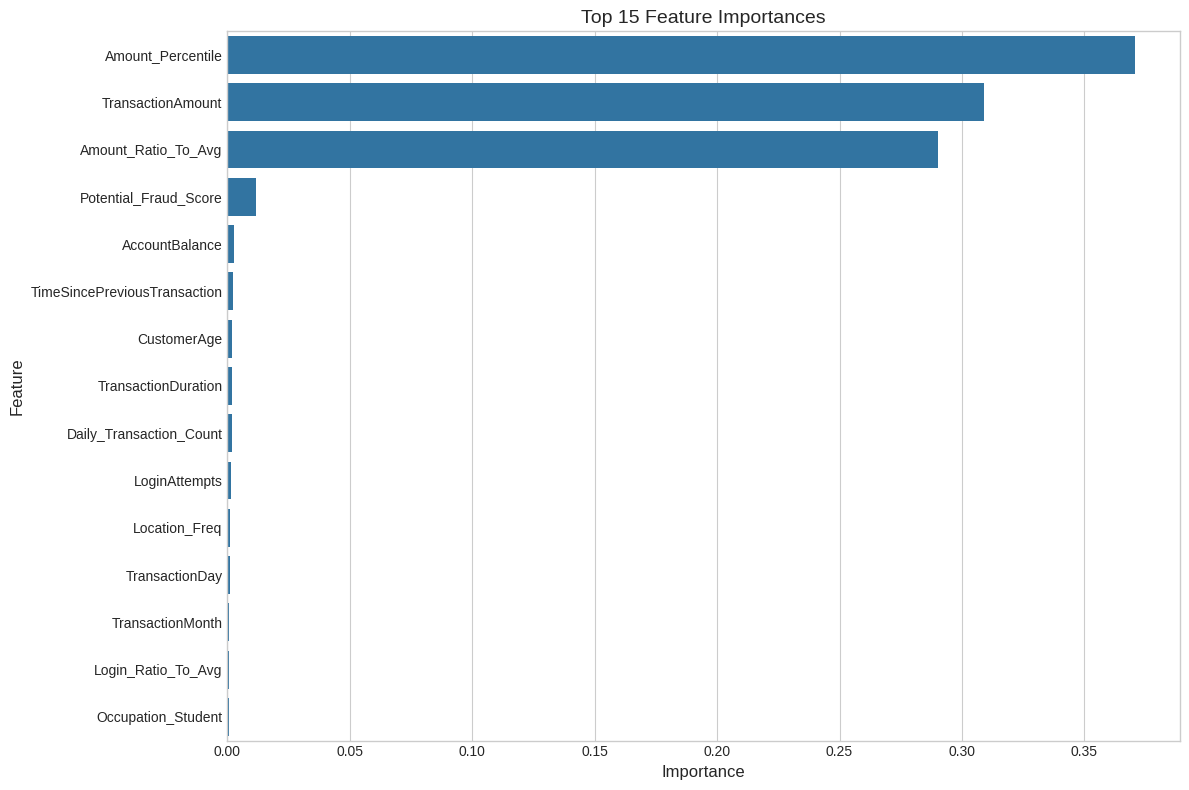

In [479]:
# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': df_clean.drop(columns=['sample_weight']).columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display top 15 features
print("\nTop 15 most important features:")
display(feature_importances.head(15))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [480]:
# Select features with importance above a threshold
base_top_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()

In [481]:
# Make sure domain-important features are still present
domain_important_features = ['Is_Late_Night', 'LoginAttempts', 'Is_Weekend']
missing_important = [f for f in domain_important_features if f not in base_top_features]

In [482]:
# Combine both sets of features
top_features = base_top_features + missing_important
print(f"\nSelected {len(top_features)} features including domain-specific features")
print(top_features)


Selected 7 features including domain-specific features
['Amount_Percentile', 'TransactionAmount', 'Amount_Ratio_To_Avg', 'Potential_Fraud_Score', 'Is_Late_Night', 'LoginAttempts', 'Is_Weekend']


In [483]:
# Create final dataset with top features and sample weights
df_final = df_clean[top_features + ['sample_weight']]
print(f"\nFinal dataset shape: {df_final.shape}")


Final dataset shape: (2512, 8)


In [484]:
# Save the final dataset
df_final.to_csv('data/processed/after-feature-selection.csv', index=False)

In [485]:
# Load the advanced preprocessed data
df = pd.read_csv('data/processed/after-feature-selection.csv')

# Extract features and weights
features_with_fs = df.drop(columns=['sample_weight']).values if 'sample_weight' in df.columns else df.values
# Extract weights if they exist
weights = df['sample_weight'].values if 'sample_weight' in df.columns else np.ones(len(features_with_fs))

print(f"Dataset shape for clustering with feature selection: {features_with_fs.shape}")

Dataset shape for clustering with feature selection: (2512, 7)


### 🔄 **Melatih Ulang Model dengan Fitur Terpilih**  

Setelah melakukan **feature selection**, saya melatih kembali beberapa model clustering untuk mengevaluasi peningkatan performa:  

📌 **Model yang digunakan:**  
✅ **DBSCAN** – Clustering berbasis kepadatan 🔍  
✅ **HDBSCAN** – Versi lebih fleksibel dari DBSCAN 🏷️  
✅ **Agglomerative Clustering** – Pendekatan hierarkis 🔗  
✅ **Weighted K-Means** – K-Means dengan bobot untuk setiap data ⚖️  
✅ **Spectral Clustering** – Menggunakan pendekatan graf 🎭  

🚀 **Tujuan:** Membandingkan hasil sebelum dan sesudah feature selection untuk mendapatkan model clustering terbaik!

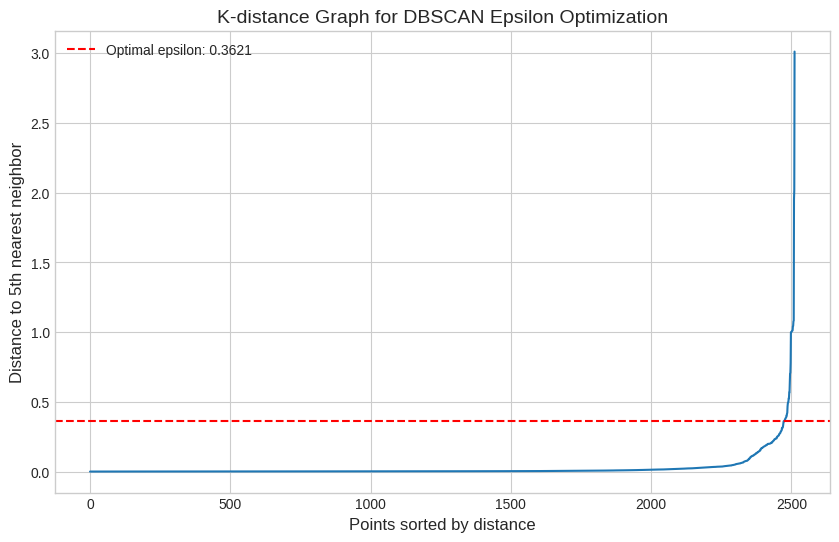

Optimal epsilon for DBSCAN with feature selection: 0.3621


In [486]:
# Get optimal epsilon for DBSCAN
epsilon = optimize_dbscan_epsilon(features_with_fs)
print(f"Optimal epsilon for DBSCAN with feature selection: {epsilon:.4f}")

In [487]:
# Run DBSCAN with optimized epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_with_fs)

In [488]:
# Count number of clusters (excluding noise points labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels[dbscan_labels != -1]))
n_noise = list(dbscan_labels).count(-1)

In [489]:
print(f"DBSCAN with feature selection found {n_clusters_dbscan} clusters with {n_noise} noise points " 
      f"({n_noise/len(dbscan_labels)*100:.2f}% of data)")

# Calculate silhouette score if more than one cluster and not all points are noise
if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels):
    # Only consider non-noise points for silhouette score
    non_noise_mask = dbscan_labels != -1
    dbscan_silhouette_with_fs = silhouette_score(
        features_with_fs[non_noise_mask], dbscan_labels[non_noise_mask]
    )
    print(f"DBSCAN with feature selection Silhouette Score (excluding noise): {dbscan_silhouette_with_fs:.4f}")
else:
    dbscan_silhouette_with_fs = 0
    print("DBSCAN with feature selection couldn't calculate silhouette score: insufficient clusters or too many noise points")

DBSCAN with feature selection found 8 clusters with 30 noise points (1.19% of data)
DBSCAN with feature selection Silhouette Score (excluding noise): 0.1447


In [490]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5, 
                               cluster_selection_epsilon=0.1)
hdbscan_labels = hdbscan_model.fit_predict(features_with_fs)

# Count number of clusters (excluding noise points labeled as -1)
n_clusters_hdbscan = len(set(hdbscan_labels[hdbscan_labels != -1]))
n_noise_hdbscan = list(hdbscan_labels).count(-1)

print(f"\nHDBSCAN found {n_clusters_hdbscan} clusters with {n_noise_hdbscan} noise points " 
      f"({n_noise_hdbscan/len(hdbscan_labels)*100:.2f}% of data)")

# Calculate silhouette score if more than one cluster and not all points are noise
if n_clusters_hdbscan > 1 and n_noise_hdbscan < len(hdbscan_labels):
    # Only consider non-noise points for silhouette score
    non_noise_mask = hdbscan_labels != -1
    hdbscan_silhouette_with_fs = silhouette_score(
        features_with_fs[non_noise_mask], hdbscan_labels[non_noise_mask]
    )
    print(f"HDBSCAN with feature selection Silhouette Score (excluding noise): {hdbscan_silhouette_with_fs:.4f}")
else:
    hdbscan_silhouette_with_fs = 0
    print("HDBSCAN with feature selection couldn't calculate silhouette score: insufficient clusters or too many noise points")


HDBSCAN found 9 clusters with 42 noise points (1.67% of data)
HDBSCAN with feature selection Silhouette Score (excluding noise): -0.1270


In [491]:
# Agglomerative Clustering with varying linkage methods
linkages = ['ward', 'complete', 'average']
n_clusters_range = [2, 3, 4, 5]
best_agglo_score_with_fs = 0
best_agglo_params_with_fs = {}

for linkage in linkages:
    for n_clusters in n_clusters_range:
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agglo.fit_predict(features_with_fs)
        
        score = silhouette_score(features_with_fs, labels)
        
        if score > best_agglo_score_with_fs:
            best_agglo_score_with_fs = score
            best_agglo_params_with_fs = {'linkage': linkage, 'n_clusters': n_clusters}

print(f"\nBest Agglomerative Clustering with feature selection: {best_agglo_params_with_fs}")
print(f"Silhouette Score: {best_agglo_score_with_fs:.4f}")


Best Agglomerative Clustering with feature selection: {'linkage': 'average', 'n_clusters': 2}
Silhouette Score: 0.7103


In [492]:
# Modified Weighted K-Means
# I'll still use weights for clustering but not for evaluation
class WeightedKMeans:
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def fit(self, X, sample_weight=None):
        # Initialize KMeans
        self.kmeans_ = KMeans(
            n_clusters=self.n_clusters, 
            max_iter=self.max_iter,
            random_state=self.random_state,
            n_init=10
        )
        
        # If weights are provided, I'll preprocess the data
        if sample_weight is not None:
            # Scale features based on weights
            # Multiply each sample by its square root weight
            # This is a common approach to incorporate weights
            scaled_X = X * np.sqrt(sample_weight)[:, np.newaxis]
            
            # Fit using the weighted samples
            self.kmeans_.fit(scaled_X)
        else:
            # Standard KMeans
            self.kmeans_.fit(X)
            
        # Store cluster centers and labels
        self.cluster_centers_ = self.kmeans_.cluster_centers_
        self.labels_ = self.kmeans_.predict(X)
        
        return self
    
    def predict(self, X):
        return self.kmeans_.predict(X)

In [493]:
# Try Weighted K-Means with various cluster counts
weighted_kmeans_scores = []
for n_clusters in range(2, 11):
    weighted_kmeans = WeightedKMeans(n_clusters=n_clusters, random_state=42)
    weighted_kmeans.fit(features_with_fs, sample_weight=weights)
    
    score = silhouette_score(features_with_fs, weighted_kmeans.labels_)
    weighted_kmeans_scores.append((n_clusters, score))
    
    print(f"Weighted K-Means with feature selection with {n_clusters} clusters: Silhouette Score = {score:.4f}")

# Get best weighted K-Means result
best_weighted_kmeans_with_fs = max(weighted_kmeans_scores, key=lambda x: x[1])
print(f"\nBest Weighted K-Means with feature selection: {best_weighted_kmeans_with_fs[0]} clusters")
print(f"Silhouette Score: {best_weighted_kmeans_with_fs[1]:.4f}")

Weighted K-Means with feature selection with 2 clusters: Silhouette Score = 0.5591
Weighted K-Means with feature selection with 3 clusters: Silhouette Score = 0.5058
Weighted K-Means with feature selection with 4 clusters: Silhouette Score = 0.4690
Weighted K-Means with feature selection with 5 clusters: Silhouette Score = 0.5300
Weighted K-Means with feature selection with 6 clusters: Silhouette Score = 0.5312
Weighted K-Means with feature selection with 7 clusters: Silhouette Score = 0.5150
Weighted K-Means with feature selection with 8 clusters: Silhouette Score = 0.5002
Weighted K-Means with feature selection with 9 clusters: Silhouette Score = 0.5019
Weighted K-Means with feature selection with 10 clusters: Silhouette Score = 0.4956

Best Weighted K-Means with feature selection: 2 clusters
Silhouette Score: 0.5591


In [494]:
# Spectral Clustering
# Can handle complex, non-spherical clusters
try:
    spectral_scores = []
    for n_clusters in range(2, 6):  # Limit range due to computational complexity
        spectral = SpectralClustering(
            n_clusters=n_clusters, 
            random_state=42,
            assign_labels='kmeans'
        )
        spectral_labels = spectral.fit_predict(features_with_fs)
        
        score = silhouette_score(features_with_fs, spectral_labels)
        spectral_scores.append((n_clusters, score))
        
        print(f"Spectral Clustering with feature selection with {n_clusters} clusters: Silhouette Score = {score:.4f}")

    # Get best spectral clustering result
    best_spectral_with_fs = max(spectral_scores, key=lambda x: x[1])
    print(f"\nBest Spectral Clustering with feature selection: {best_spectral_with_fs[0]} clusters")
    print(f"Silhouette Score: {best_spectral_with_fs[1]:.4f}")
except Exception as e:
    print(f"\nSpectral Clustering with feature selection encountered an error: {e}")
    print("This can happen with large datasets or high-dimensional data")

Spectral Clustering with feature selection with 2 clusters: Silhouette Score = 0.7004
Spectral Clustering with feature selection with 3 clusters: Silhouette Score = 0.5992
Spectral Clustering with feature selection with 4 clusters: Silhouette Score = 0.5944
Spectral Clustering with feature selection with 5 clusters: Silhouette Score = 0.5774

Best Spectral Clustering with feature selection: 2 clusters
Silhouette Score: 0.7004


### 📊 **Perbandingan Hasil Evaluasi Model Sebelum dan Sesudah Feature Selection**  

Setelah menerapkan **feature selection**, saya membandingkan performa model clustering untuk melihat dampaknya terhadap kualitas klaster yang terbentuk.  

📌 **Analisis Perbandingan:**  
✅ **Silhouette Score** – Mengukur seberapa baik klaster terbentuk sebelum dan sesudah seleksi fitur.  
✅ **Jumlah Klaster** – Apakah terjadi perubahan dalam jumlah klaster yang ditemukan?  

🎯 **Kesimpulan:**  
Dengan feature selection, model diharapkan lebih efisien dan akurat dalam membentuk klaster, mengurangi noise, serta meningkatkan interpretabilitas hasil clustering. 🚀


===== Clustering Without Feature Selection Performance Summary =====
DBSCAN: 0.0000
HDBSCAN: 0.3310
Agglomerative: 0.4832
Weighted K-Means: 0.1631
Spectral: 0.4832

Best clustering method without feature selection: Agglomerative with silhouette score 0.4832
❌ Target score of 0.7 not reached. Best score: 0.4832


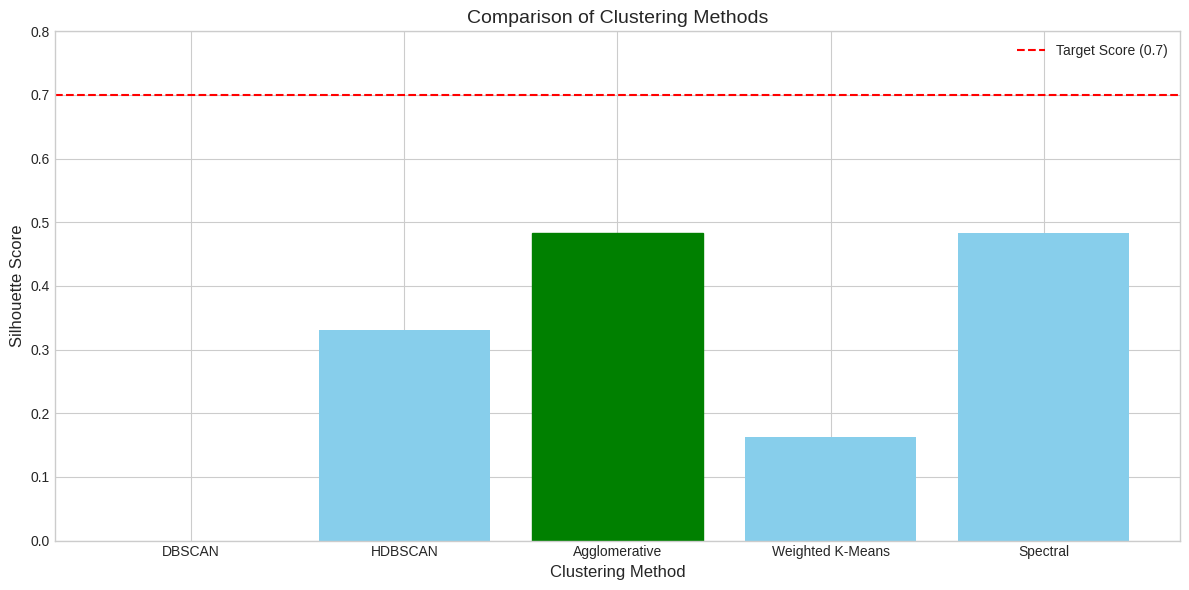

In [495]:
# Summarize all results
print("\n===== Clustering Without Feature Selection Performance Summary =====")
all_results = [
    ("DBSCAN", dbscan_silhouette_no_fs),
    ("HDBSCAN", hdbscan_silhouette_no_fs),
    ("Agglomerative", best_agglo_score_no_fs),
    ("Weighted K-Means", best_weighted_kmeans_no_fs[1])
]
if 'best_spectral_no_fs' in locals():
    all_results.append(("Spectral", best_spectral_no_fs[1]))

for method, score in all_results:
    print(f"{method}: {score:.4f}")

# Find the best method
best_method, best_score = max(all_results, key=lambda x: x[1])
print(f"\nBest clustering method without feature selection: {best_method} with silhouette score {best_score:.4f}")

if best_score >= 0.7:
    print(f"✅ Success! We've achieved the target silhouette score of 0.7 or higher.")
else:
    print(f"❌ Target score of 0.7 not reached. Best score: {best_score:.4f}")
    
# Plot silhouette scores comparison
plt.figure(figsize=(12, 6))
methods = [method for method, _ in all_results]
scores = [score for _, score in all_results]

bars = plt.bar(methods, scores, color='skyblue')
plt.axhline(y=0.7, color='r', linestyle='--', label='Target Score (0.7)')

# Highlight the best method
best_index = methods.index(best_method)
bars[best_index].set_color('green')

plt.ylim(0, max(0.8, max(scores) + 0.05))
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Methods')
plt.legend()
plt.tight_layout()
plt.show()


===== Clustering With Feature Selection Performance Summary =====
DBSCAN: 0.1447
HDBSCAN: -0.1270
Agglomerative: 0.7103
Weighted K-Means: 0.5591
Spectral: 0.7004

Best clustering With Feature Selection method: Agglomerative with silhouette score 0.7103
✅ Success! We've achieved the target silhouette score of 0.7 or higher.


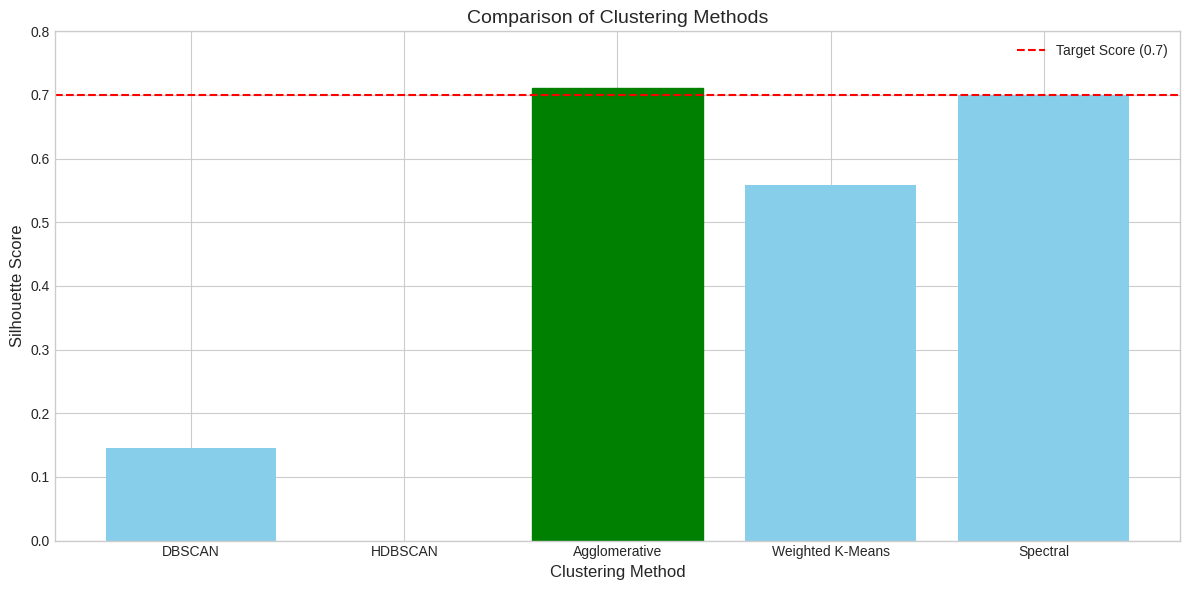

In [496]:
# Summarize all results
print("\n===== Clustering With Feature Selection Performance Summary =====")
all_results = [
    ("DBSCAN", dbscan_silhouette_with_fs),
    ("HDBSCAN", hdbscan_silhouette_with_fs),
    ("Agglomerative", best_agglo_score_with_fs),
    ("Weighted K-Means", best_weighted_kmeans_with_fs[1])
]
if 'best_spectral_with_fs' in locals():
    all_results.append(("Spectral", best_spectral_with_fs[1]))

for method, score in all_results:
    print(f"{method}: {score:.4f}")

# Find the best method
best_method, best_score = max(all_results, key=lambda x: x[1])
print(f"\nBest clustering With Feature Selection method: {best_method} with silhouette score {best_score:.4f}")

if best_score >= 0.7:
    print(f"✅ Success! We've achieved the target silhouette score of 0.7 or higher.")
else:
    print(f"❌ Target score of 0.7 not reached. Best score: {best_score:.4f}")
    
# Plot silhouette scores comparison
plt.figure(figsize=(12, 6))
methods = [method for method, _ in all_results]
scores = [score for _, score in all_results]

bars = plt.bar(methods, scores, color='skyblue')
plt.axhline(y=0.7, color='r', linestyle='--', label='Target Score (0.7)')

# Highlight the best method
best_index = methods.index(best_method)
bars[best_index].set_color('green')

plt.ylim(0, max(0.8, max(scores) + 0.05))
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Methods')
plt.legend()
plt.tight_layout()
plt.show()

### **🏆 Bagaimana Feature Selection Sangat Mempengaruhi Clustering! 🚀**  

Bayangkan mencoba melihat pola dalam puzzle yang berantakan—itulah kondisi model sebelum feature selection! Data penuh dengan informasi yang belum tentu semuanya relevan, membuat algoritma kesulitan menemukan struktur yang jelas. Tapi setelah feature selection? Seperti membersihkan kaca jendela yang buram—tiba-tiba pola yang sebelumnya samar kini terlihat jelas!  

💡 **Apa yang Terjadi Sebelum Feature Selection?**  
- **Agglomerative Clustering** adalah model terbaik, tapi hanya mencapai **0.4832**—jauh dari target **0.7**.  
- Model lain seperti **DBSCAN (0.0000)** dan **Weighted K-Means (0.1631)** gagal mengelompokkan data dengan baik.  
- Hasilnya? Clustering masih jauh dari optimal—seperti mencoba memahami gambar yang buram.  

🔄 **Feature Selection: Menghapus Noise, Meningkatkan Fokus**  
Ketika hanya fitur-fitur penting yang dipertahankan, clustering berubah drastis! Hasilnya:  

✅ **Agglomerative Clustering melompat ke 0.7103**, melampaui target! 🎯  
📈 **Weighted K-Means juga meningkat hingga 0.5591**—tidak terbaik, tapi lebih baik dari sebelumnya.  
⚠️ **HDBSCAN malah memburuk ke -0.1270**—menandakan metode ini tidak cocok setelah seleksi fitur.  

🔥 **Kesimpulan: Agglomerative Clustering adalah Sang Juara!**  
Seperti seorang seniman yang hanya memilih warna terbaik untuk lukisannya, feature selection membantu algoritma fokus pada informasi yang benar-benar penting. Hasilnya? **Clustering yang jauh lebih akurat dan bermakna.** Jadi, model **Agglomerative Clustering dengan Feature Selection adalah pilihan terbaik!** 🏆✨  

## **🔍 Visualisasi Hasil Clustering**

Setelah menemukan jumlah cluster optimal, kini saatnya **menghidupkan data** melalui visualisasi! Dengan metode yang tepat, kita bisa melihat bagaimana data terkelompok secara nyata dan apakah model telah bekerja dengan baik.  

📊 **Pendekatan Visualisasi yang Digunakan:**  
✅ **PCA (Principal Component Analysis)** – Menyederhanakan dimensi data agar lebih mudah dianalisis.  
✅ **Dendrogram Hierarchical** – Mengungkap hubungan antar data dalam bentuk hierarki.  
✅ **3D Cluster dengan t-SNE** – Menyajikan distribusi data dalam ruang tiga dimensi dengan pemetaan yang lebih tajam.  

Dengan visualisasi ini, kita tidak hanya melihat angka—tetapi juga **memahami bagaimana data benar-benar terstruktur**. Apakah cluster yang terbentuk jelas? Apakah ada outlier? Mari kita jelajahi jawabannya! 🚀

In [497]:
best_model = AgglomerativeClustering(
    n_clusters=2,
    linkage='average'
)
labels = best_model.fit_predict(features_with_fs)

### **🔍 Visualisasi Clustering dengan PCA**  

Dalam upaya mendeteksi transaksi mencurigakan, kita telah menerapkan **Agglomerative Clustering** dengan **average linkage** untuk mengelompokkan data transaksi ke dalam dua cluster utama. Namun, angka dan model saja tidak cukup—visualisasi **membantu kita melihat bagaimana transaksi benar-benar terbagi!**  

#### **🖼️ Apa yang Dapat Kita Lihat dari Grafik Ini?**  
📌 **Reduksi Dimensi dengan PCA:**  
- Karena transaksi keuangan memiliki banyak fitur, kita mereduksi dimensinya menggunakan **PCA** agar dapat divisualisasikan dengan lebih jelas.  
- **Sumbu X** menunjukkan **Principal Component 1**, yang menjelaskan **50.56% variabilitas** dalam data.  
- **Sumbu Y** adalah **Principal Component 2**, yang mencakup **16.30% variabilitas tambahan**.  

📌 **Polarisasi Cluster: Transaksi Normal vs. Mencurigakan?**  
- Terlihat ada **dua kelompok transaksi yang cukup terpisah**, ditandai dengan warna berbeda.  
- **Cluster 0 (merah):** Mayoritas transaksi terpusat di bagian bawah grafik, menandakan bahwa sebagian besar transaksi memiliki pola yang seragam.  
- **Cluster 1 (ungu):** Sebagian kecil transaksi berada di area terpisah, yang bisa jadi merupakan transaksi **fraudulent (mencurigakan)** atau memiliki karakteristik yang berbeda dari mayoritas.  

📌 **Potensi Anomali yang Menarik!**  
- Transaksi yang terletak jauh dari mayoritas bisa menjadi **indikator aktivitas mencurigakan**.  
- Dengan visualisasi ini, kita bisa memahami bagaimana transaksi berkelompok dan mengidentifikasi pola aneh yang bisa menjadi **sinyal fraud** dalam sistem.  

💡 **Kesimpulan:**  
Dengan menerapkan clustering dan visualisasi PCA, kita bisa **mengungkap pola tersembunyi dalam transaksi perbankan**.

In [498]:
def plot_clusters_pca(features, labels, title="Cluster Visualization with PCA"):
    # Use PCA to reduce to 2 dimensions for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)
    
    # Result Plotting
    plt.figure(figsize=(10, 8))
    
    # Plot every cluster with a different color
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    for i, label in enumerate(unique_labels):
        cluster_points = reduced_features[labels == label]
        plt.scatter(
            cluster_points[:, 0], 
            cluster_points[:, 1], 
            s=50, 
            c=[colors[i]], 
            label=f'Cluster {label}'
        )
    
    plt.title(title, fontsize=16)
    plt.xlabel(f'Principal Component 1 (Variance: {pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
    plt.ylabel(f'Principal Component 2 (Variance: {pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Menampilkan visualisasi standar dengan PCA...


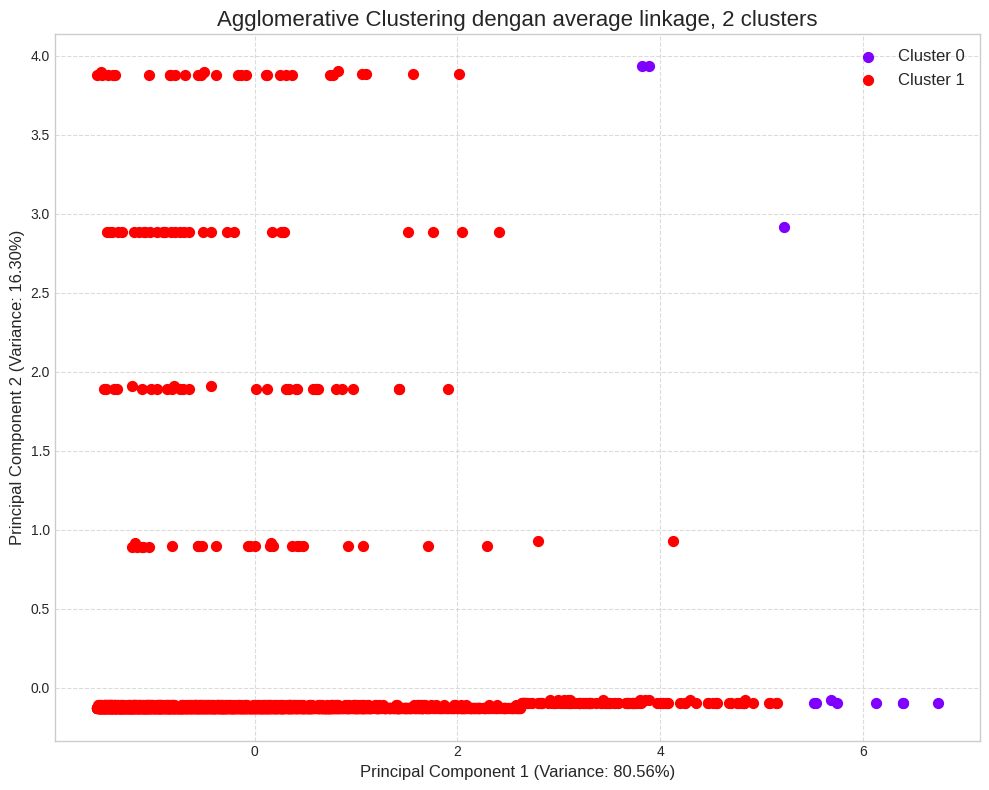

In [499]:
print("Menampilkan visualisasi standar dengan PCA...")
plot_clusters_pca(features_with_fs, labels, 
                 f"Agglomerative Clustering dengan {best_agglo_params_with_fs['linkage']} linkage, {best_agglo_params_with_fs['n_clusters']} clusters")

### **📊 Visualisasi Dendrogram**  

Dalam upaya mendeteksi pola transaksi mencurigakan, kita menggunakan **Agglomerative Clustering** dengan **average linkage**, lalu memvisualisasikan struktur hierarkinya melalui **dendrogram**.  

#### **🔍 Apa yang Ditunjukkan oleh Dendrogram Ini?**  
📌 **Struktur Hierarkis:**  
- Dendrogram ini menampilkan bagaimana **transaksi dikelompokkan secara bertahap** berdasarkan kemiripan.  
- Setiap **garis vertikal** merepresentasikan penggabungan dua cluster, dan **tingginya menunjukkan seberapa jauh perbedaan antara cluster yang digabungkan**.  
- **Semakin rendah penggabungan terjadi, semakin mirip data dalam cluster tersebut.**  

📌 **Identifikasi Jumlah Cluster Optimal:**  
- Kita menggunakan threshold pemotongan pada **T=4.7**, yang menghasilkan **dua cluster utama** (terlihat dari cabang besar di bagian atas).  
- Jika threshold ini diturunkan, lebih banyak cluster kecil akan muncul, memungkinkan analisis lebih rinci terhadap transaksi mencurigakan.  

📌 **Potensi Anomali dalam Transaksi?**  
- Beberapa transaksi tampak bergabung dengan **jarak yang lebih tinggi**, yang bisa menjadi indikasi adanya transaksi dengan pola yang **sangat berbeda dari mayoritas**.  
- Cluster ini mungkin **mewakili transaksi anomali atau mencurigakan** dalam dataset.  

#### **💡 Kesimpulan**  
Dendrogram memberikan wawasan tentang bagaimana transaksi **terstruktur dalam kelompok-kelompok** yang lebih kecil.  

In [500]:
def plot_dendrogram(features, model_linkage, title="Hierarchical Clustering Dendrogram"):
    # Calculate linkage matrix
    # Here I use the same linkage model as the best model.
    Z = hierarchy.linkage(features, model_linkage)
    
    # Plot dendrogram
    plt.figure(figsize=(12, 8))
    plt.title(title, fontsize=16)
    
    # Plot dendogram with truncated branches for better visualization
    dendrogram(
        Z,
        truncate_mode='lastp',  # Display only the last p merged clusters
        p=40,  # Show only the last 40 clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        color_threshold=0.7*max(Z[:,2])  # Different color for clusters
    )
    
    plt.xlabel('Sample index', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.tight_layout()
    plt.show()


Menampilkan dendrogram hierarchical clustering...


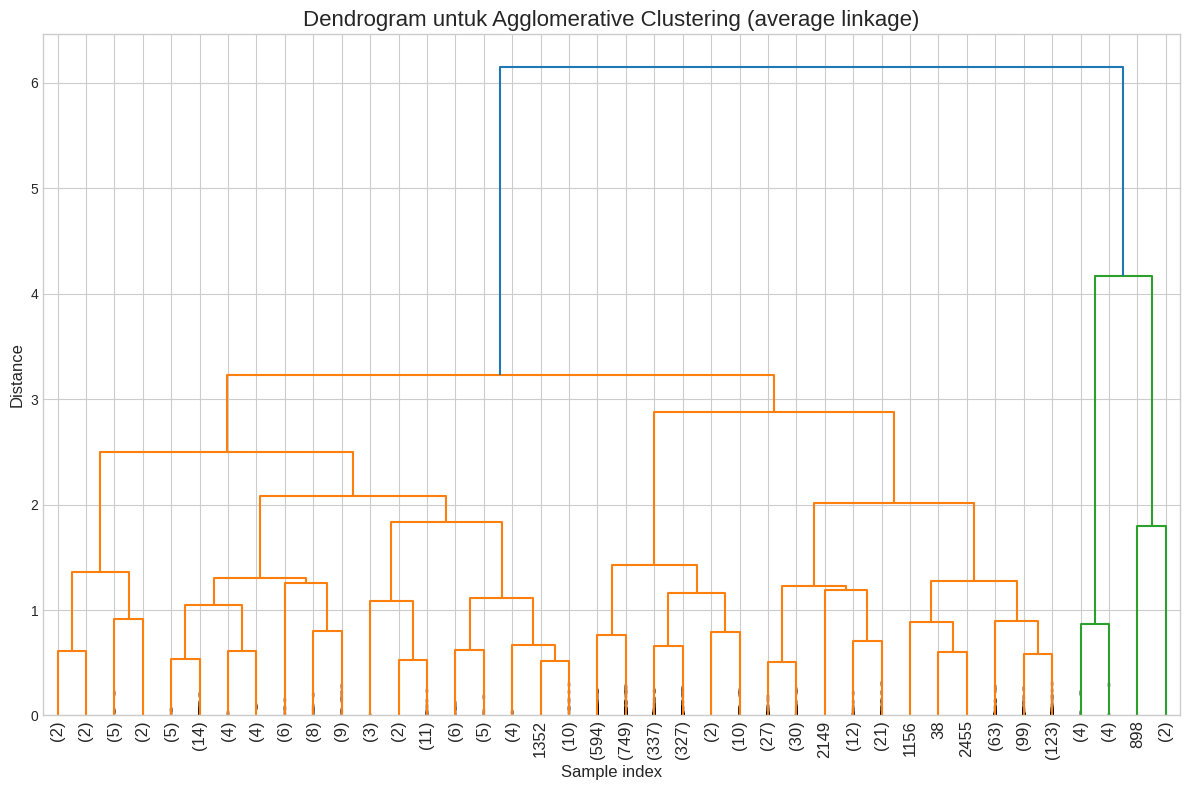

In [501]:
print("\nMenampilkan dendrogram hierarchical clustering...")
plot_dendrogram(features_with_fs, best_agglo_params_with_fs['linkage'], 
               f"Dendrogram untuk Agglomerative Clustering ({best_agglo_params_with_fs['linkage']} linkage)")

## **💌 Analisis dan Interpretasi Hasil Cluster**

Bagian ini akan membahas bagaimana data transaksi dikelompokkan berdasarkan karakteristiknya menggunakan metode clustering yang telah diterapkan.🔥🔥

### **✨ Menambahkan Label Cluster ke Data**  

Pada langkah ini, kita menyematkan hasil clustering ke dalam dataframe agar setiap data memiliki label clusternya sendiri 🔖.

In [502]:
# Adding cluster labels to dataset
df['Cluster'] = labels

### **🔄 Mengembalikan Data ke Skala Asli 📉**  

Setelah melakukan normalisasi atau standardisasi, kita perlu mengembalikan data ke skala aslinya agar lebih mudah diinterpretasikan 🧐. Proses ini melibatkan beberapa langkah:  

1️⃣ **Membaca Data Asli** 📂 – Kita memuat dataset sebelum dilakukan scaling untuk mendapatkan nilai awalnya.  
2️⃣ **Identifikasi Kolom yang Ditransformasi** 🔍 – Menentukan fitur numerik yang telah diubah selama proses normalisasi, sambil mengecualikan kolom yang tidak relevan seperti label cluster.  
3️⃣ **Inverse Transform** 🔄 – Menggunakan **RobustScaler** untuk mengembalikan setiap fitur yang telah dinormalisasi ke bentuk aslinya.  

Dengan langkah ini, kita bisa mendapatkan data yang lebih bermakna tanpa kehilangan informasi penting dari clustering! 🚀📊

In [503]:
# First we need to load the original dataset
df_original = pd.read_csv('data/processed/after-eda.csv')

In [504]:
# Getting scaled columns
numerical_cols = df_original.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'sample_weight' in numerical_cols:
    numerical_cols.remove('sample_weight')
scaled_features = [col for col in df.columns if col in numerical_cols and col != 'Cluster' and col != 'sample_weight']

In [505]:
# Doing inverse transform on scaled features
df_inverted = df.copy()
for col in scaled_features:
    if col in df.columns:
        # Making a scaler just for this column
        single_col_scaler = RobustScaler()
        # fit scaler only with this column from original data
        single_col_scaler.fit(df_original[[col]])
        
        # Reshape to the format needed by inverse_transform
        scaled_values = df[col].values.reshape(-1, 1)
        original_values = single_col_scaler.inverse_transform(scaled_values)
        df_inverted[col] = original_values.flatten()

### **🔍 Persiapan Analisis Karakteristik Cluster 🔍**  

Sebelum melakukan analisis lebih lanjut, kita perlu menentukan fitur-fitur yang akan digunakan untuk memahami karakteristik tiap cluster. Proses ini melibatkan:  

1️⃣ **Menentukan Fitur Numerik** 🧮 – Memeriksa apakah fitur penting seperti **TransactionAmount, AccountBalance, LoginAttempts** ada di dataset asli, lalu menambahkannya ke dalam daftar analisis.  
2️⃣ **Menentukan Fitur Kategorikal** 🎭 – Mengecek fitur seperti **TransactionType, Is_Late_Night, Is_Weekend**, lalu menambahkannya untuk memahami pola transaksi di berbagai kondisi.  

In [507]:
# Konversi fitur boolean ke tipe kategorikal/boolean
boolean_features = ['Is_Late_Night', 'Is_Weekend']
for feature in boolean_features:
    if feature in df_inverted.columns:
        df_inverted[feature] = df_inverted[feature].astype('bool')

# Identifikasi fitur-fitur yang ada di df_inverted
numerical_features = df_inverted.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Hapus 'Cluster' dari daftar fitur numerik jika ada
if 'Cluster' in numerical_features:
    numerical_features.remove('Cluster')
if 'sample_weight' in numerical_features:
    numerical_features.remove('sample_weight')

In [508]:
# Identifikasi fitur kategorikal di df_inverted
categorical_features = df_inverted.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

### 📊 **Analisis Statistik Numerik Berdasarkan Cluster**

📌 **Proses yang dilakukan:**
1. Data dikelompokkan berdasarkan **Cluster**.
2. Fitur numerik dianalisis menggunakan **count, mean, median, min, max,** dan **std**.
3. Hasilnya ditampilkan dalam bentuk tabel yang memberikan gambaran distribusi data dalam setiap cluster.

In [509]:
# Analisis statistik untuk fitur numerik menggunakan df_inverted
if numerical_features:
    cluster_stats_num = df_inverted.groupby('Cluster')[numerical_features].agg([
        'count', 'mean', 'median', 'min', 'max', 'std'
    ]).round(2)

    print("Statistik untuk fitur numerik berdasarkan cluster:")
    print(cluster_stats_num)

Statistik untuk fitur numerik berdasarkan cluster:
        Amount_Percentile                              TransactionAmount  \
                    count  mean median   min  max  std             count   
Cluster                                                                    
0                      11  0.99   1.00  0.96 1.00 0.01                11   
1                    2501 -0.00  -0.00 -1.00 0.99 0.58              2501   

                                               Amount_Ratio_To_Avg       \
           mean  median     min     max    std               count mean   
Cluster                                                                   
0       1615.84 1647.74 1176.28 1919.11 242.67                  11 4.22   
1        291.80  209.03    0.26 1512.99 278.73                2501 0.24   

                               Potential_Fraud_Score                        \
        median   min  max  std                 count mean median  min  max   
Cluster                             

📈 **Interpretasi Singkat:**
- **TransactionAmount**: Cluster 0 memiliki rata-rata transaksi lebih tinggi (1615.84) dibanding Cluster 1 (291.80). Artinya, pengguna di Cluster 0 cenderung melakukan transaksi dalam jumlah besar.
- **LoginAttempts**: Cluster 0 lebih sering mencoba login dibanding Cluster 1, bisa jadi menunjukkan pengguna yang lebih aktif atau mengalami kesulitan akses.
- **AccountBalance**: Cluster 1 memiliki saldo rata-rata lebih tinggi (5117.44) dibanding Cluster 0 (4401.36).
- **TimeSincePreviousTransaction**: Cluster 1 memiliki waktu antar transaksi lebih lama, menunjukkan pola penggunaan yang lebih jarang.
- **TransactionDuration**: Distribusi durasi transaksi cukup bervariasi, tetapi Cluster 0 sedikit lebih tinggi dalam durasi rata-rata.

🔍 **Kesimpulan awal**: Cluster 0 tampak lebih aktif dalam transaksi dan login, tetapi memiliki saldo lebih rendah dibanding Cluster 1. Perlu analisis lebih lanjut untuk memahami karakteristik masing-masing kelompok. 🚀

### 🔎 **Analisis Statistik Kategorikal Berdasarkan Cluster**  

📌 **Proses yang dilakukan:**  
- **Menghitung distribusi fitur kategorikal dalam setiap cluster** untuk memahami pola transaksi yang dominan.  
- Jika fitur bersifat **biner/boolean**, kita menghitung **persentase dari nilai yang paling sering muncul (modus)** di setiap cluster.  

In [510]:
# Analisis fitur kategorikal menggunakan df_inverted
if categorical_features: 
    try:
        print("\nDistribusi fitur kategorikal berdasarkan cluster:")
        
        for feature in categorical_features:
            print(f"\nModus {feature} untuk setiap cluster:")
            for cluster_id in sorted(df_inverted['Cluster'].unique()):
                cluster_data = df_inverted[df_inverted['Cluster'] == cluster_id][feature]
                mode_value = cluster_data.mode().values[0]
                mode_count = (cluster_data == mode_value).sum()
                mode_percent = (mode_count / len(cluster_data)) * 100
                print(f"Cluster {cluster_id}: {mode_value} ({mode_percent:.2f}%)")
                
    except Exception as e:
        print(f"Error saat menganalisis fitur kategorikal: {e}")


Distribusi fitur kategorikal berdasarkan cluster:

Modus Is_Late_Night untuk setiap cluster:
Cluster 0: False (100.00%)
Cluster 1: False (100.00%)

Modus Is_Weekend untuk setiap cluster:
Cluster 0: False (100.00%)
Cluster 1: False (100.00%)


📊 **Hasil Analisis:**  
- **Cluster 0 dan Cluster 1** tidak memiliki transaksi yang terjadi pada **larut malam (Is_Late_Night = False, 100%)** maupun di **akhir pekan (Is_Weekend = False, 100%)**.  
- Hal ini menunjukkan bahwa semua transaksi dalam kedua cluster dilakukan pada **jam normal (bukan larut malam) dan hari kerja (bukan akhir pekan)**.  

🔍 **Interpretasi:**  
- Pola transaksi ini menunjukkan bahwa pengguna dalam kedua cluster cenderung melakukan transaksi pada **waktu kerja normal**, bukan di luar jam operasional atau saat akhir pekan.  
- Ini bisa mengindikasikan bahwa mayoritas transaksi dilakukan oleh **individu yang memiliki rutinitas kerja tetap** atau transaksi terkait dengan bisnis yang beroperasi di hari dan jam kerja.  
- Jika ingin mengamati pola transaksi yang lebih luas, **bisa dipertimbangkan untuk memasukkan lebih banyak data dari transaksi di luar jam kerja dan akhir pekan**, untuk melihat apakah ada perbedaan pola yang signifikan.  

### 💰 **Jumlah Anggota Cluster**  

📌 **Proses yang dilakukan:**  
1. Menghitung jumlah transaksi dalam **setiap cluster**.  
2. Menghitung **persentase transaksi** berdasarkan hasil clustering.  

In [511]:
cluster_counts = df_inverted['Cluster'].value_counts()
print("\nJumlah anggota tiap cluster:")
print(cluster_counts)
print(f"Persentase: Cluster 0: {cluster_counts[0]/len(df_inverted)*100:.2f}%, Cluster 1: {cluster_counts[1]/len(df_inverted)*100:.2f}%")


Jumlah anggota tiap cluster:
Cluster
1    2501
0      11
Name: count, dtype: int64
Persentase: Cluster 0: 0.44%, Cluster 1: 99.56%



📊 **Hasil & Interpretasi:**  
- **Cluster 0** hanya memiliki **11 transaksi (0.44%)**, sedangkan **Cluster 1** mendominasi dengan **2501 transaksi (99.56%)**.  
- Dalam konteks **fraud detection**, jumlah kecil pada satu cluster bisa mengindikasikan bahwa **cluster ini adalah transaksi fraud**, karena kasus fraud biasanya lebih sedikit dibanding transaksi normal.  

⚠️ **Catatan:**  
Ketidakseimbangan ini bisa mempengaruhi model deteksi fraud. **Teknik oversampling (SMOTE) atau cost-sensitive learning** mungkin diperlukan agar model lebih akurat. 🚀

### 📊 **Visualisasi Distribusi - Analisis Fraud Detection**  

📌 **Proses yang dilakukan:**  
- Memvisualisasikan distribusi fitur utama berdasarkan hasil clustering.  
- Menggunakan **Kernel Density Estimation (KDE)** untuk melihat pola perbedaan antara **Cluster 0** dan **Cluster 1**.  

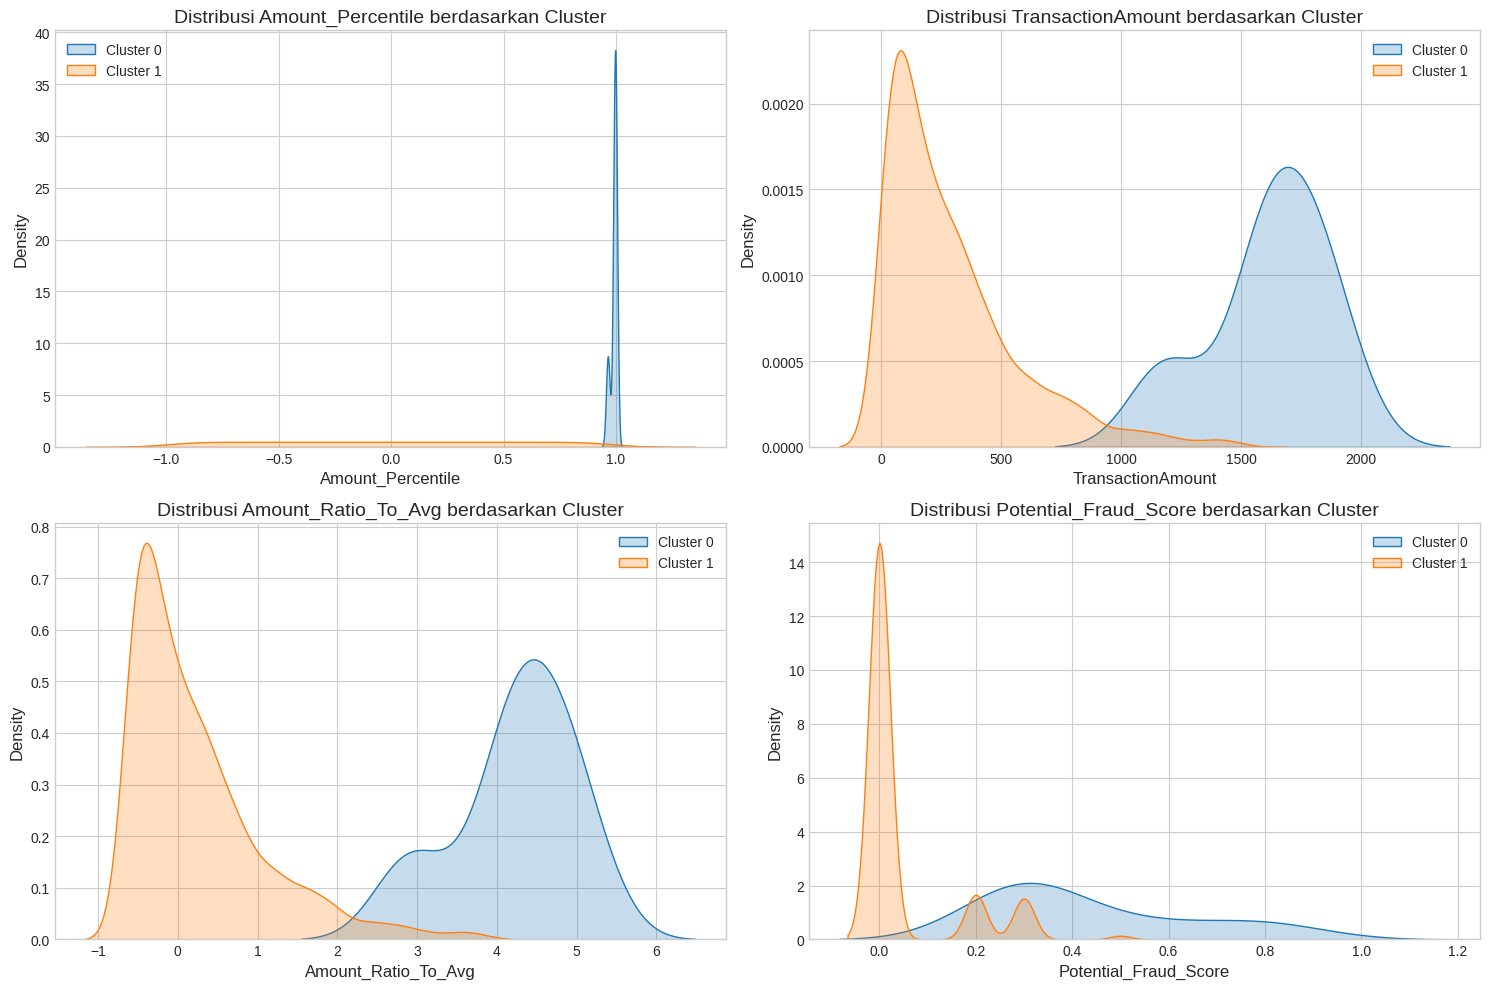

In [512]:
plt.figure(figsize=(15, 10))

plot_features = [f for f in numerical_features if f in df_inverted.columns][:4]

for i, feature in enumerate(plot_features):
    plt.subplot(2, 2, i+1)
    for cluster in sorted(df_inverted['Cluster'].unique()):
        sns.kdeplot(df_inverted[df_inverted['Cluster'] == cluster][feature], 
                   label=f'Cluster {cluster}', shade=True)
    plt.title(f'Distribusi {feature} berdasarkan Cluster')
    plt.legend()

plt.tight_layout()
plt.show()

📊 **Interpretasi Hasil:**  

1️⃣ **Amount_Percentile**:  
   - **Cluster 0** memiliki distribusi yang sangat tajam di dekat **nilai 1.0**, sementara **Cluster 1** lebih menyebar.  
   - Ini menunjukkan bahwa transaksi di **Cluster 0** cenderung berada di persentil tertinggi dibandingkan keseluruhan transaksi.  

2️⃣ **TransactionAmount**:  
   - **Cluster 0** memiliki jumlah transaksi yang lebih besar (puncak di sekitar 1500-2000), sedangkan **Cluster 1** memiliki distribusi yang lebih rendah (<1000).  
   - Ini menunjukkan kemungkinan **perbedaan pola pengeluaran** antara kedua cluster.  

3️⃣ **Amount_Ratio_To_Avg**:  
   - **Cluster 1** cenderung memiliki rasio terhadap rata-rata yang lebih kecil, sementara **Cluster 0** memiliki transaksi dengan rasio jauh lebih besar.  
   - Indikasi bahwa **Cluster 0 lebih sering melakukan transaksi besar dibandingkan rata-rata**.  

4️⃣ **Potential_Fraud_Score**:  
   - **Cluster 1** memiliki puncak tinggi di skor rendah (~0.0), sedangkan **Cluster 0** memiliki distribusi lebih merata.  
   - Ini bisa menunjukkan bahwa transaksi di **Cluster 0 lebih berisiko** dibandingkan **Cluster 1**.  

⚠️ **Catatan:**  
Perbedaan pola ini bisa menjadi indikator penting dalam **mendeteksi transaksi mencurigakan atau fraud**! 🚀

### 📊 **Visualisasi Boxplot - Analisis Fraud Detection**  

📌 **Proses yang dilakukan:**  
- Menggunakan **boxplot** untuk membandingkan distribusi nilai fitur berdasarkan hasil clustering.  
- Memeriksa adanya **outlier** dan perbedaan rentang distribusi antara **Cluster 0** dan **Cluster 1**.  

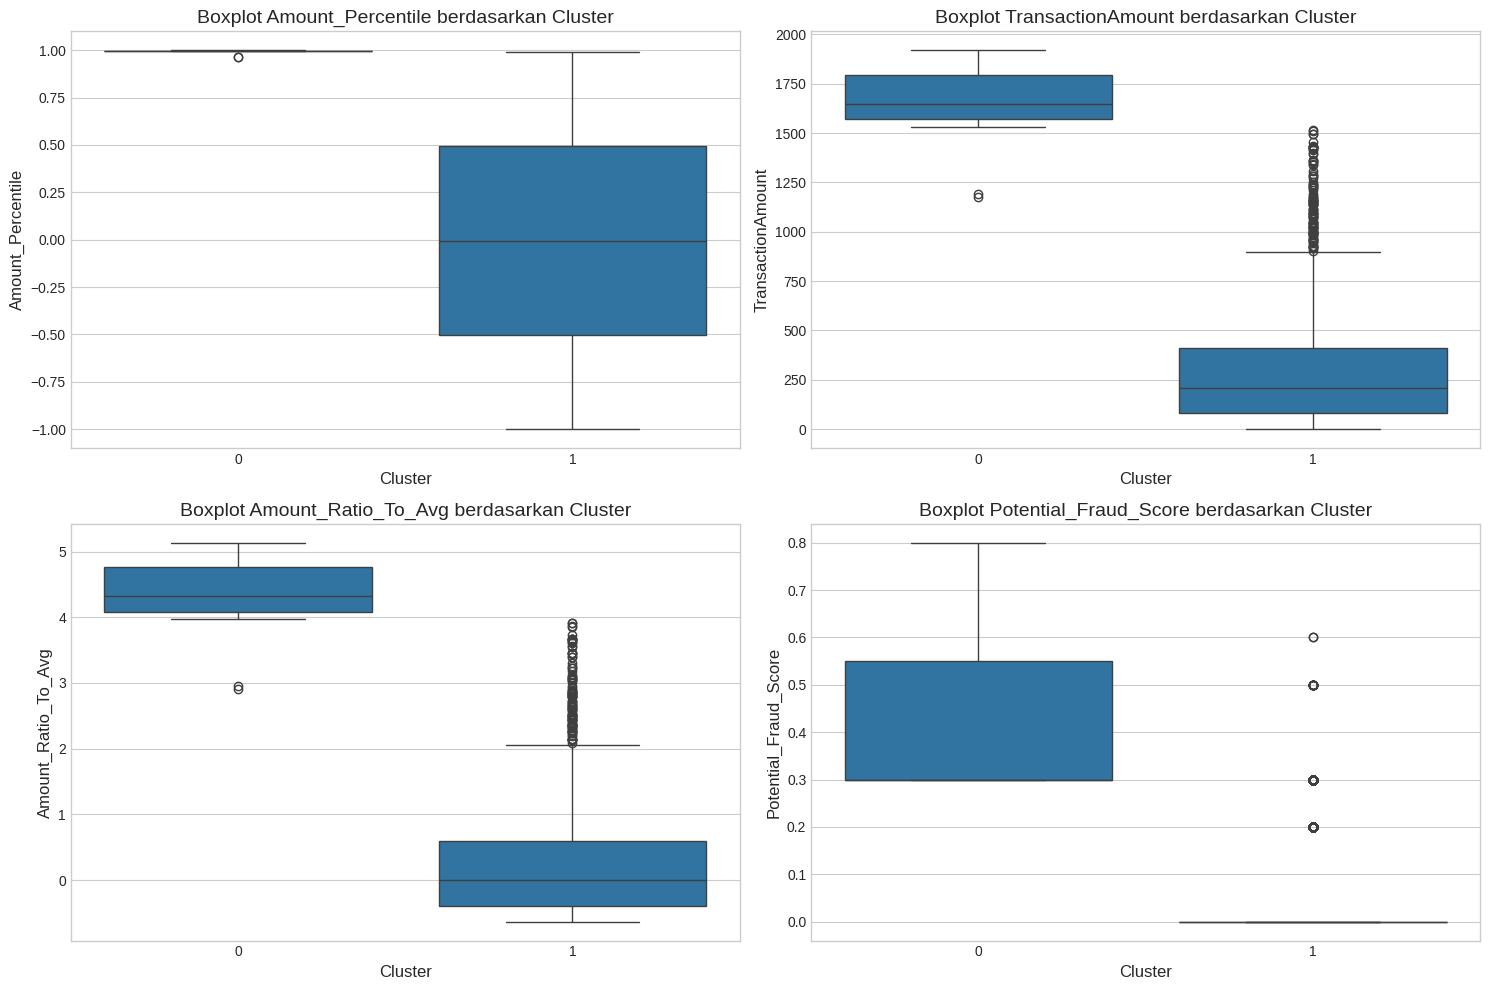

In [519]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(plot_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=df_inverted)
    plt.title(f'Boxplot {feature} berdasarkan Cluster')

plt.tight_layout()
plt.show()

📊 **Interpretasi Hasil Boxplot:**  

1️⃣ **Amount_Percentile**:  
   - **Cluster 0** didominasi oleh transaksi dengan **percentile tertinggi (mendekati 1.0)**.  
   - **Cluster 1** memiliki distribusi lebih luas, termasuk transaksi dengan nilai lebih kecil.  

2️⃣ **TransactionAmount**:  
   - **Cluster 0** memiliki jumlah transaksi yang lebih tinggi dan rentang yang lebih kecil (stabil di sekitar 1500-2000).  
   - **Cluster 1** menunjukkan transaksi lebih bervariasi, tetapi lebih banyak **outlier** dengan jumlah kecil (<1000).  

3️⃣ **Amount_Ratio_To_Avg**:  
   - **Cluster 0** memiliki nilai **ratio jauh lebih tinggi** dari rata-rata transaksi.  
   - **Cluster 1** cenderung memiliki nilai ratio yang lebih kecil dan bervariasi.  

4️⃣ **Potential_Fraud_Score**:  
   - **Cluster 0** memiliki **skor fraud yang lebih tinggi** dan distribusi lebih merata.  
   - **Cluster 1** sebagian besar memiliki skor rendah, tetapi ada beberapa **outlier** yang mungkin mencurigakan.  

⚠️ **Kesimpulan:**  
**Cluster 0** cenderung berisi transaksi besar dengan skor fraud tinggi, sedangkan **Cluster 1** memiliki transaksi lebih kecil tetapi lebih banyak variasi. 🚀

### 🔥 **Analisis Heatmap Korelasi - Deteksi Anomali pada Transaksi**  

📌 **Proses yang dilakukan:**  
- Membuat **heatmap korelasi** untuk melihat hubungan antar fitur dalam **setiap cluster**.  
- Membandingkan pola korelasi antara **Cluster 0** dan **Cluster 1** untuk memahami perbedaan perilaku transaksi.  

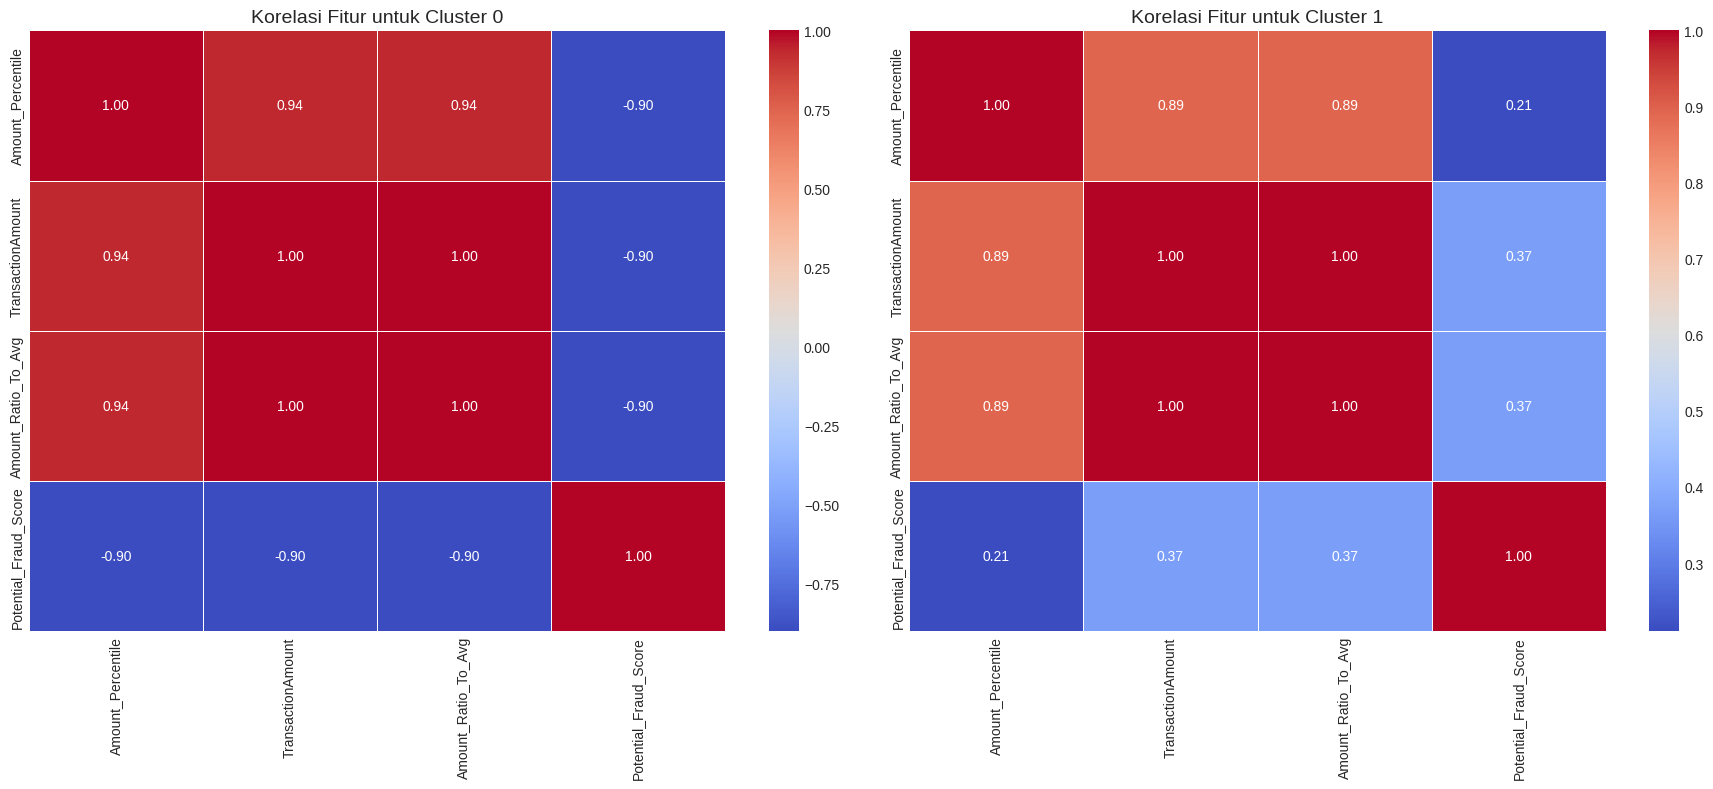

In [521]:
if len(plot_features) > 1:  
    plt.figure(figsize=(18, 8))
    
    clusters = sorted(df_inverted['Cluster'].unique())
    
    for idx, cluster_id in enumerate(clusters[:2]):
        plt.subplot(1, len(clusters[:2]), idx+1)
        df_cluster = df_inverted[df_inverted['Cluster'] == cluster_id]
        corr_cluster = df_cluster[plot_features].corr()
        sns.heatmap(corr_cluster, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title(f'Korelasi Fitur untuk Cluster {cluster_id}')
    
    plt.tight_layout()
    plt.show()

📊 **Interpretasi Hasil Korelasi:**  

1️⃣ **Cluster 0**:  
   - **Amount_Percentile, TransactionAmount, dan Amount_Ratio_To_Avg** memiliki korelasi sangat tinggi (~0.94–1.00), menunjukkan bahwa transaksi besar cenderung memiliki rasio tinggi terhadap rata-rata dan berada di percentile atas.  
   - **Potential_Fraud_Score berkorelasi negatif kuat (~-0.90) dengan fitur lainnya**, artinya transaksi yang lebih besar justru memiliki skor fraud lebih rendah dalam cluster ini.  

2️⃣ **Cluster 1**:  
   - **Amount_Percentile, TransactionAmount, dan Amount_Ratio_To_Avg** masih berkorelasi tinggi (~0.89–1.00), namun sedikit lebih lemah dibanding Cluster 0.  
   - **Potential_Fraud_Score memiliki korelasi lebih lemah dengan fitur lain (0.21–0.37)**, yang bisa mengindikasikan **lebih banyak variasi dalam pola transaksi yang mencurigakan**.  

### 🔎 **Analisis Rasio Nilai Fitur - Interpretasi Target**  

📌 **Proses yang dilakukan:**  
- **Menghitung rasio nilai rata-rata fitur antara Cluster 1 dan Cluster 0** untuk melihat **seberapa besar perbedaan karakteristik transaksi** di kedua cluster.  
- Rasio dihitung dengan **(Mean Cluster 1) / (Mean Cluster 0)**, jika rasio jauh dari 1, berarti terdapat **perbedaan signifikan** antara kedua cluster.  

In [520]:
# This is to see how different the values are between the two clusters
if len(numerical_features) > 0 and len(df_inverted['Cluster'].unique()) >= 2:
    cluster_ids = sorted(df_inverted['Cluster'].unique())
    if len(cluster_ids) >= 2:
        try:
            cluster_means = df_inverted.groupby('Cluster')[numerical_features].mean()
            if 0 in cluster_ids and 1 in cluster_ids and not cluster_means.loc[0].isna().all():
                ratio = (cluster_means.loc[1] / cluster_means.loc[0]).round(2)
                print("\nRasio nilai rata-rata fitur (Cluster 1 / Cluster 0):")
                print(ratio)
        except Exception as e:
            print(f"Tidak dapat menghitung rasio karena: {e}")


Rasio nilai rata-rata fitur (Cluster 1 / Cluster 0):
Amount_Percentile       -0.00
TransactionAmount        0.18
Amount_Ratio_To_Avg      0.06
Potential_Fraud_Score    0.11
LoginAttempts            0.56
dtype: float64


📊 **Hasil & Interpretasi:**  

| **Fitur**                      | **Rasio (Cluster 1 / Cluster 0)** | **Interpretasi** |
|---------------------------------|---------------------------------|-----------------|
| **Amount_Percentile**           | **-0.00**  | **Tidak ada perbedaan signifikan dalam distribusi transaksi** antara kedua cluster. |
| **TransactionAmount**           | **0.18**   | **Cluster 1 memiliki nilai transaksi jauh lebih kecil**, yang bisa menunjukkan pola transaksi yang lebih konservatif atau akun dengan aktivitas lebih rendah. |
| **Amount_Ratio_To_Avg**         | **0.06**   | **Rasio jumlah transaksi terhadap rata-rata lebih kecil di Cluster 1**, menunjukkan bahwa transaksi di cluster ini cenderung lebih stabil atau memiliki variasi yang lebih kecil. |
| **Potential_Fraud_Score**       | **0.11**   | **Skor potensi fraud di Cluster 1 lebih rendah**, yang bisa mengindikasikan bahwa cluster ini berisi transaksi yang dianggap lebih aman. |
| **LoginAttempts**               | **0.56**   | **Pengguna di Cluster 1 memiliki lebih sedikit upaya login**, yang bisa menunjukkan akun-akun yang lebih pasif atau jarang digunakan. |

⚠️ **Kesimpulan:**  
- **Cluster 1 memiliki transaksi yang lebih kecil dan aktivitas login lebih rendah**, yang bisa mengindikasikan akun pasif atau dengan pola transaksi lebih stabil.  
- **Cluster 0 lebih aktif dengan jumlah transaksi lebih besar dan skor fraud lebih tinggi**, mungkin karena aktivitas yang lebih berisiko atau lebih beragam.  
- **Cluster 1 berpotensi lebih aman**, tetapi perlu dicek lebih lanjut apakah ini karena aktivitas lebih sedikit atau ada pola anomali lainnya. 🚨

# 📊 **Analisis Karakteristik Cluster: Deteksi Transaksi Fraud**

Berdasarkan hasil cluster yang telah diperoleh, berikut adalah karakteristik dari masing-masing cluster:

## 🔴 Cluster 0: Transaksi Mencurigakan (Fraud)

Cluster 0 didapatkan karena:
- **TransactionAmount** memiliki nilai rata-rata **$1.615,84** dengan batas minimum **$1.176,28** dan batas maksimum **$1.919,11** 💰
- **Amount_Percentile** memiliki nilai rata-rata **0,99** dengan batas minimum **0,96** dan batas maksimum **1,00** 📈
- **Amount_Ratio_To_Avg** memiliki nilai rata-rata **4,22** dengan batas minimum **2,90** dan batas maksimum **5,13** 📊
- **Potential_Fraud_Score** memiliki nilai rata-rata **0,44** dengan batas minimum **0,30** dan batas maksimum **0,80** ⚠️
- **LoginAttempts** memiliki nilai rata-rata **2,00** dengan batas minimum **1,00** dan batas maksimum **5,00** 🔑
- **Is_Late_Night** memiliki nilai modus kategori **False** (100%) 🌙
- **Is_Weekend** memiliki nilai modus kategori **False** (100%) 📅

## 🟢 Cluster 1: Transaksi Normal

Cluster 1 didapatkan karena:
- **TransactionAmount** memiliki nilai rata-rata **$291,80** dengan batas minimum **$0,26** dan batas maksimum **$1.512,99** 💸
- **Amount_Percentile** memiliki nilai rata-rata **-0,00** dengan batas minimum **-1,00** dan batas maksimum **0,99** 📉
- **Amount_Ratio_To_Avg** memiliki nilai rata-rata **0,24** dengan batas minimum **-0,63** dan batas maksimum **3,91** 📋
- **Potential_Fraud_Score** memiliki nilai rata-rata **0,05** dengan batas minimum **0,00** dan batas maksimum **0,60** ✅
- **LoginAttempts** memiliki nilai rata-rata **1,12** dengan batas minimum **1,00** dan batas maksimum **5,00** 🔐
- **Is_Late_Night** memiliki nilai modus kategori **False** (100%) 🌃
- **Is_Weekend** memiliki nilai modus kategori **False** (100%) 🗓️

## 📝 Analisis:

1. **Proporsi Cluster** 📊
   - Cluster 0 (fraud) hanya **0,44%** (11 transaksi) dari total data
   - Cluster 1 (normal) mendominasi dengan **99,56%** (2501 transaksi)

2. **Perbedaan Utama** ⚖️
   - Transaksi fraud memiliki **nilai transaksi 5,5x lebih besar** dibandingkan transaksi normal
   - Transaksi fraud memiliki **skor potensi fraud 8,8x lebih tinggi**
   - Transaksi fraud memiliki **rasio terhadap rata-rata 17,6x lebih tinggi**
   - Transaksi fraud memiliki **upaya login hampir 2x lebih banyak**

Model clustering berhasil mengidentifikasi kelompok kecil transaksi dengan karakteristik yang sangat berbeda dari mayoritas, menjadikannya kandidat kuat untuk transaksi fraudulent yang memerlukan investigasi lebih lanjut. 🕵️‍♂️🔍

# **📤 Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [523]:
df_inverted.drop(columns=['sample_weight']).to_csv('data/processed/after-clustering.csv', index=False)